In [1]:
#importing pandas library
import pandas as  pd 

#importing numpy library
import numpy as np           
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data from csv file
corona_go=pd.read_csv("owid-covid-data.csv")   

#upper five rows of data because argument of head is 5
corona_go.head(5)                                 

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
0  ...          1.337        1803.987              NaN         597.029   
1  ...          1.337        1803.987              NaN         597.029   
2  ...          1.337        1803.987              NaN         597.029   
3  ...          1.337        1803.987              NaN         597.029   
4  ...          1.337        1803.987              NaN         597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

  hospital_beds_per_thousand  life_expectancy  
0                        0.5            64.83  
1                        0.5            64.83  
2                        0.5            64.83  
3                        0.5            64.83  
4                        0.5            64.83  

[5 rows x 34 columns]

In [3]:
 #it shows total count of null values in a column
corona_go.isna().sum()                           

iso_code                              64
continent                            256
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        20213
new_tests                          20621
total_tests_per_thousand           20213
new_tests_per_thousand             20621
new_tests_smoothed                 19450
new_tests_smoothed_per_thousand    19450
tests_units                        18755
stringency_index                    5700
population                            64
population_density                  1286
median_age                          2863
aged_65_older                       3238
aged_70_older   

In [4]:
#replacing the null values with the mean of that column is better than droping that row 
corona_go=corona_go.fillna(corona_go.mean())   

#replacing the na with mode of that column
corona_go=corona_go.fillna(corona_go.mode().iloc[0])             

In [5]:
#importing datetime library
import datetime as dt     

#changing date to date time
corona_go["date"]=pd.to_datetime(corona_go["date"])

#changing date time to an ordinal value
corona_go["date"]=corona_go["date"].map(dt.datetime.toordinal)
corona_go.head(5)

iso_code continent     location    date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  737424          0.0        0.0   
1      AFG      Asia  Afghanistan  737425          0.0        0.0   
2      AFG      Asia  Afghanistan  737426          0.0        0.0   
3      AFG      Asia  Afghanistan  737427          0.0        0.0   
4      AFG      Asia  Afghanistan  737428          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
0  ...          1.337        1803.987        11.177098         597.029   
1  ...          1.337        1803.987        11.177098         597.029   
2  ...          1.337        1803.987        11.177098         597.029   
3  ...          1.337        1803.987        11.177098         597.029   
4  ...          1.337        1803.987        11.177098         597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59       11.064407     32.642258                  37.746   
1                 9.59       11.064407     32.642258                  37.746   
2                 9.59       11.064407     32.642258                  37.746   
3                 9.59       11.064407     32.642258                  37.746   
4                 9.59       11.064407     32.642258                  37.746   

  hospital_beds_per_thousand  life_expectancy  
0                        0.5            64.83  
1                        0.5            64.83  
2                        0.5            64.83  
3                        0.5            64.83  
4                        0.5            64.83  

[5 rows x 34 columns]

In [6]:
#if column contains int or float value then drop that
for column in corona_go:
    if corona_go[column].dtype != np.int64 and corona_go[column].dtype != np.float64:    
        corona_go=corona_go.drop([column],axis=1)                   

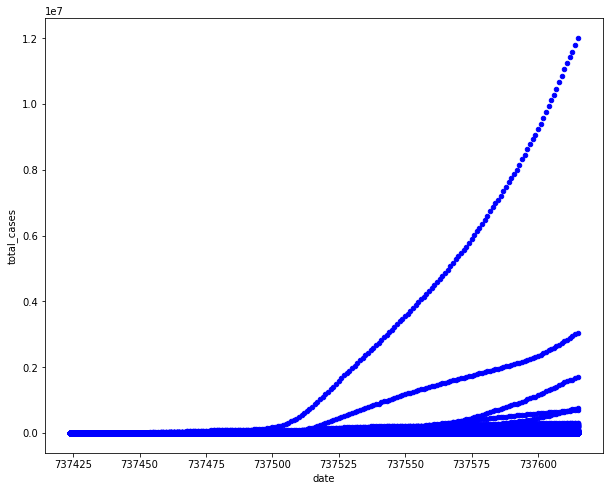

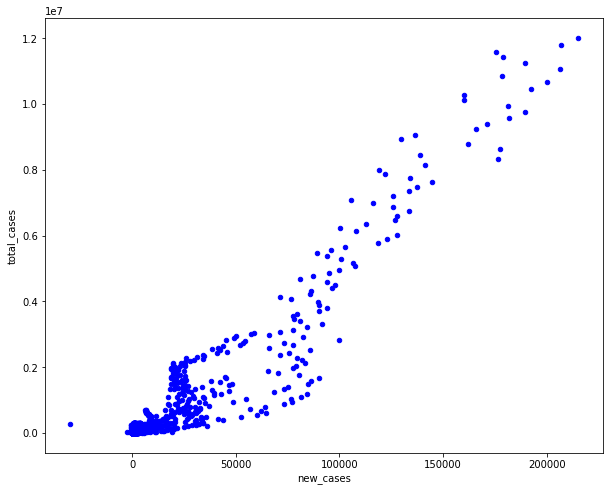

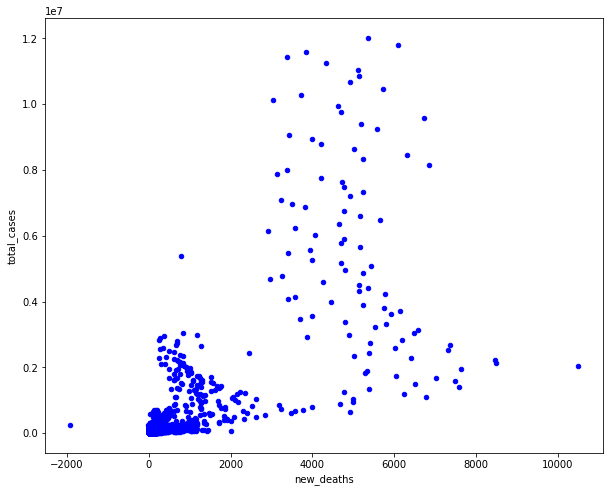

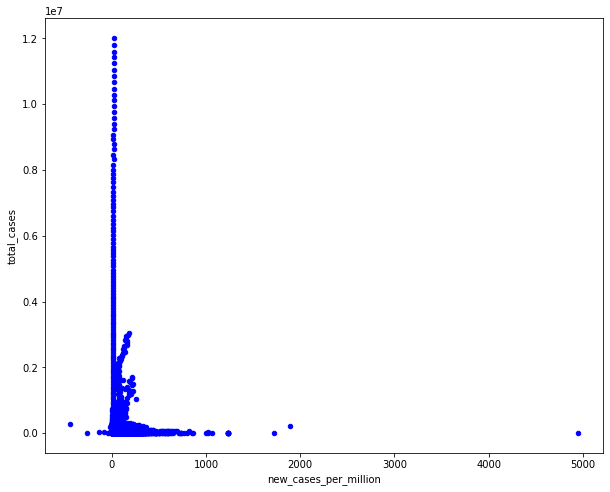

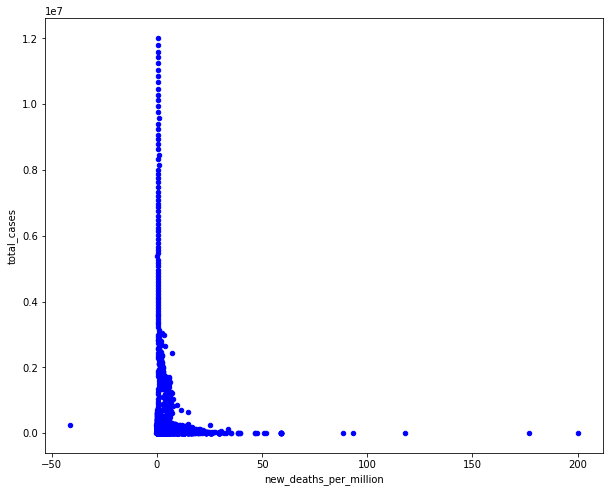

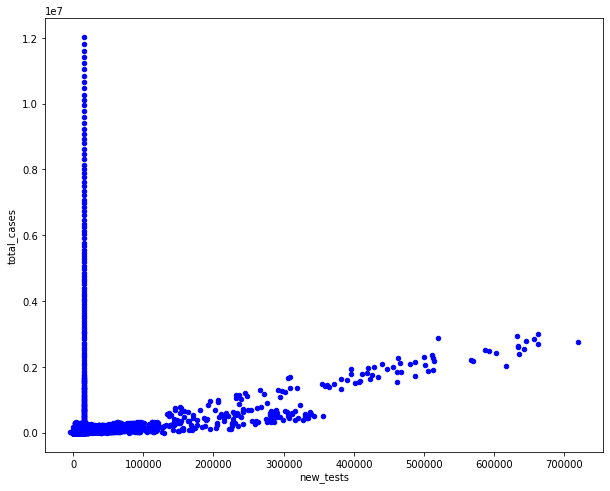

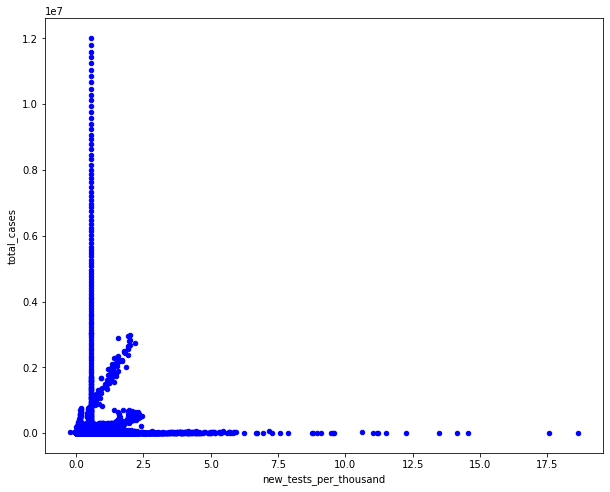

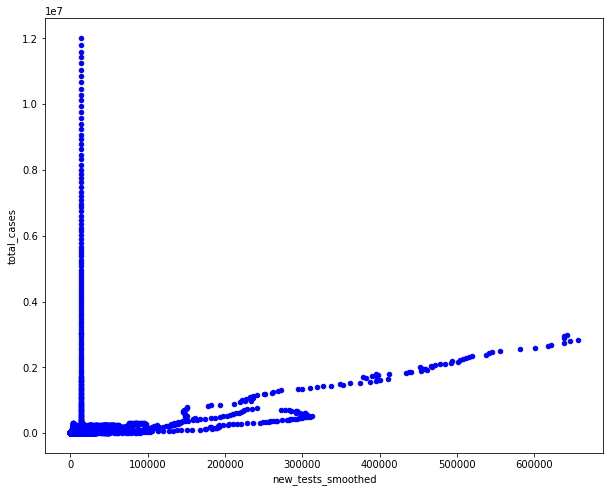

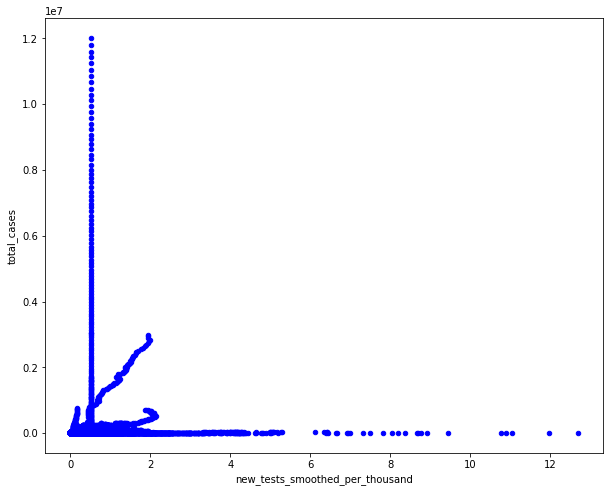

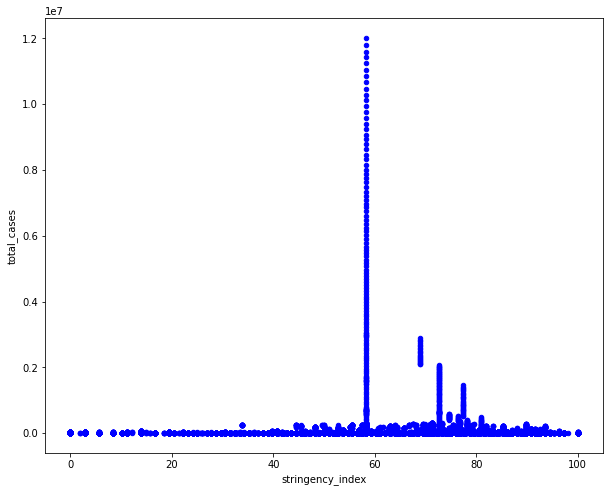

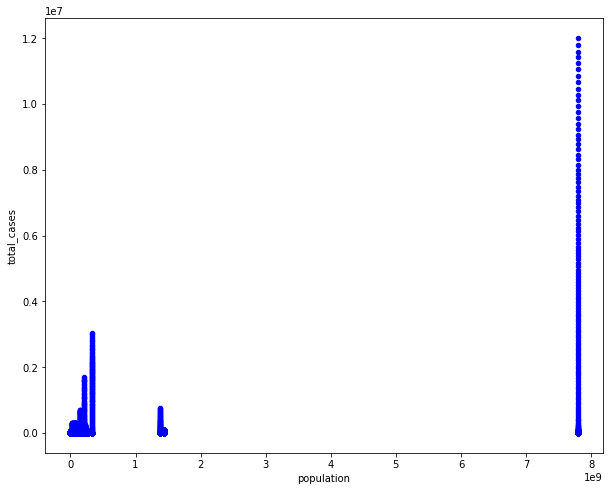

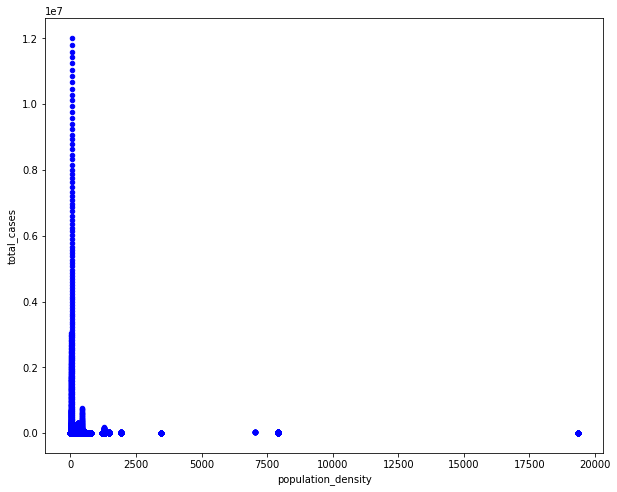

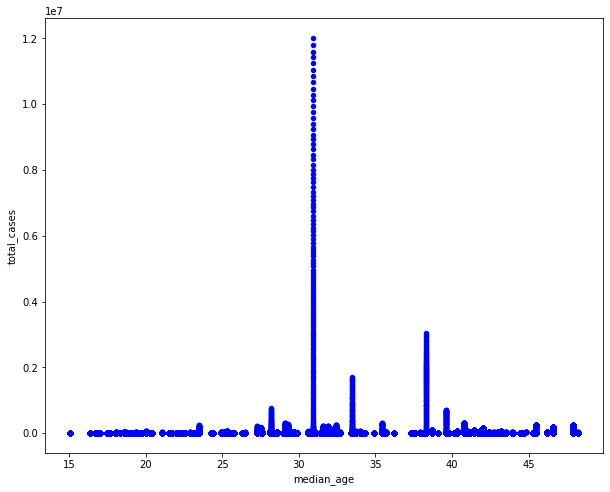

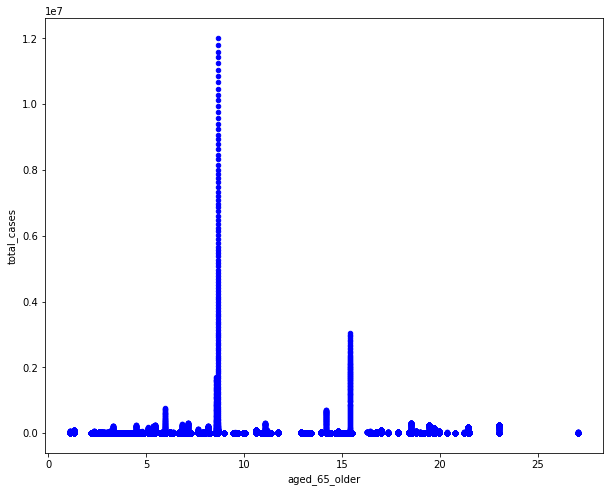

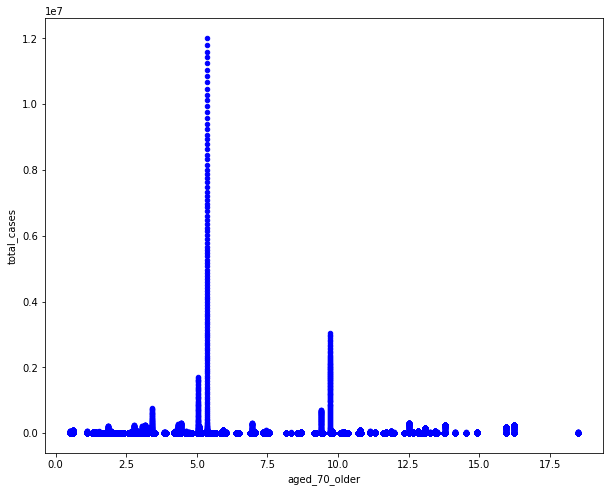

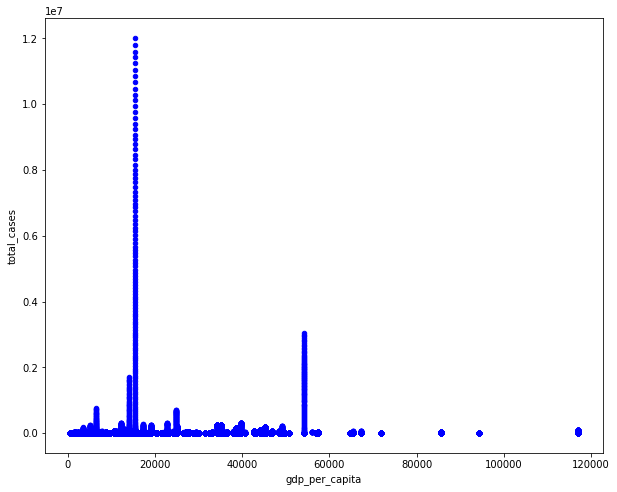

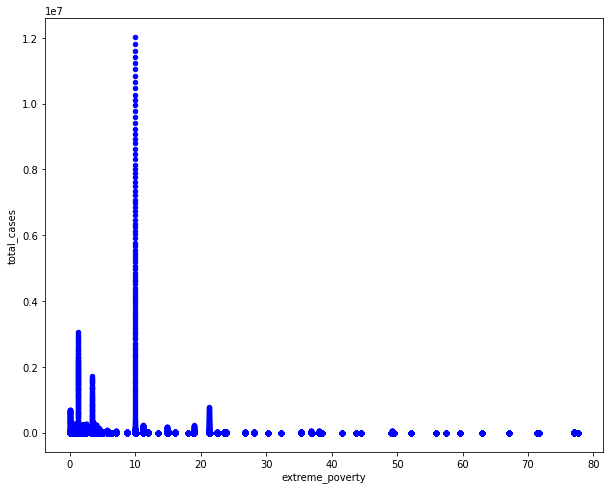

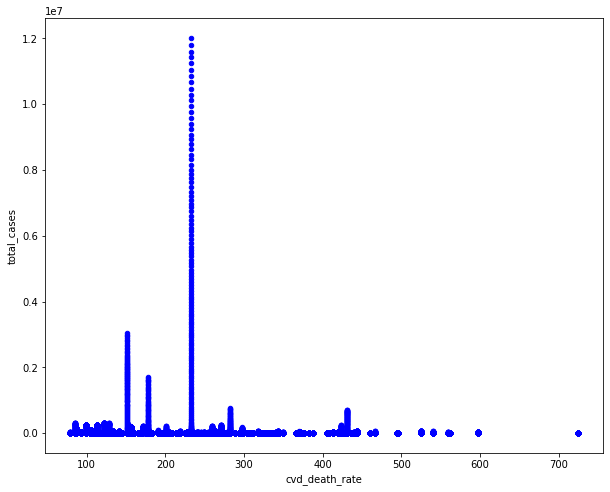

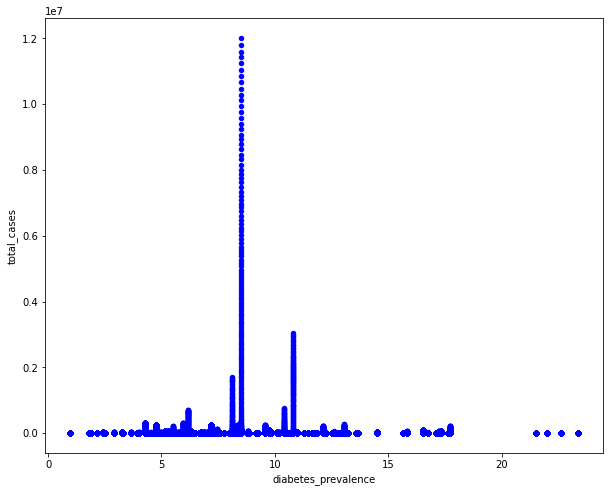

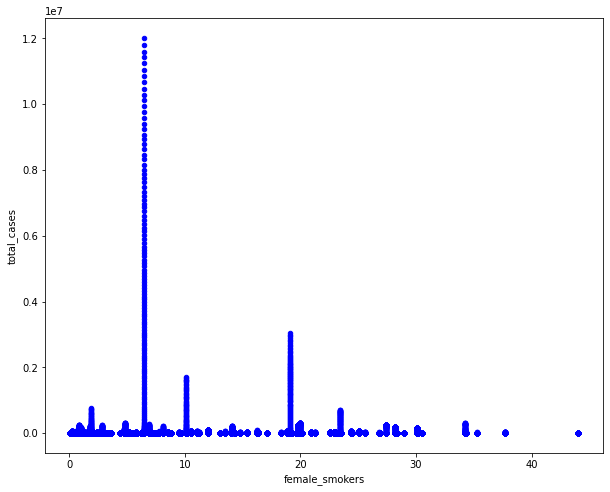

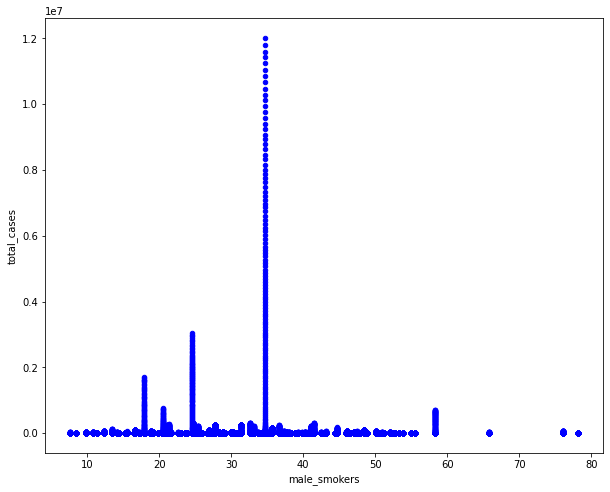

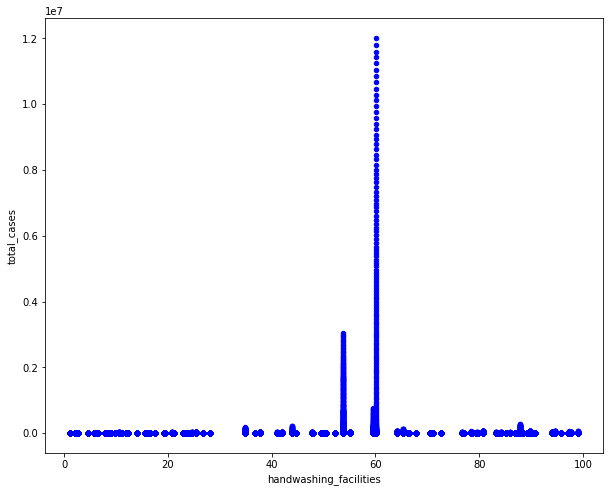

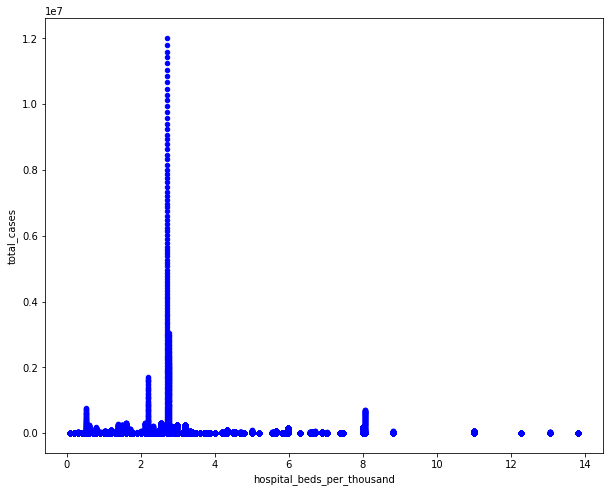

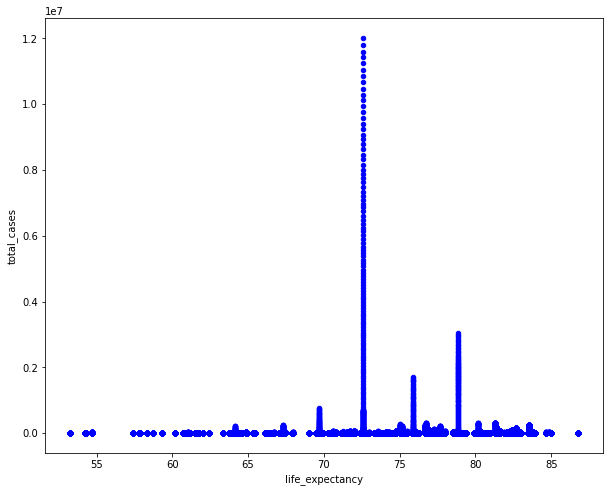

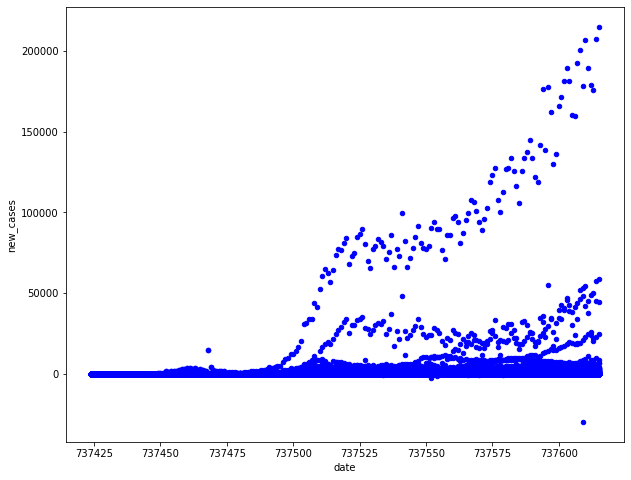

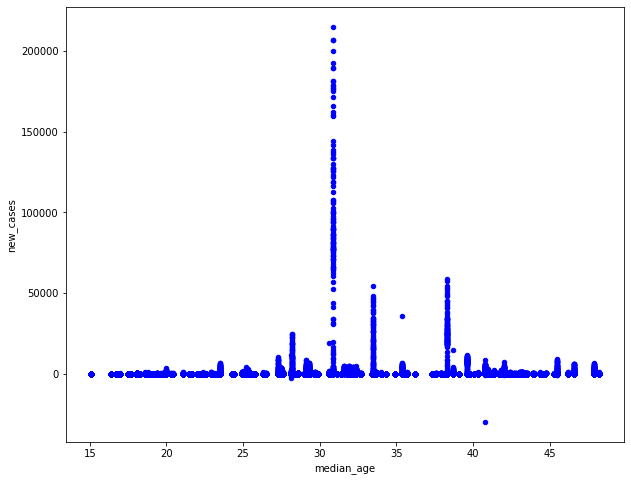

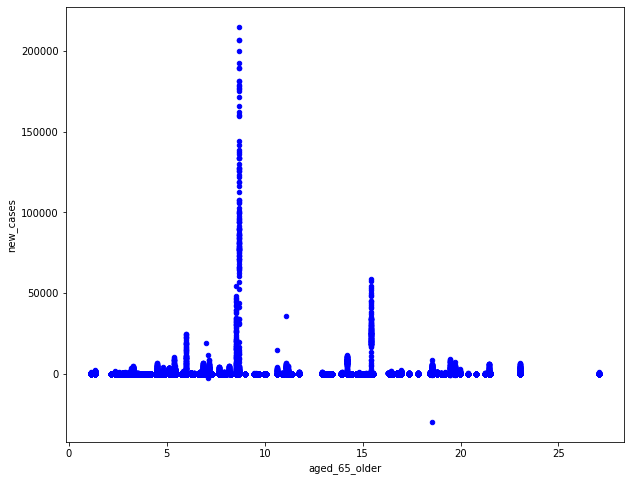

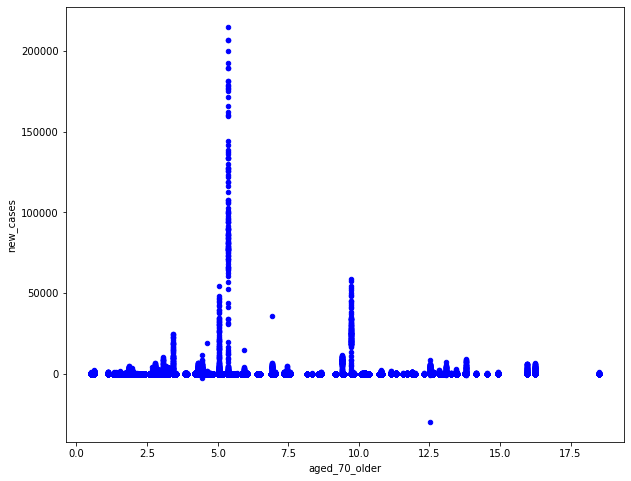

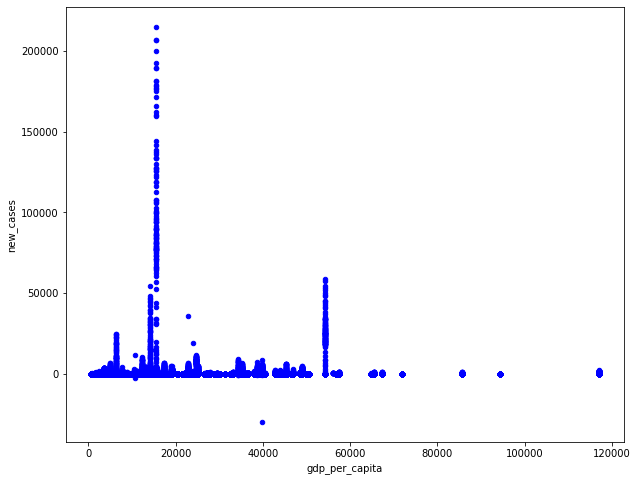

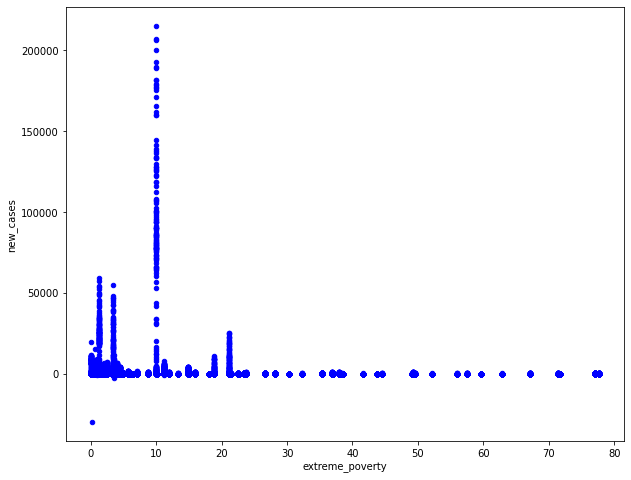

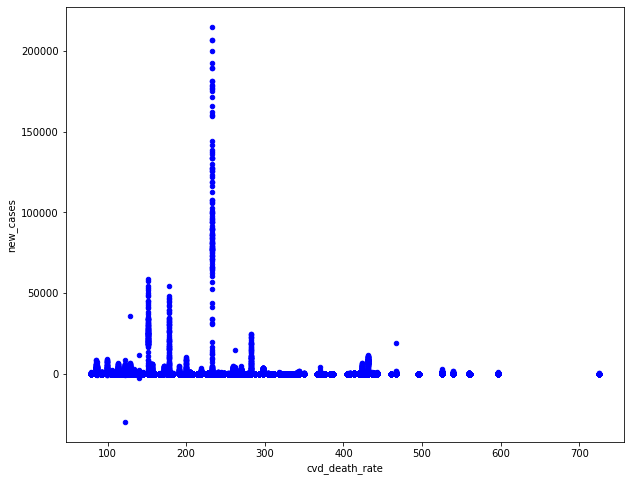

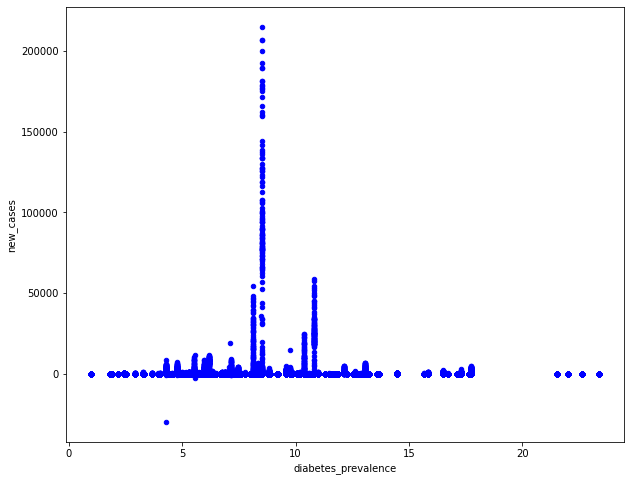

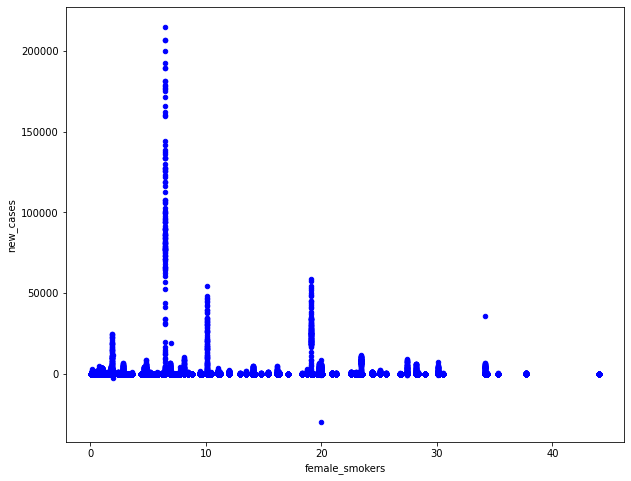

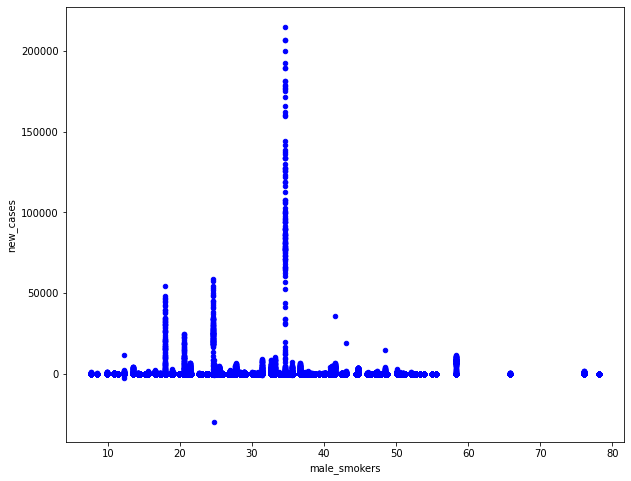

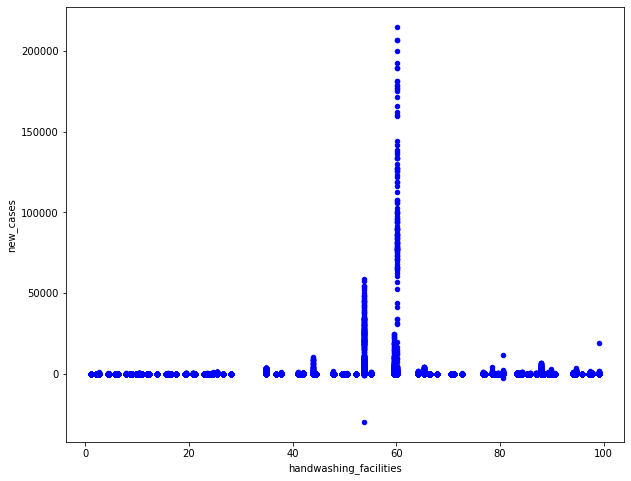

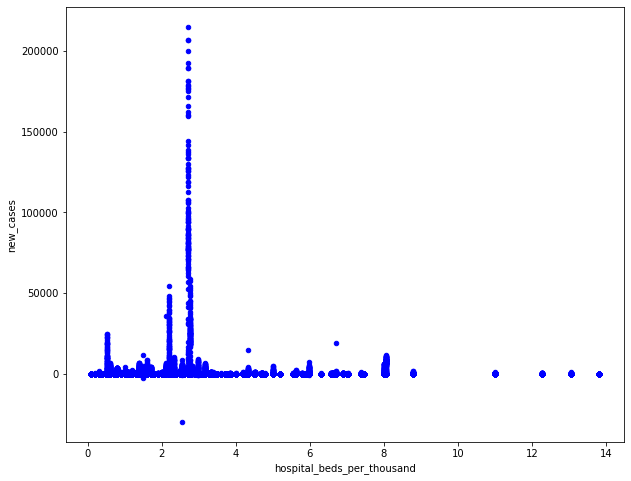

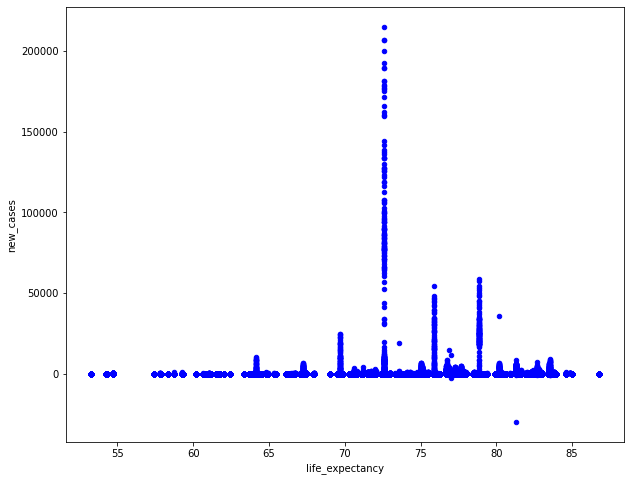

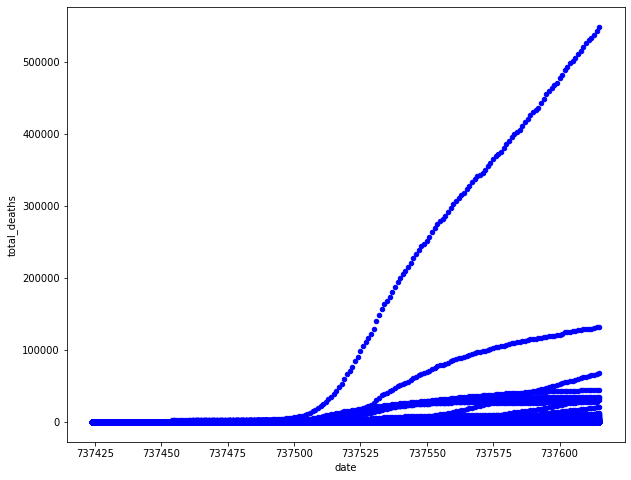

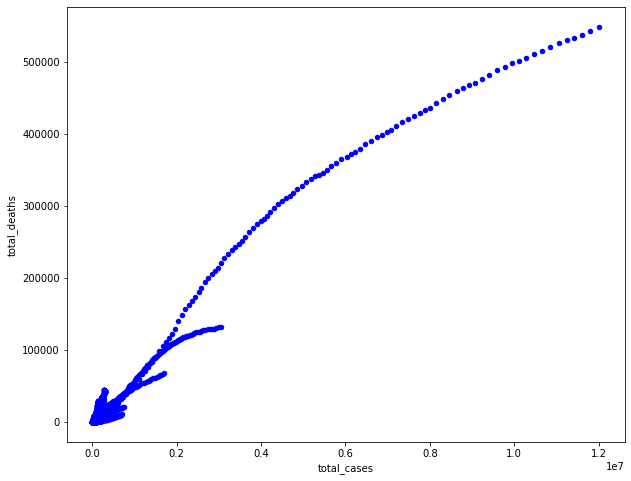

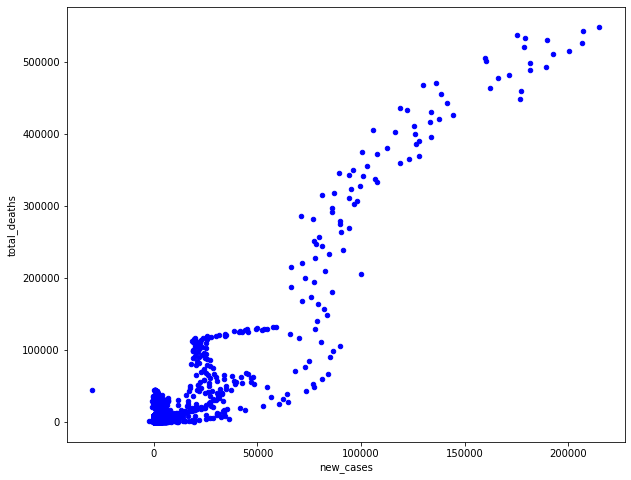

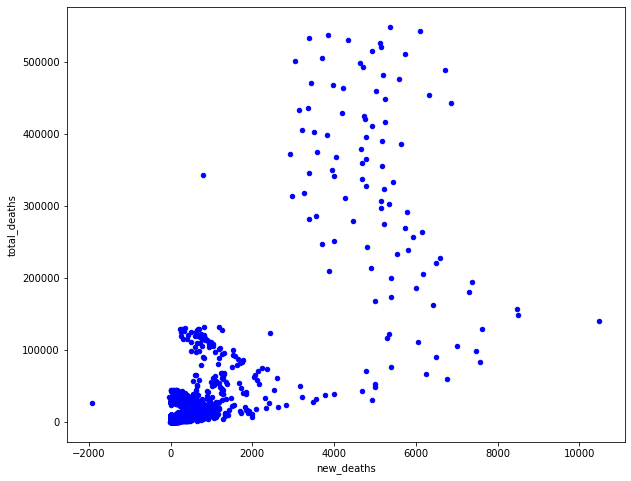

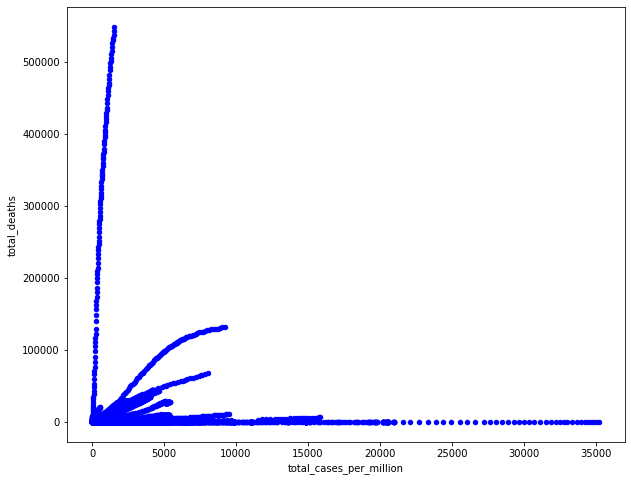

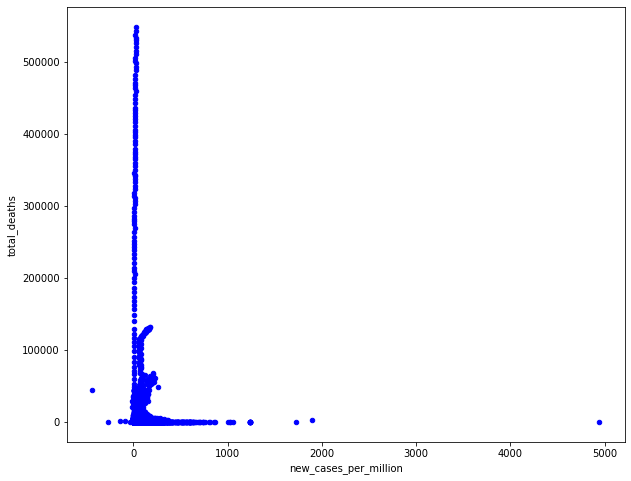

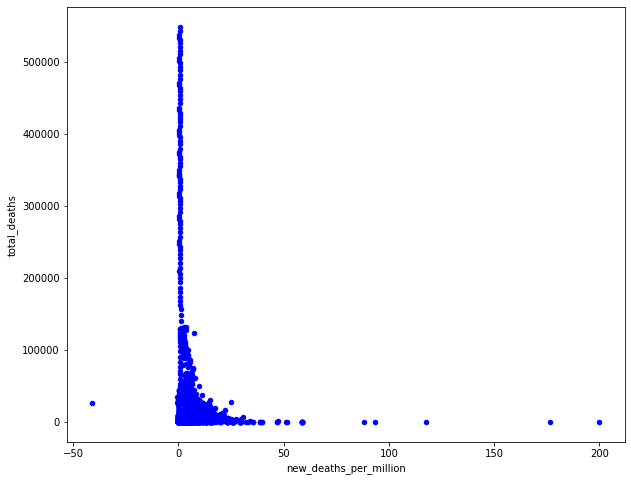

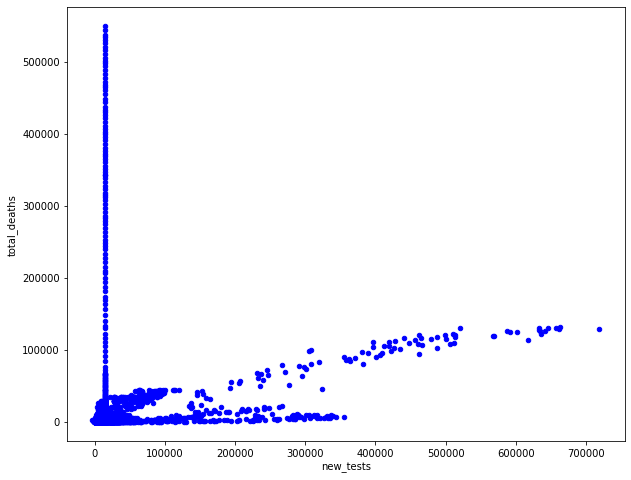

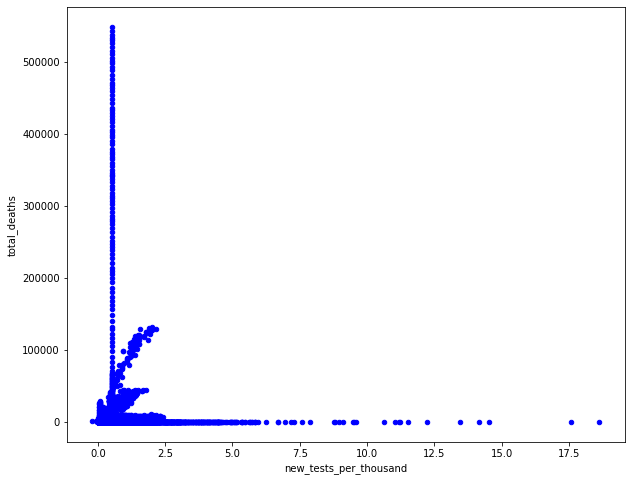

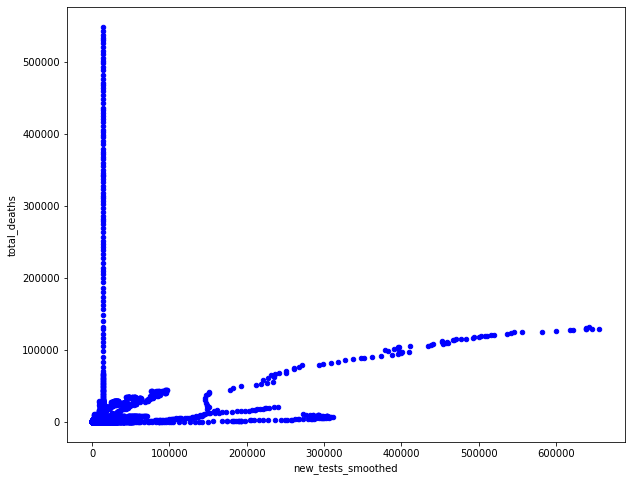

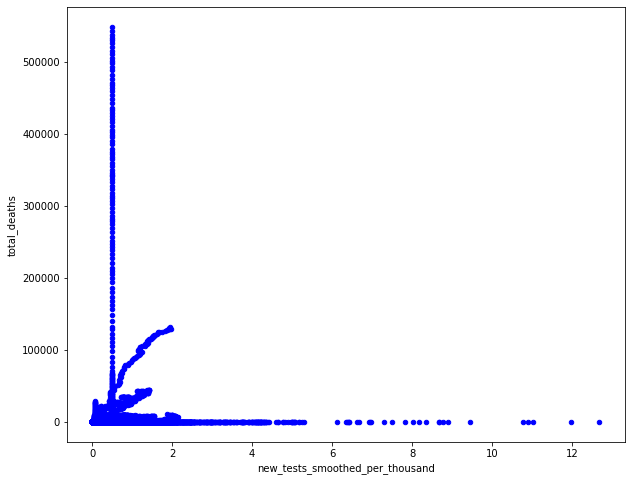

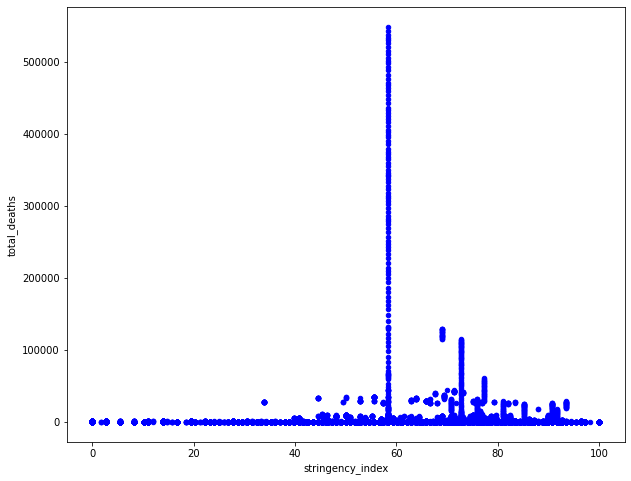

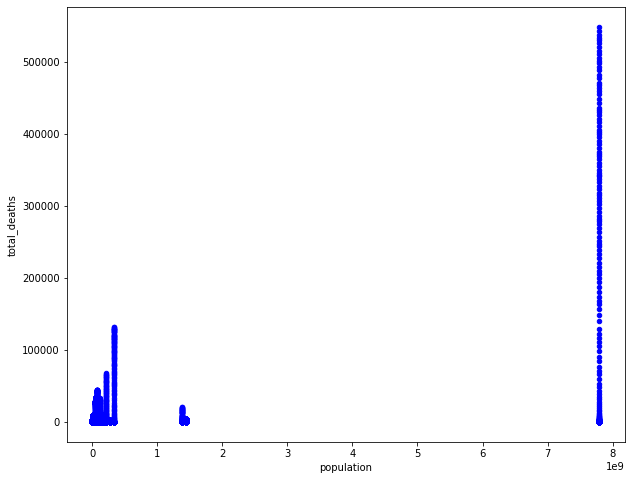

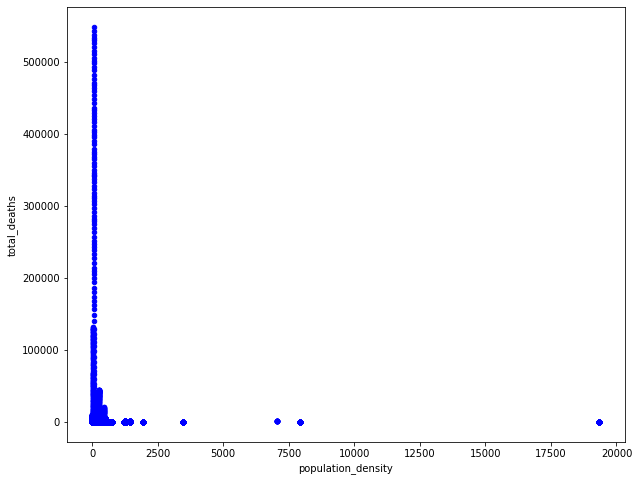

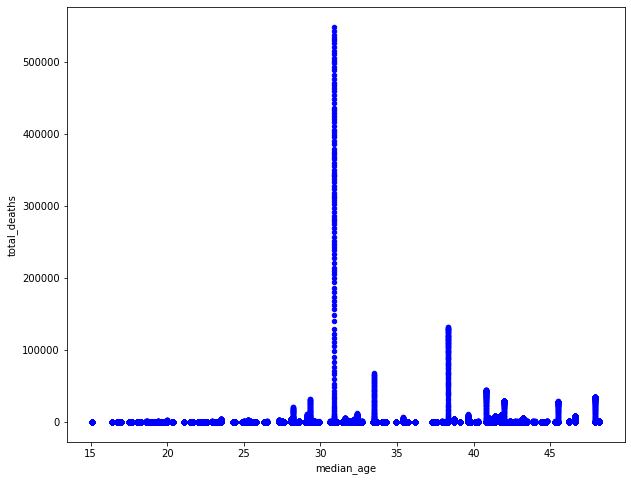

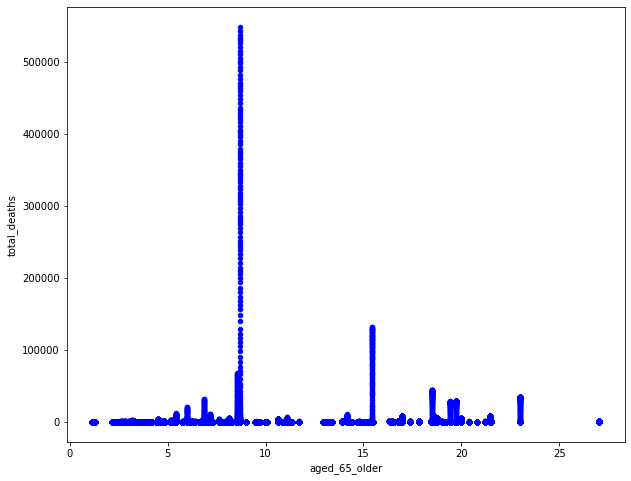

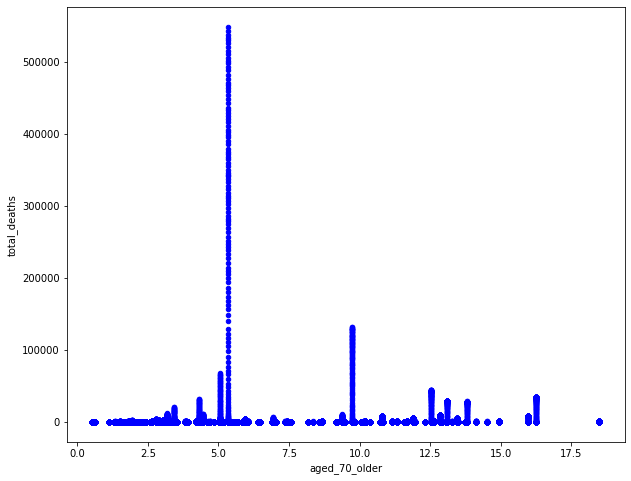

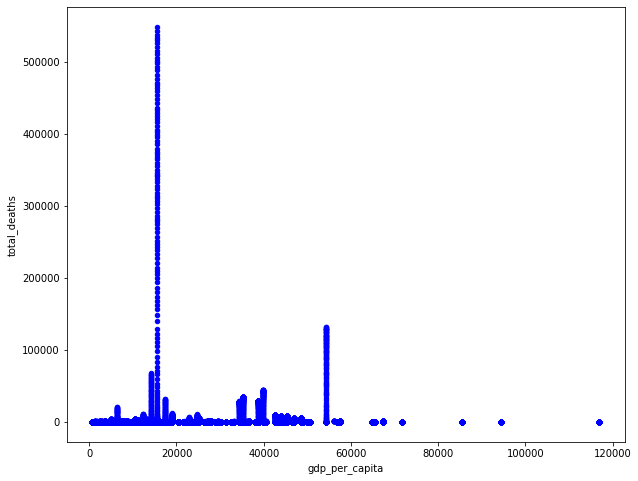

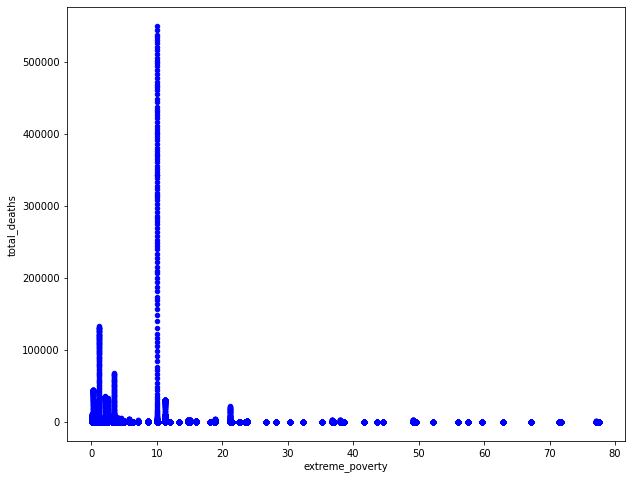

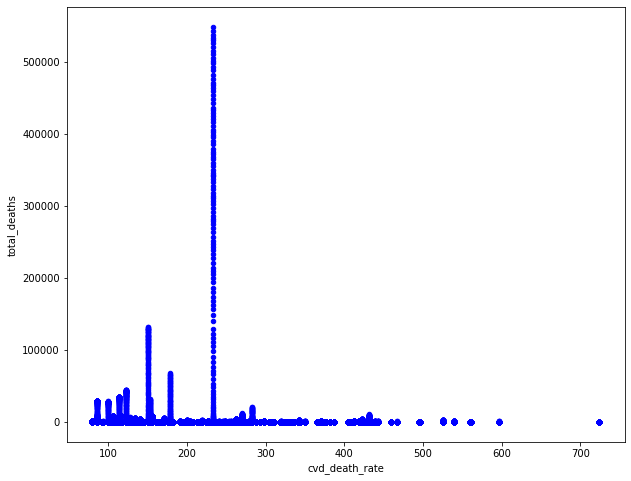

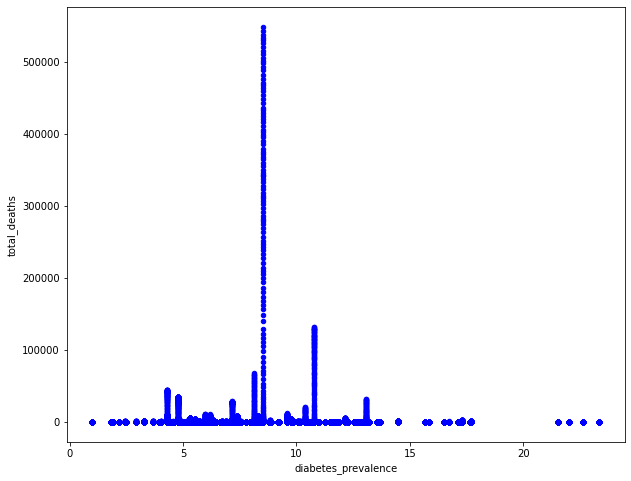

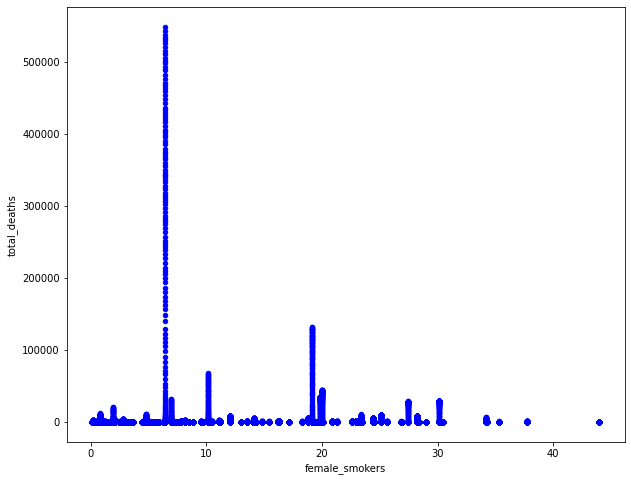

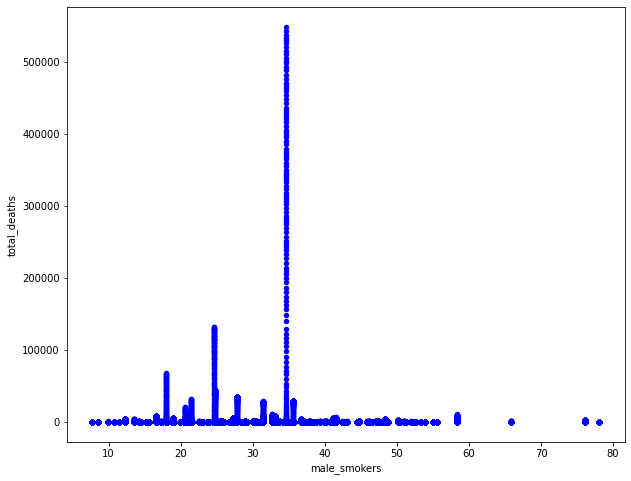

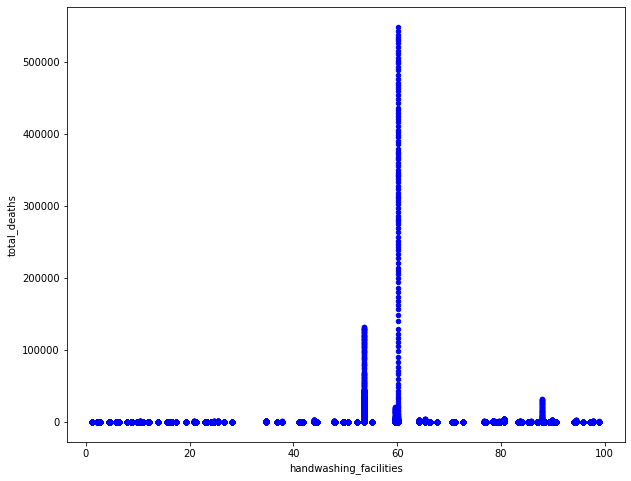

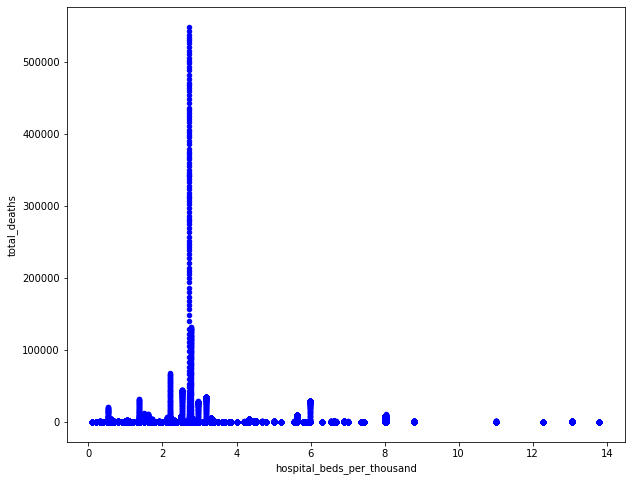

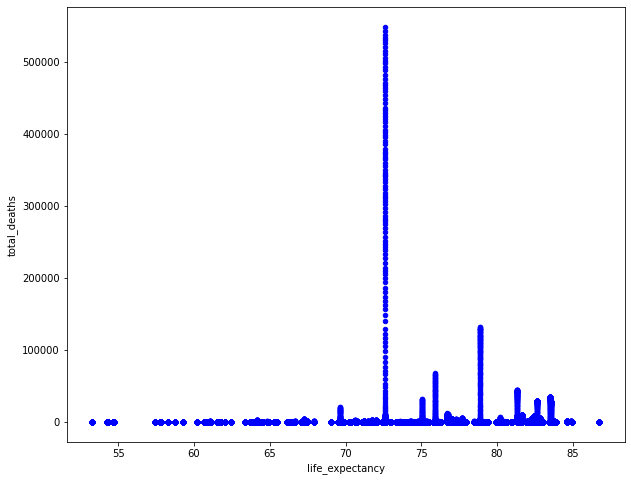

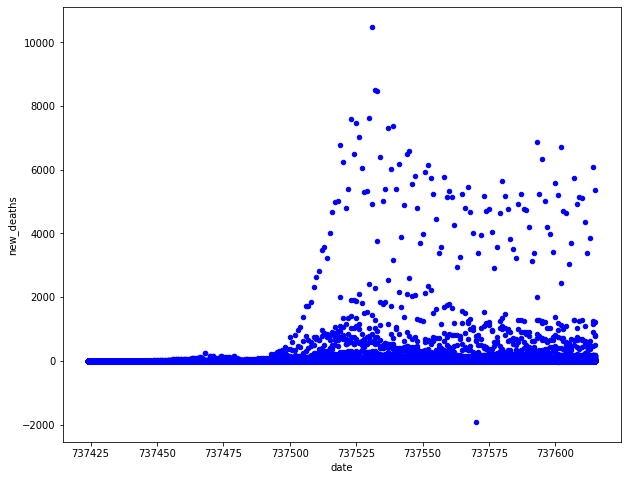

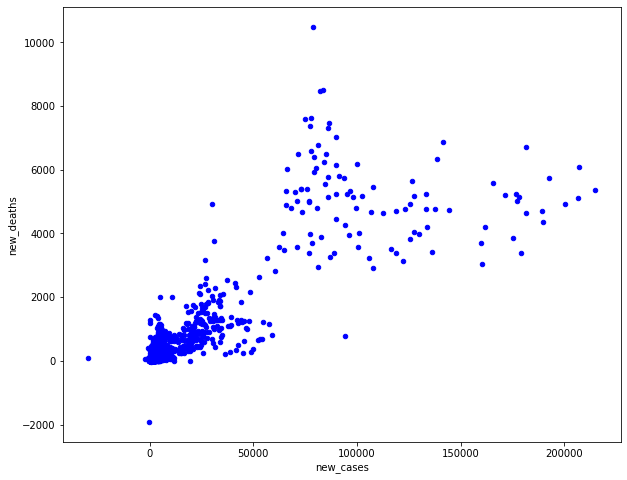

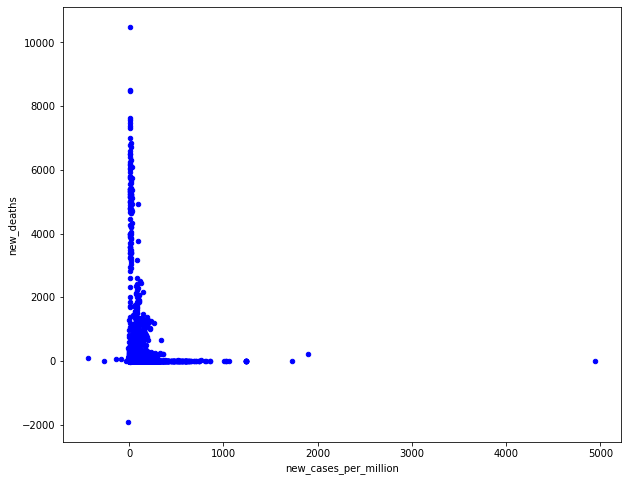

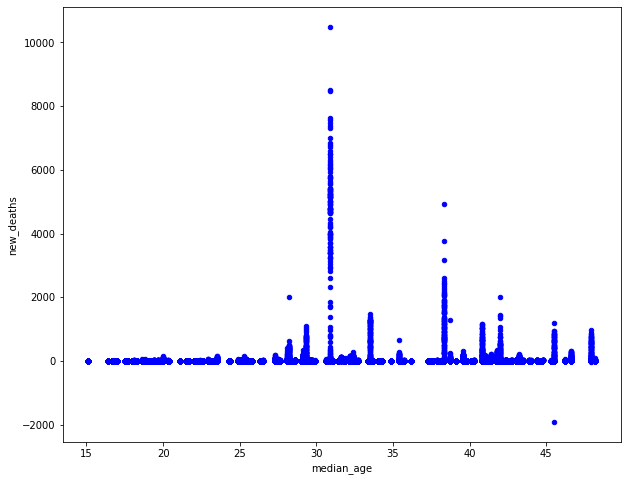

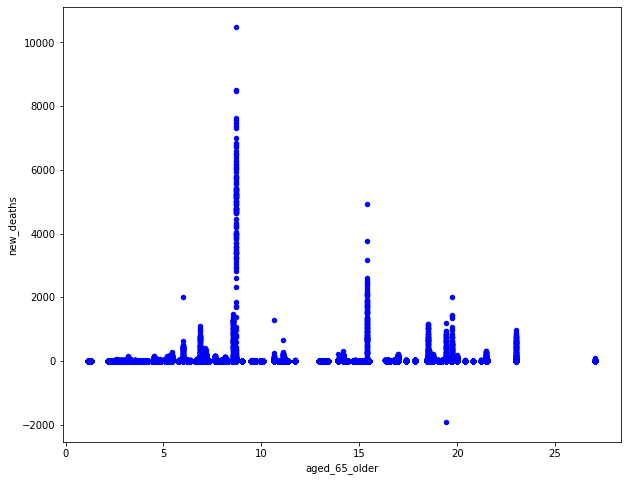

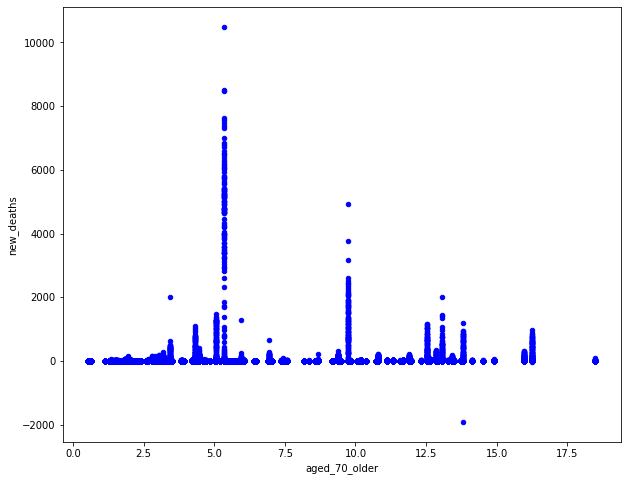

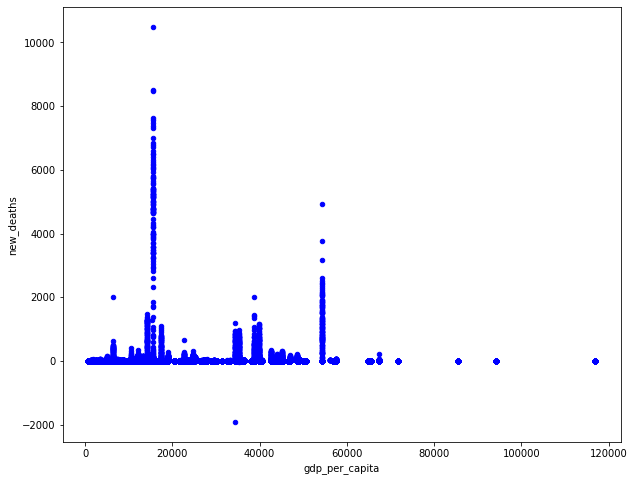

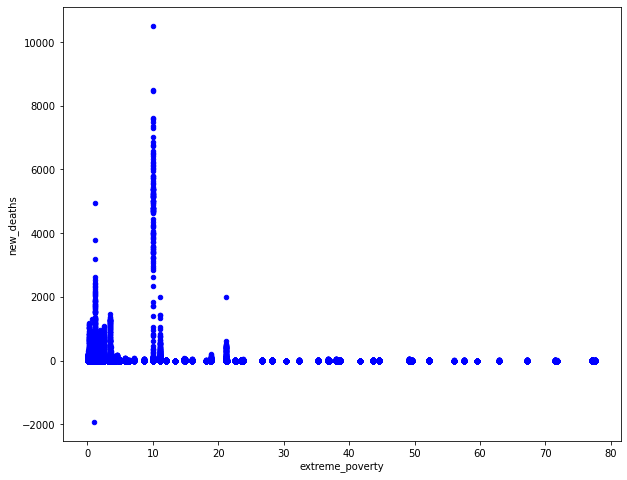

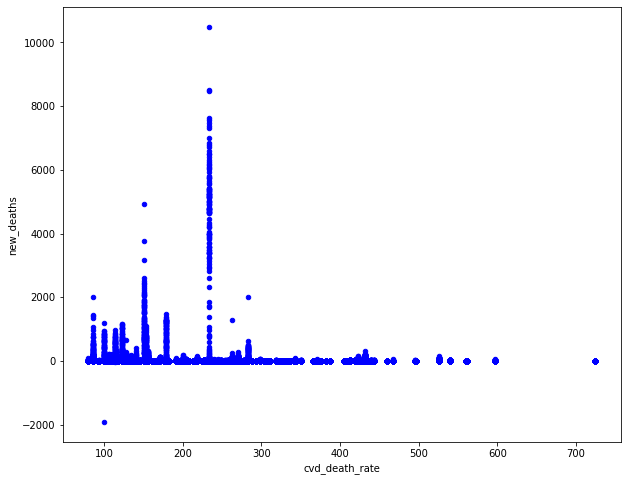

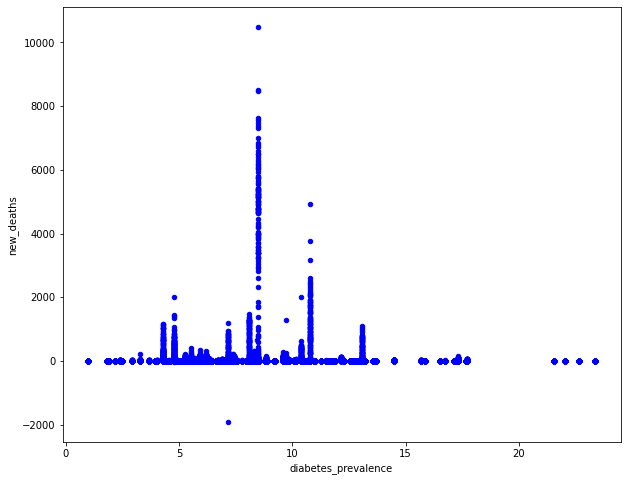

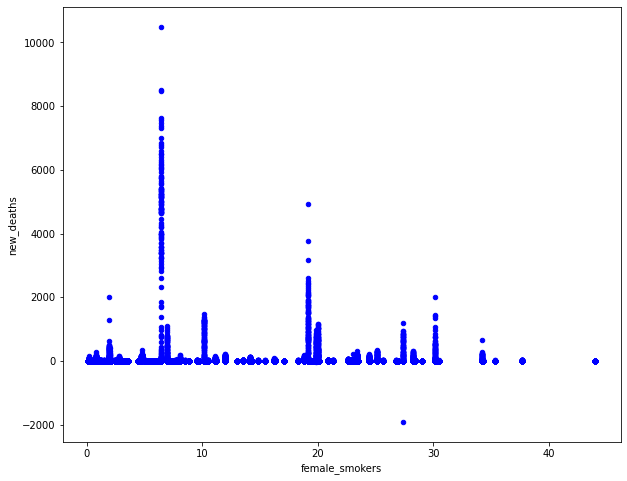

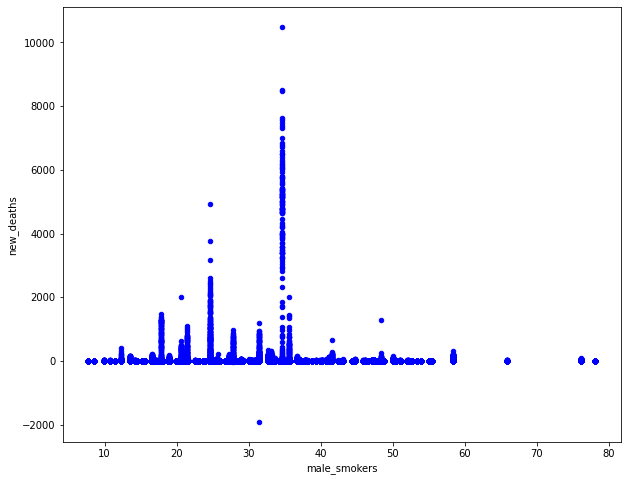

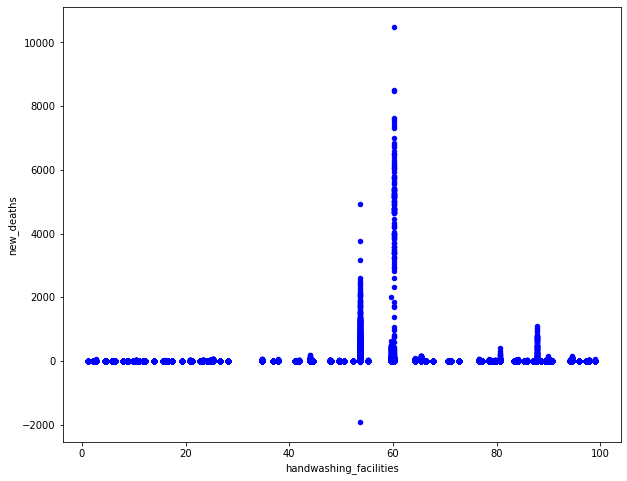

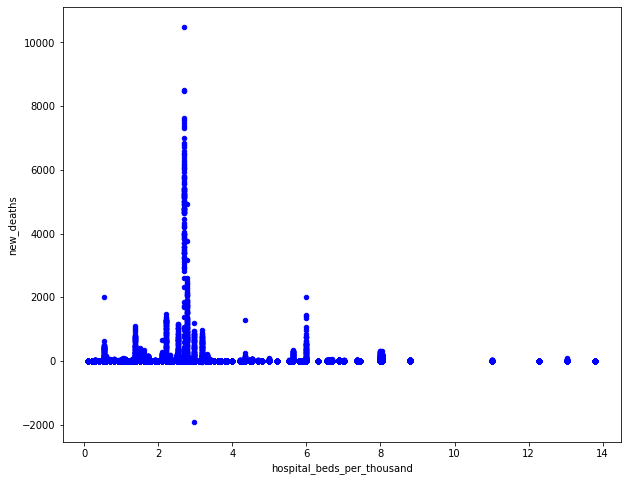

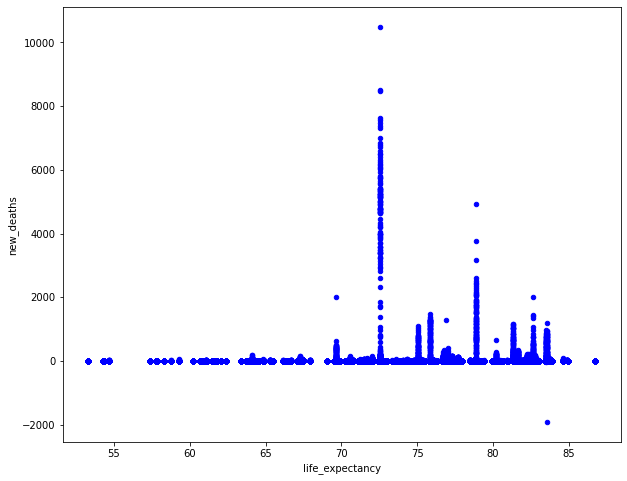

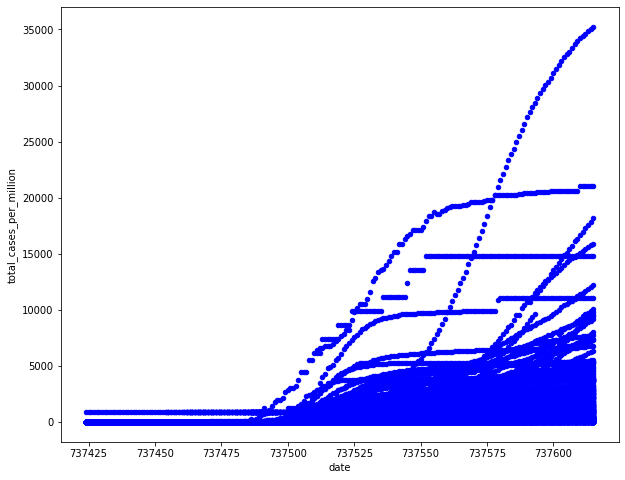

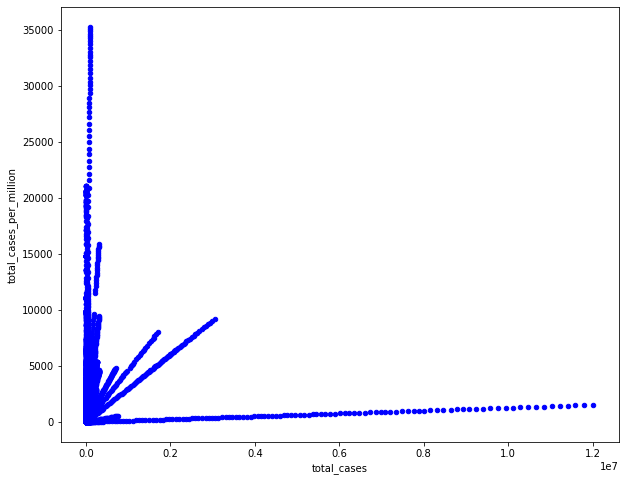

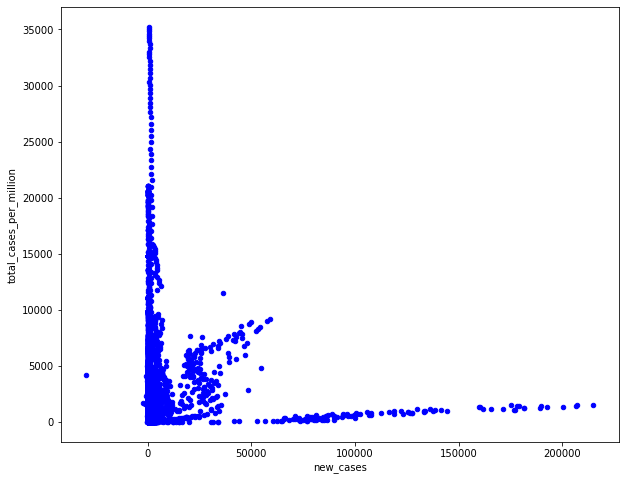

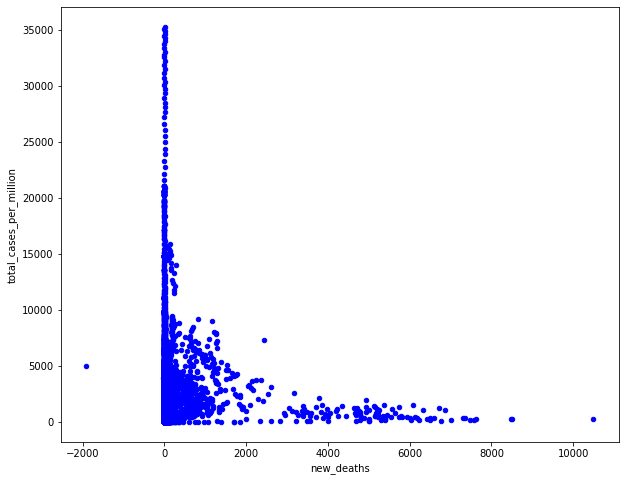

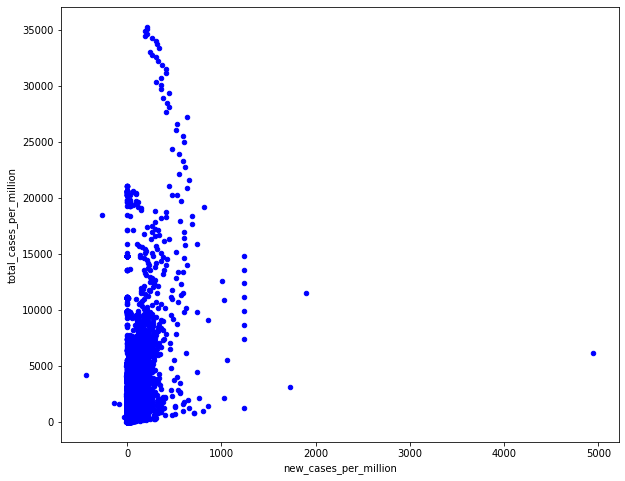

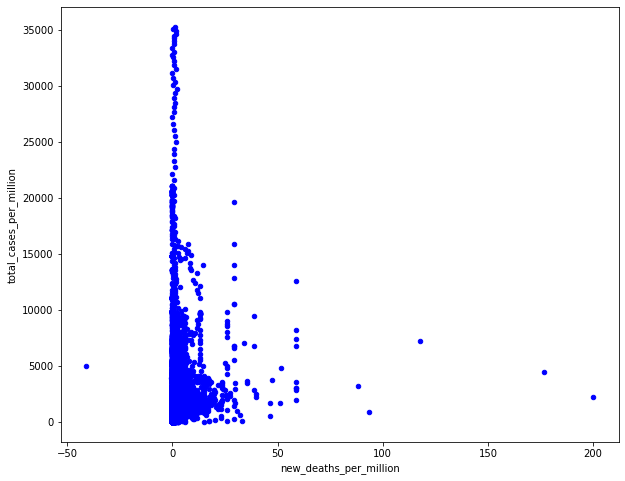

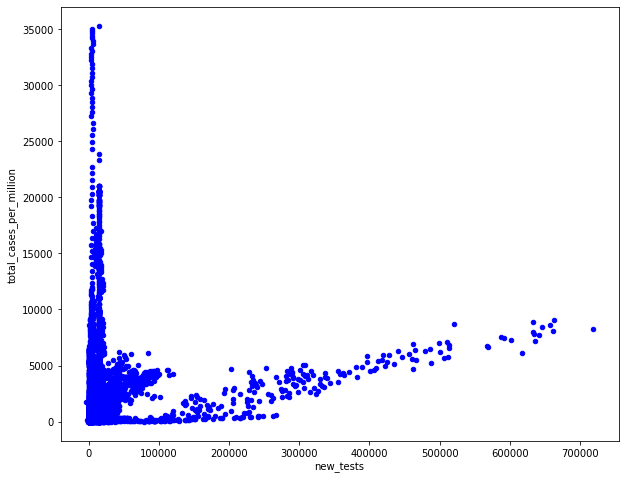

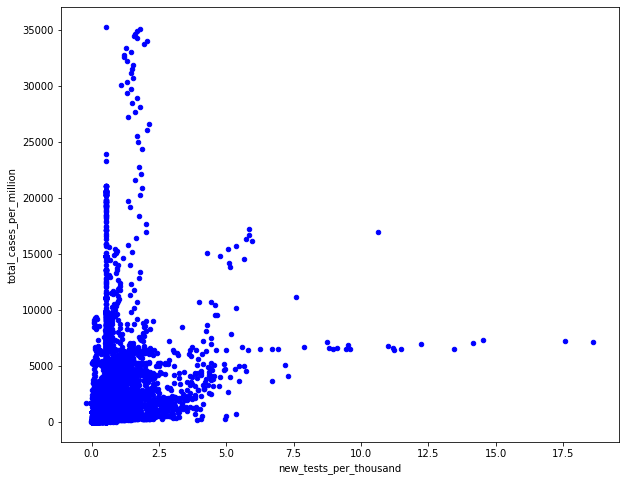

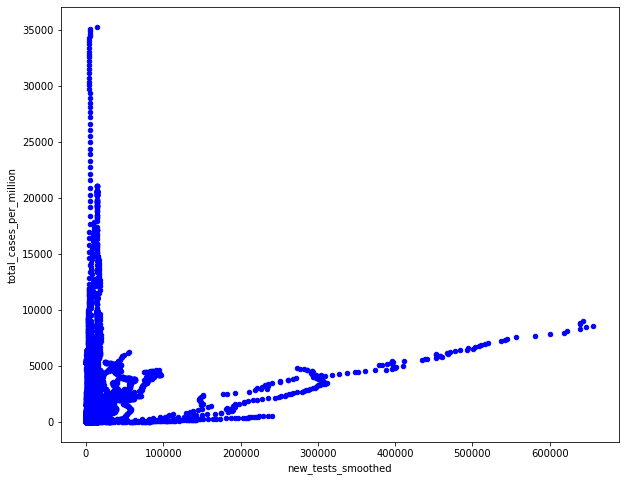

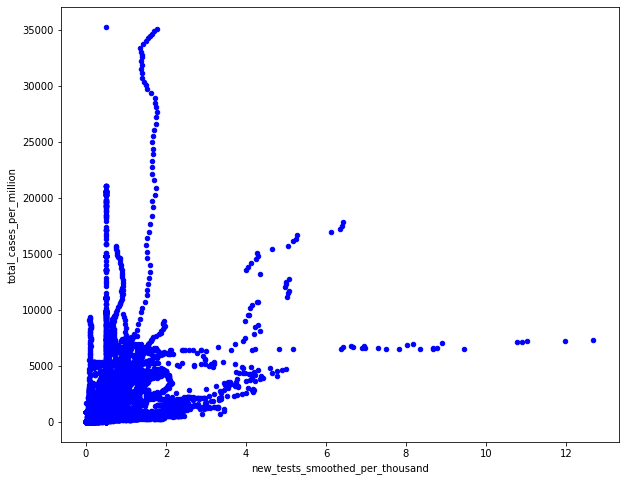

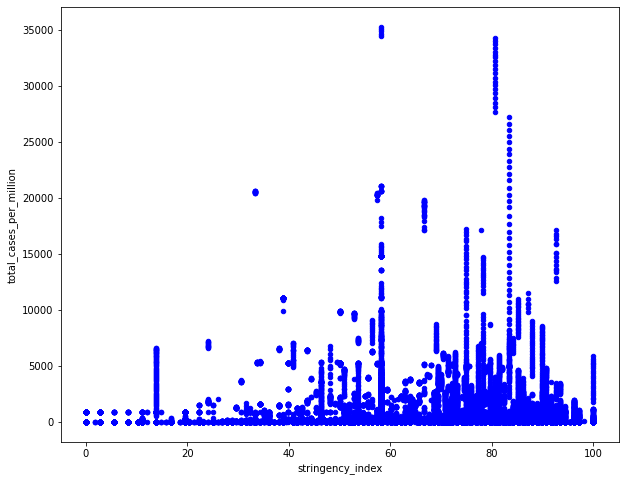

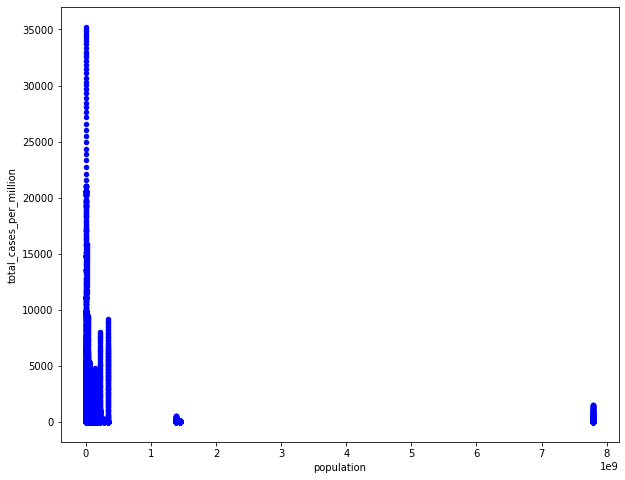

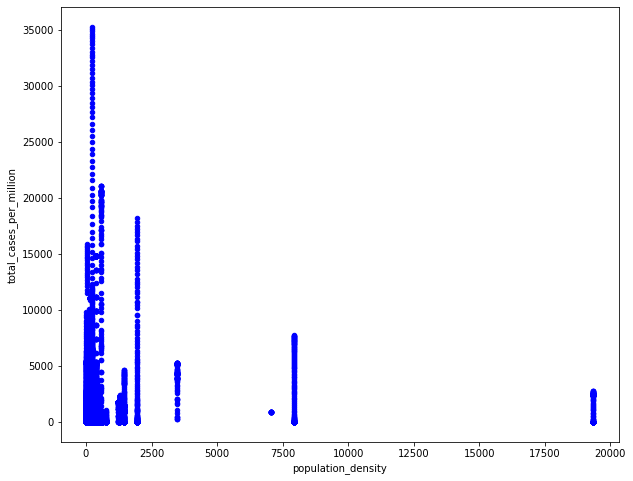

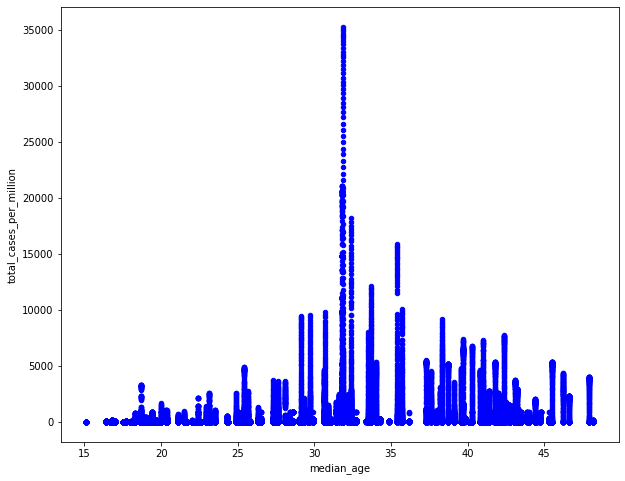

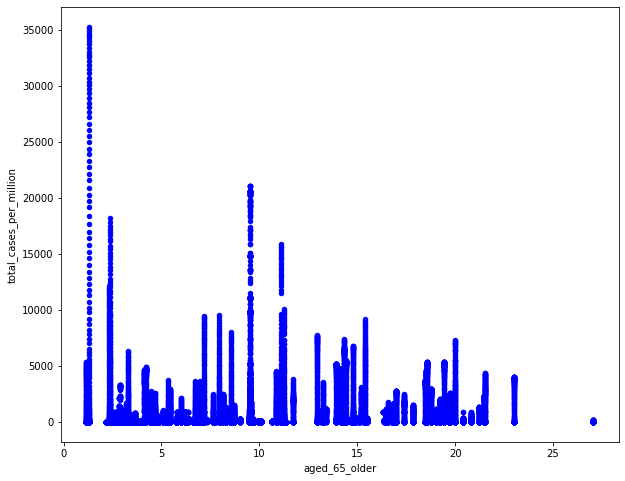

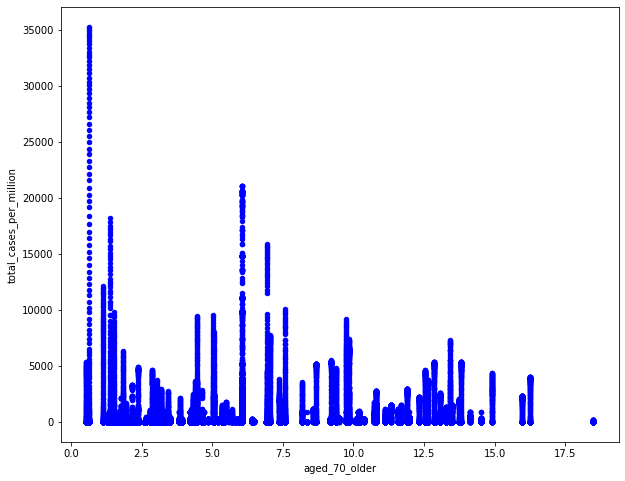

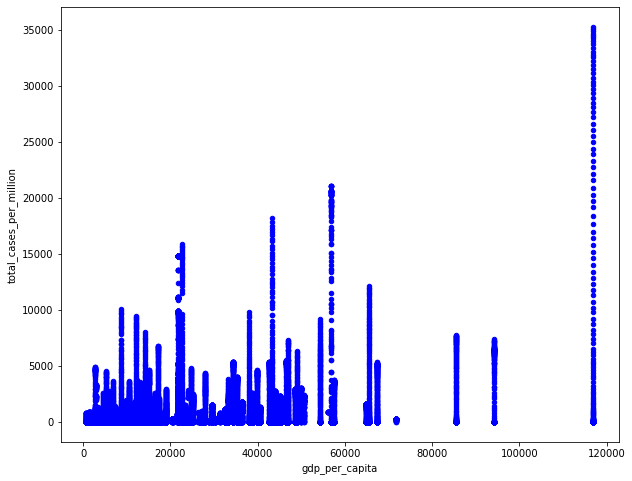

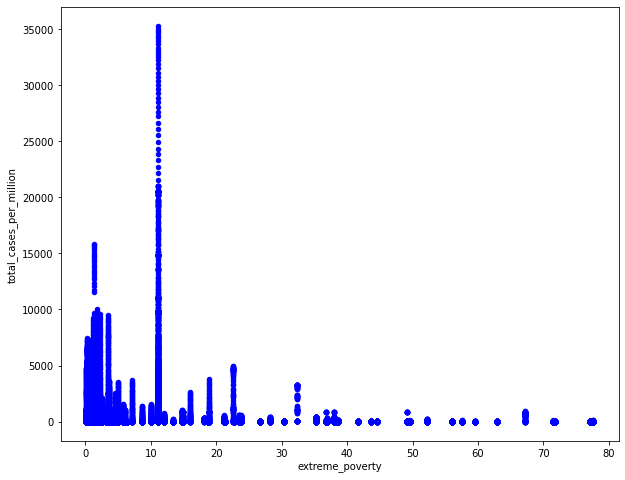

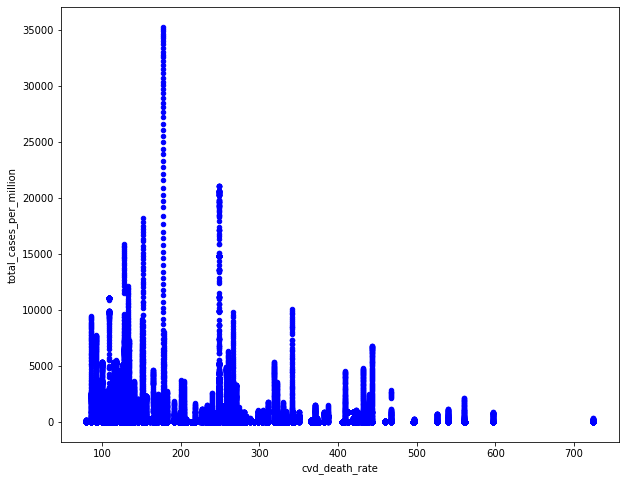

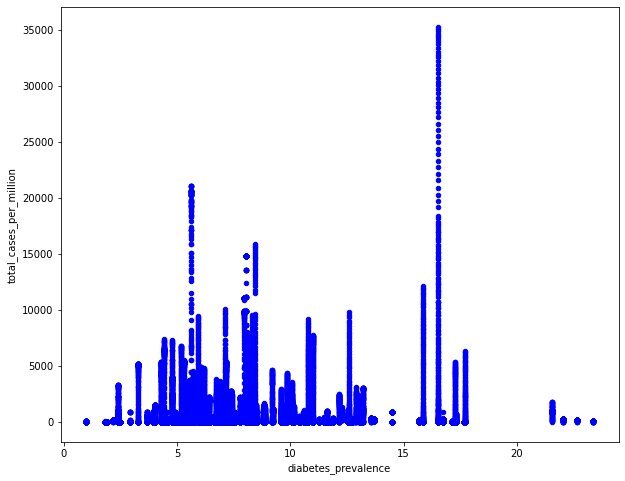

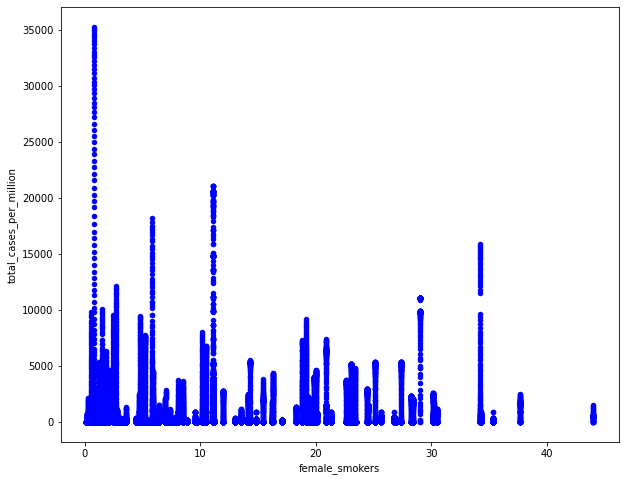

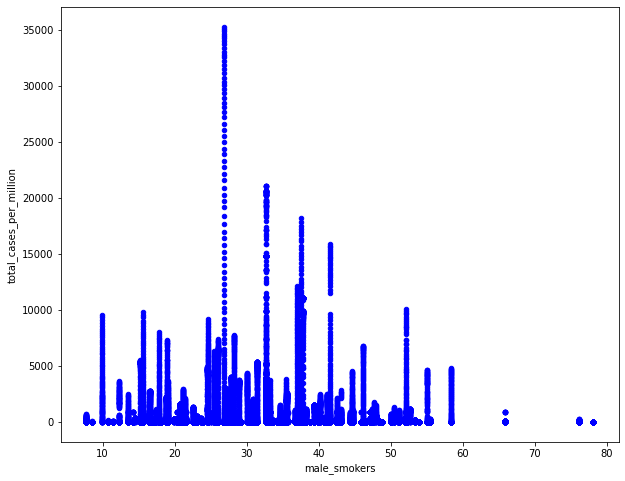

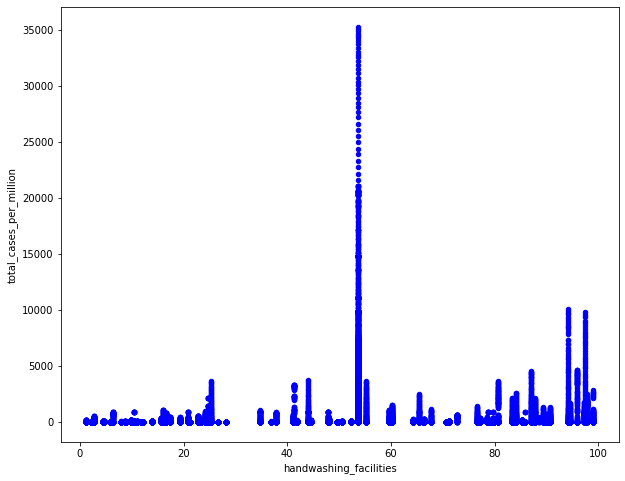

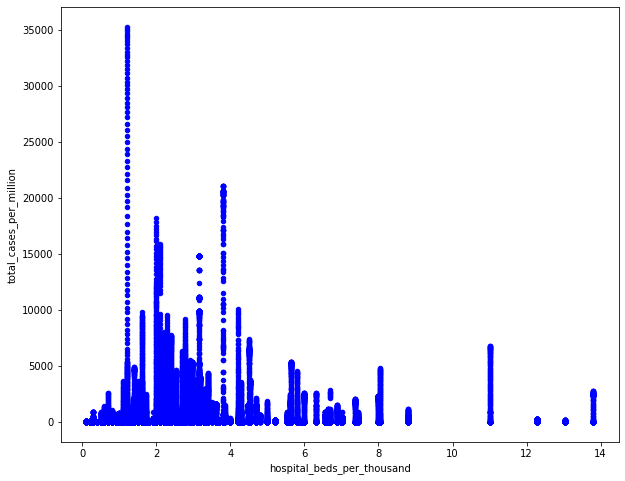

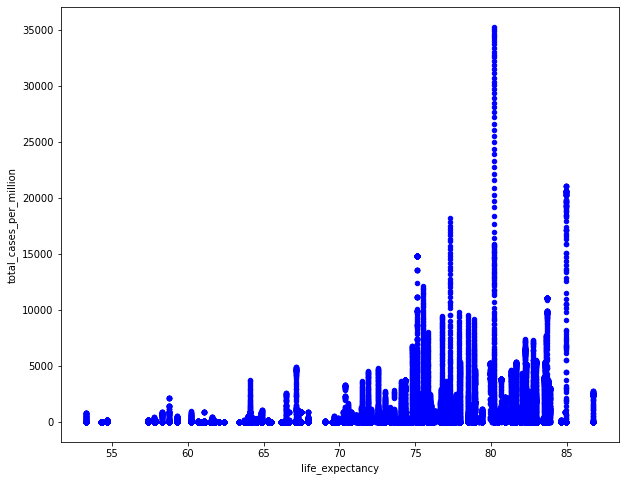

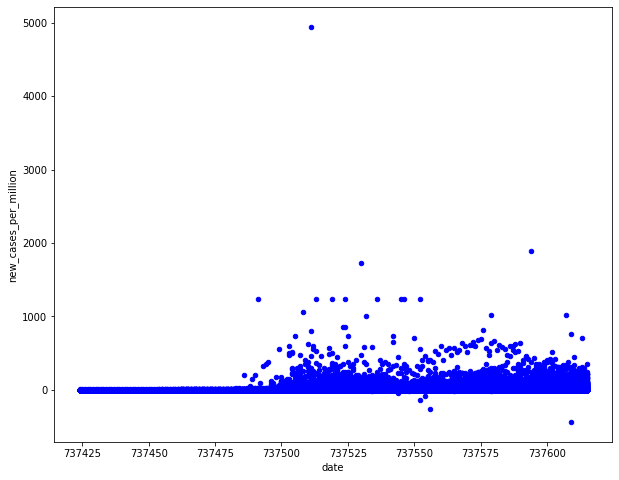

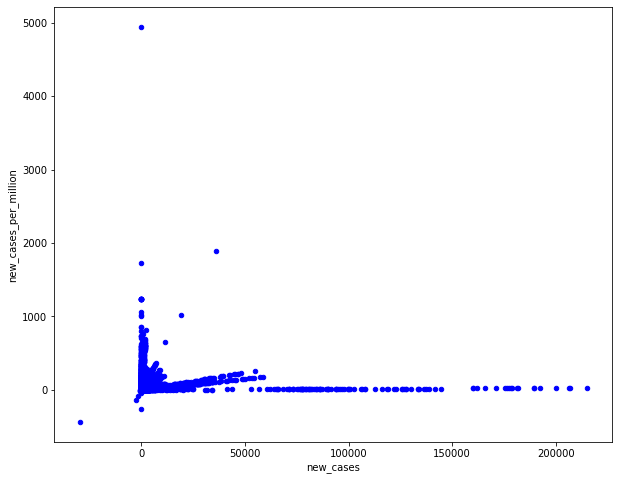

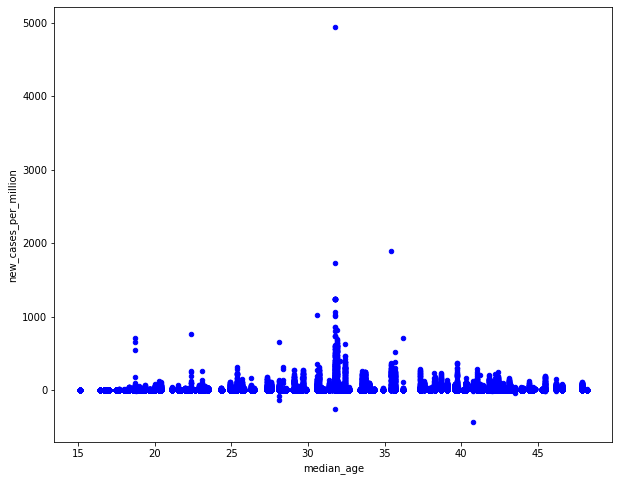

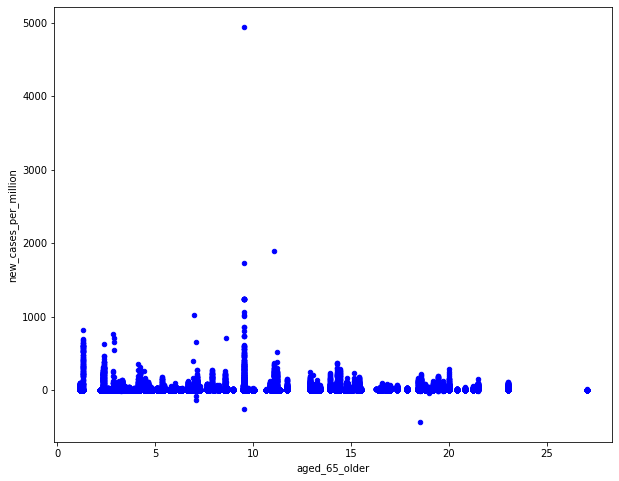

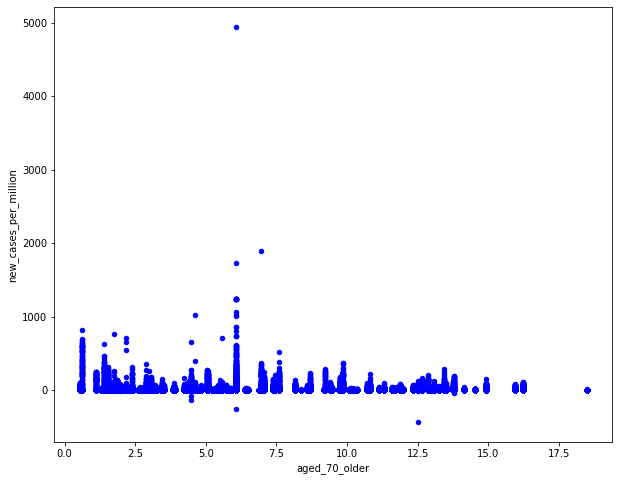

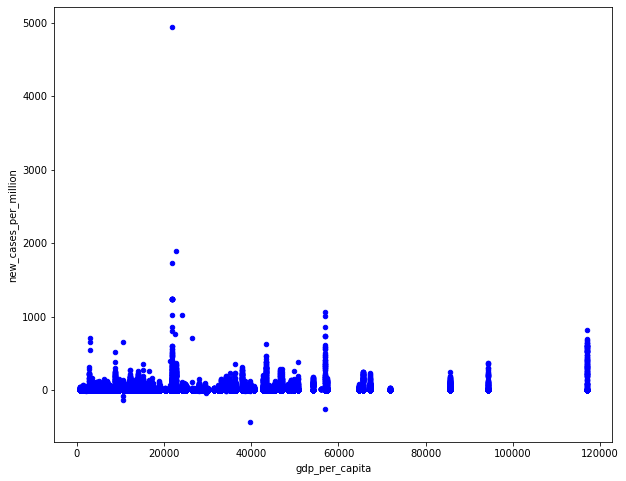

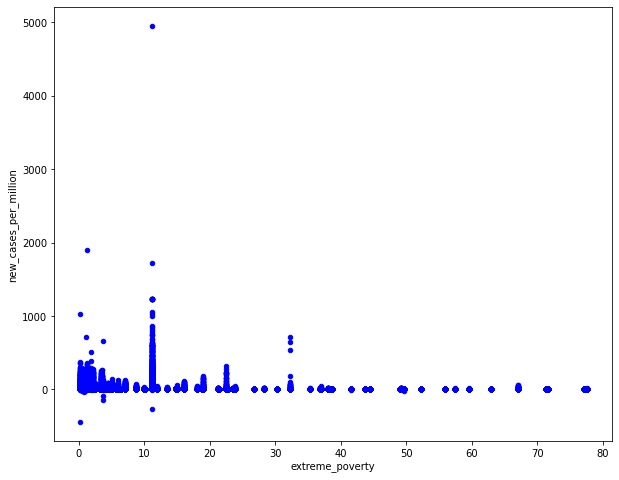

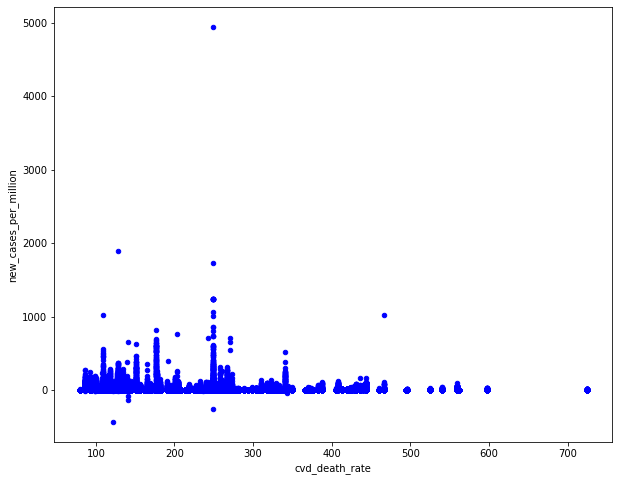

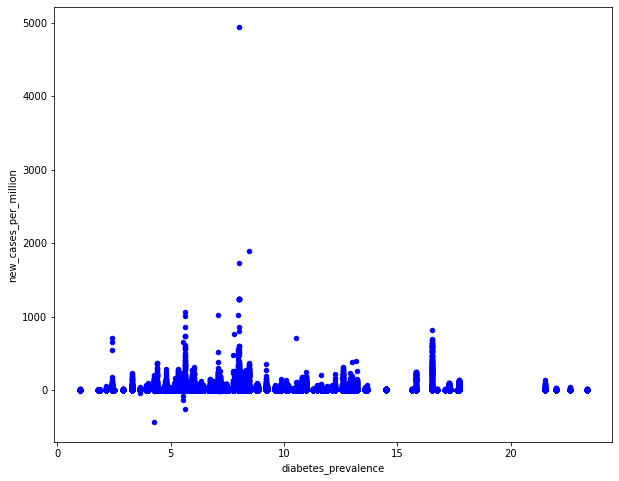

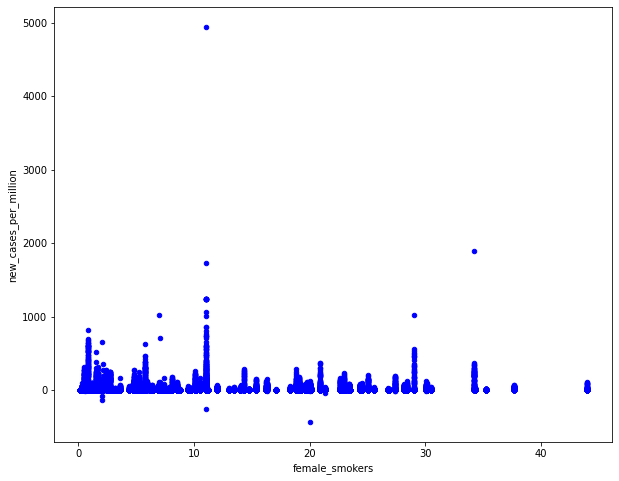

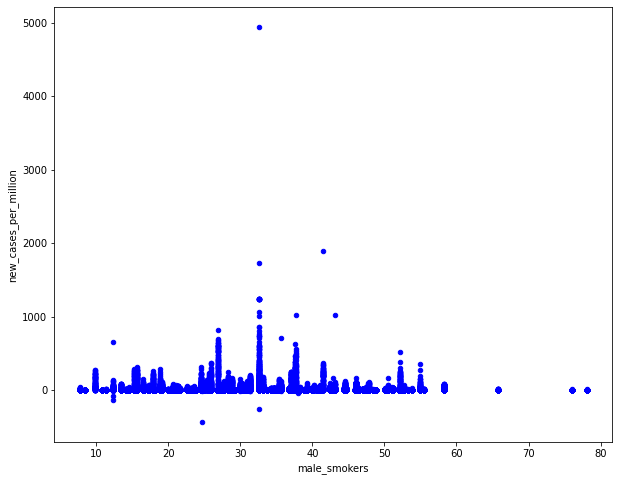

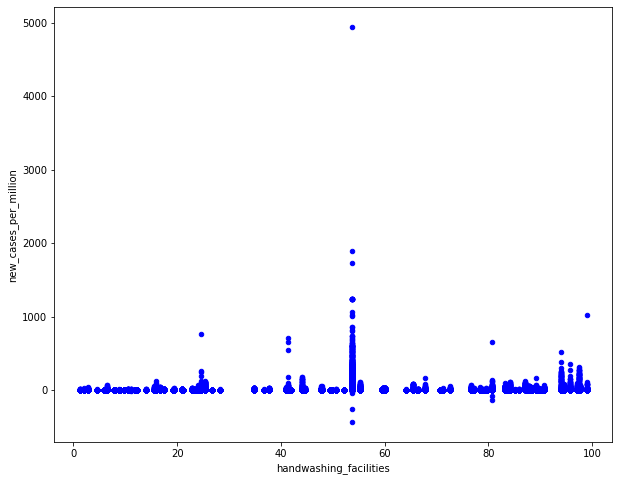

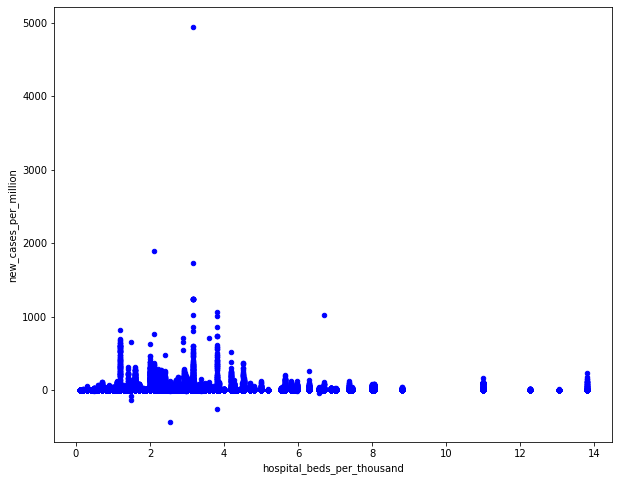

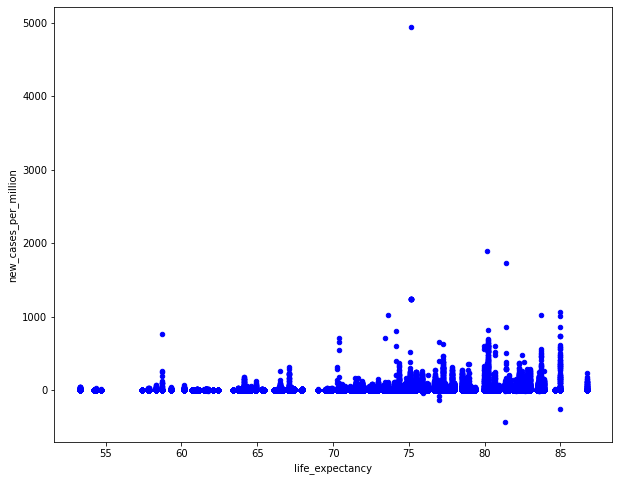

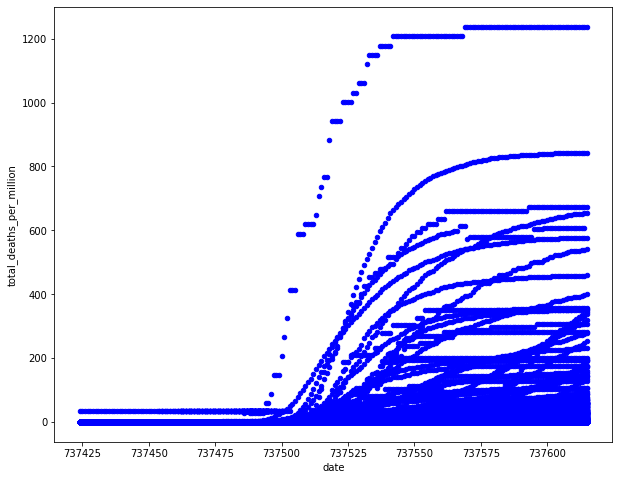

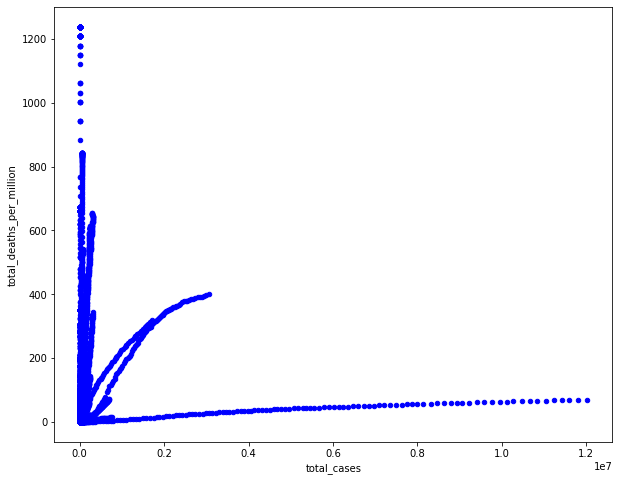

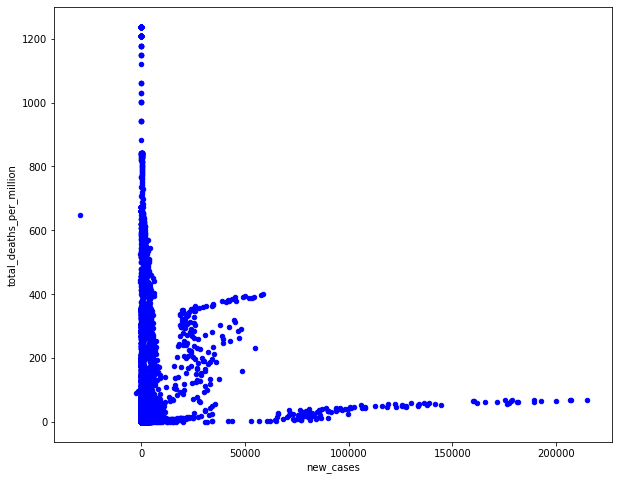

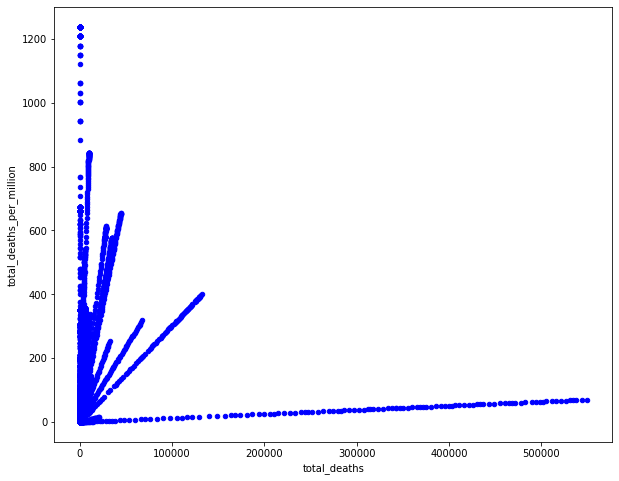

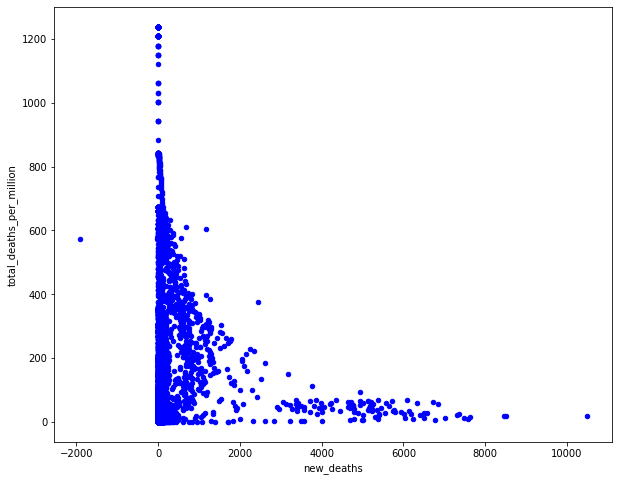

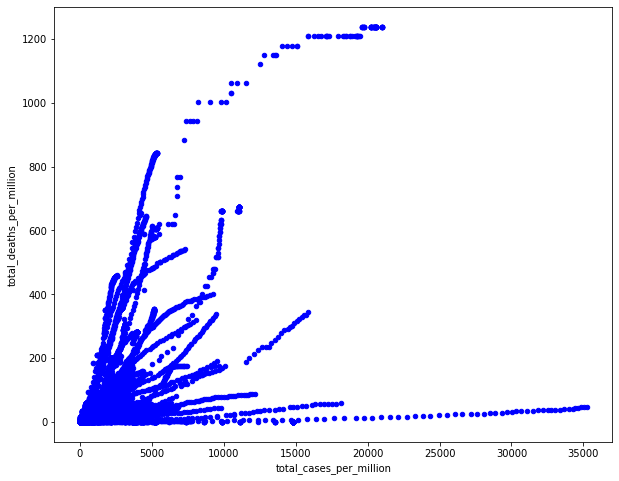

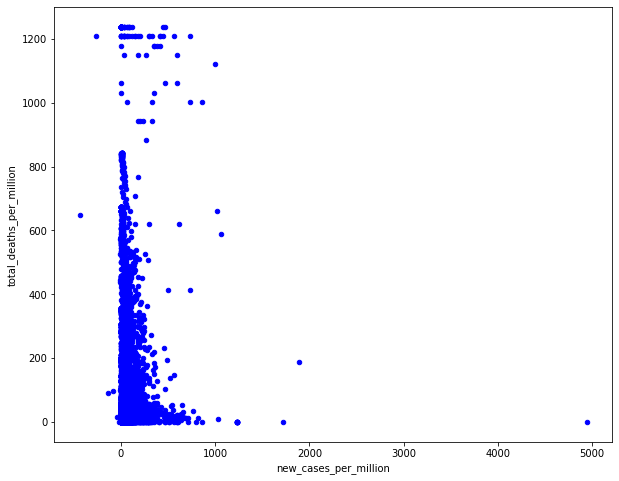

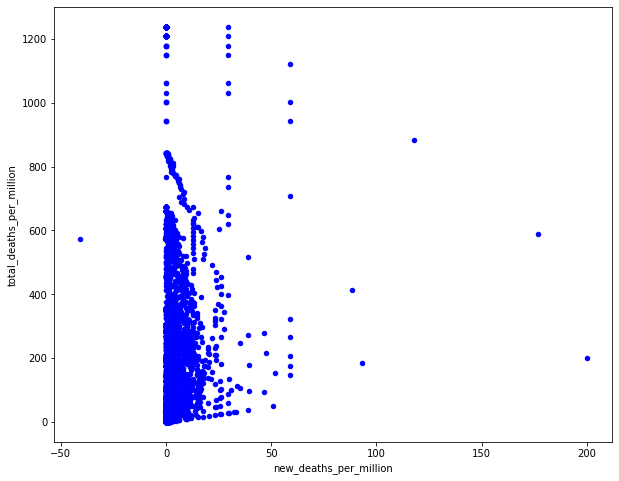

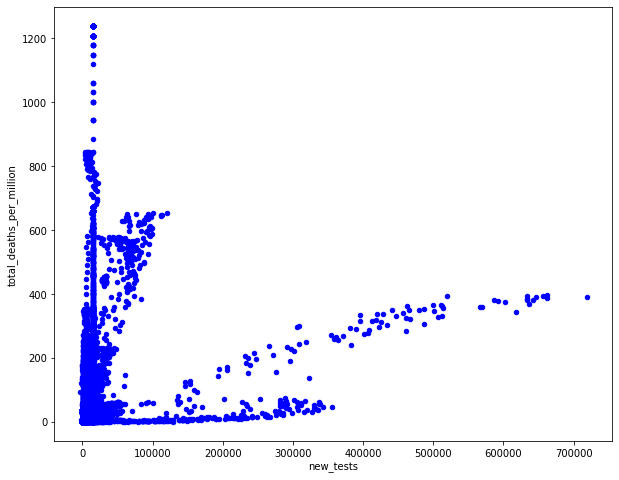

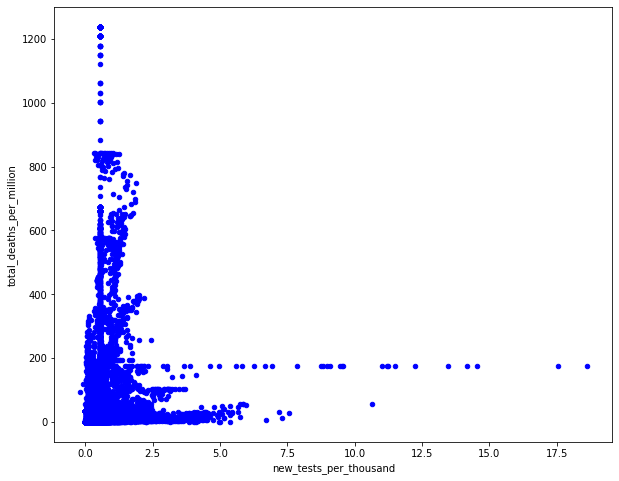

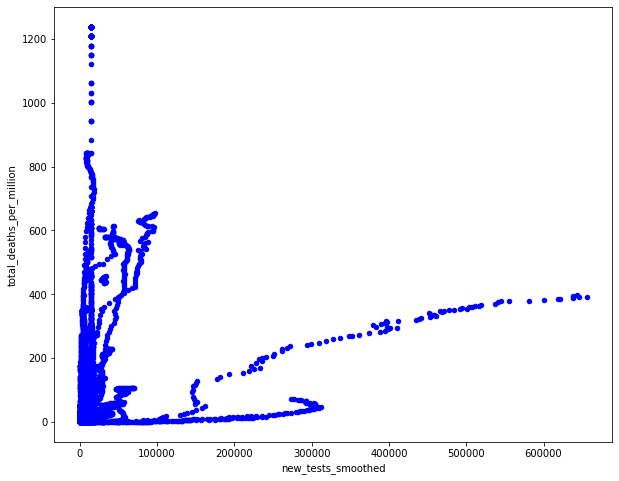

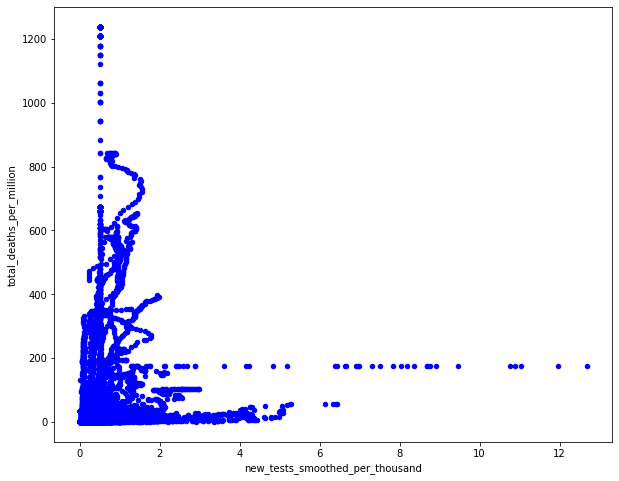

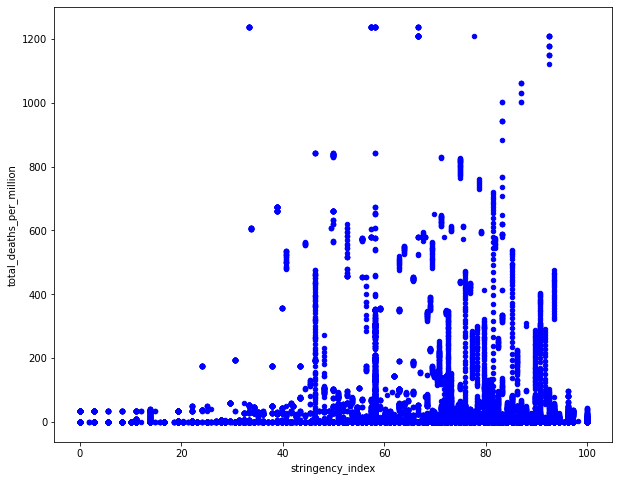

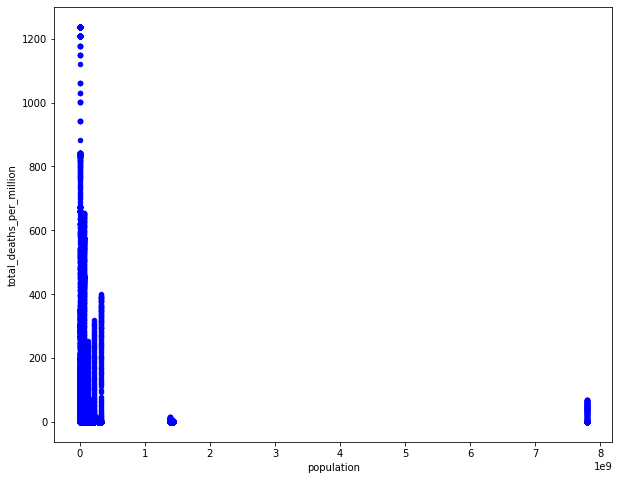

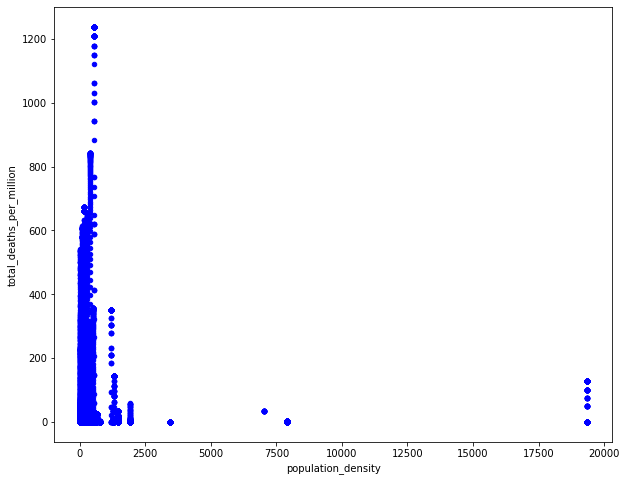

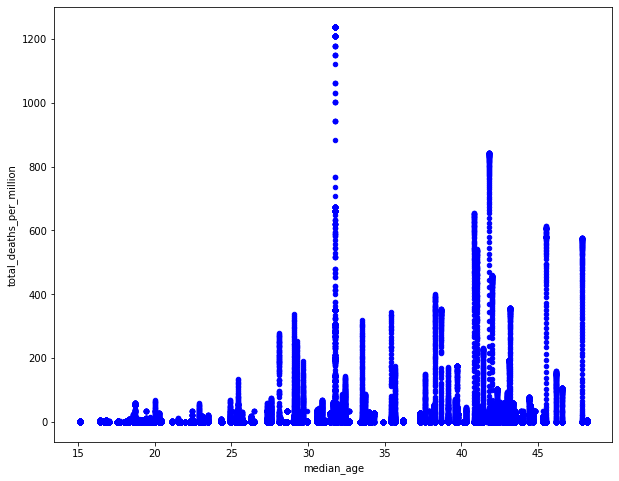

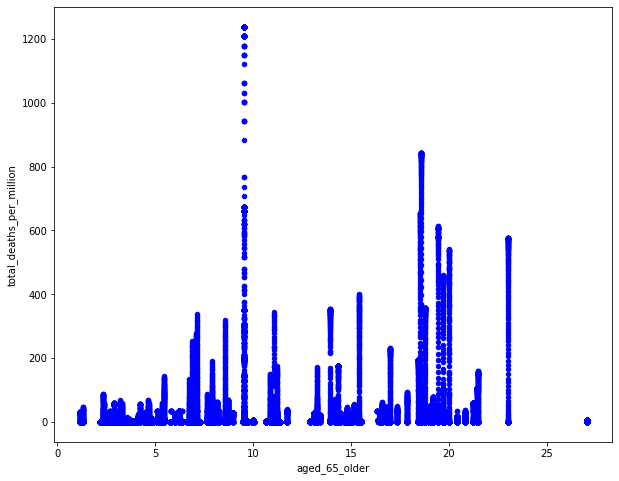

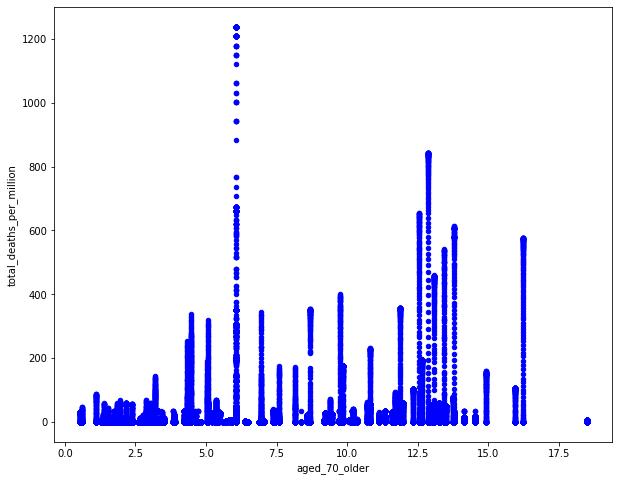

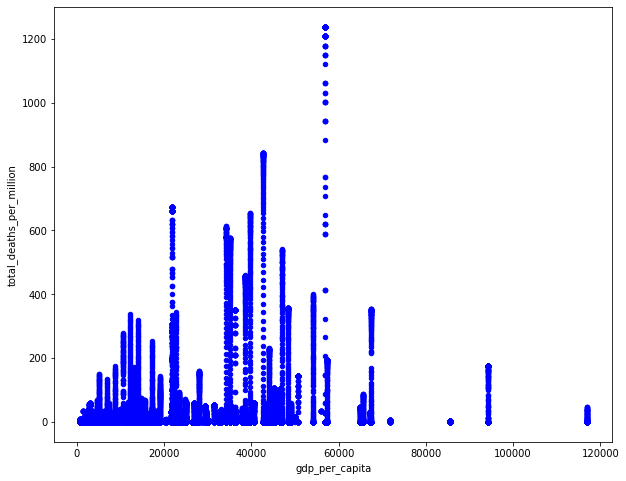

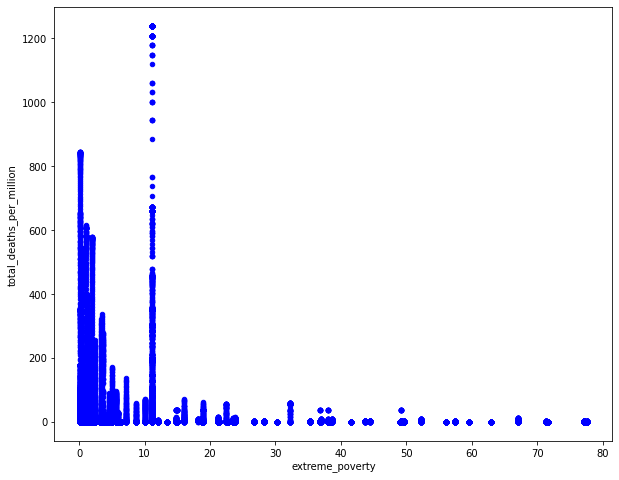

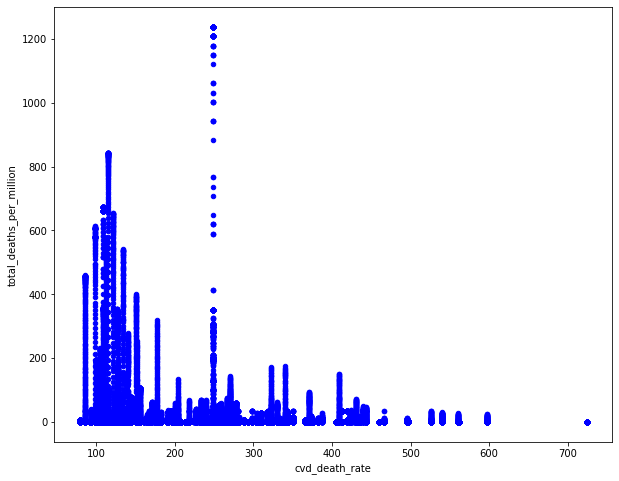

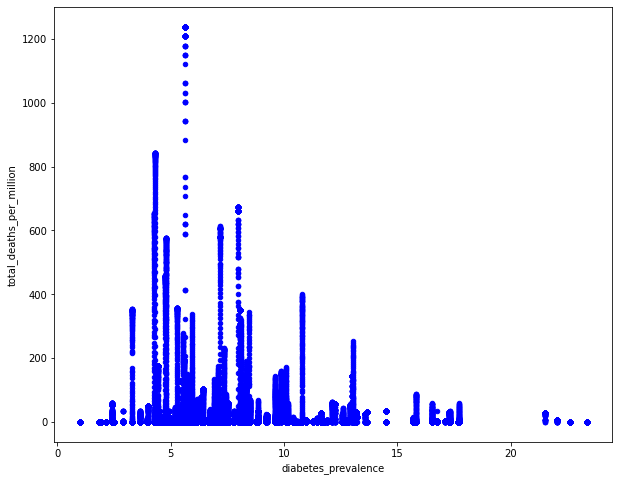

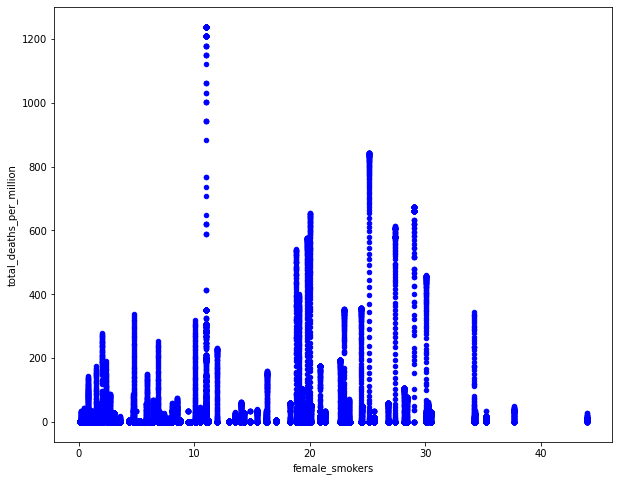

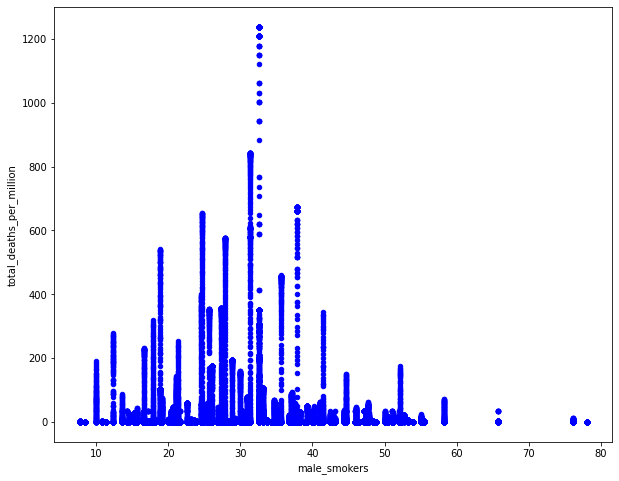

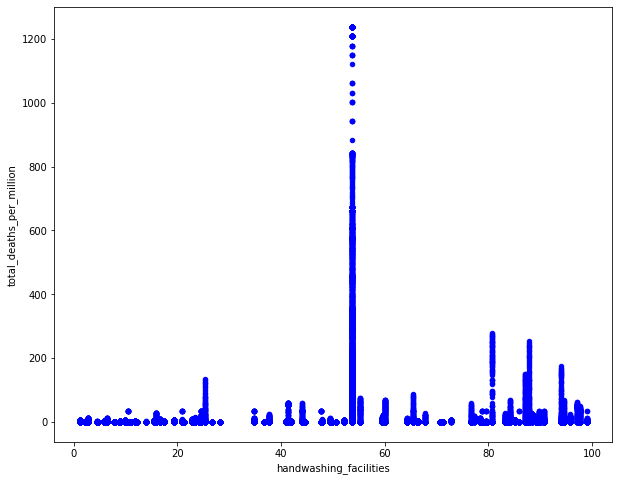

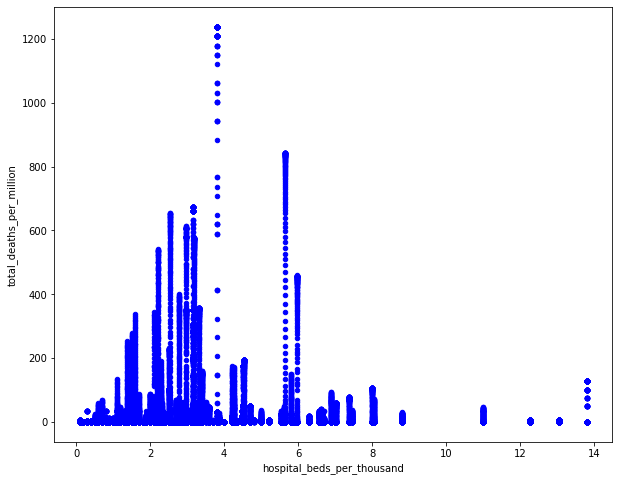

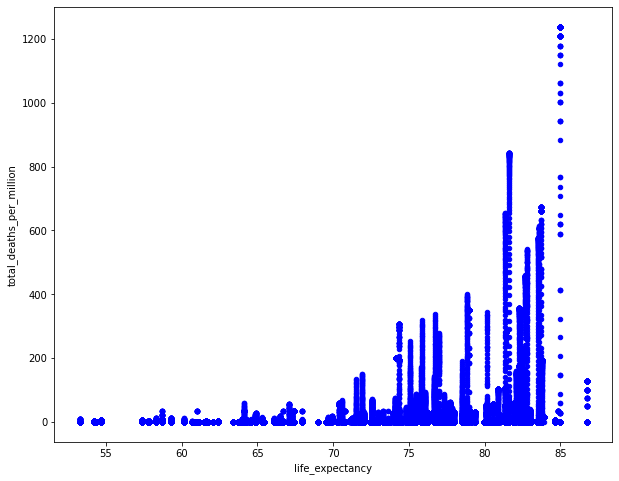

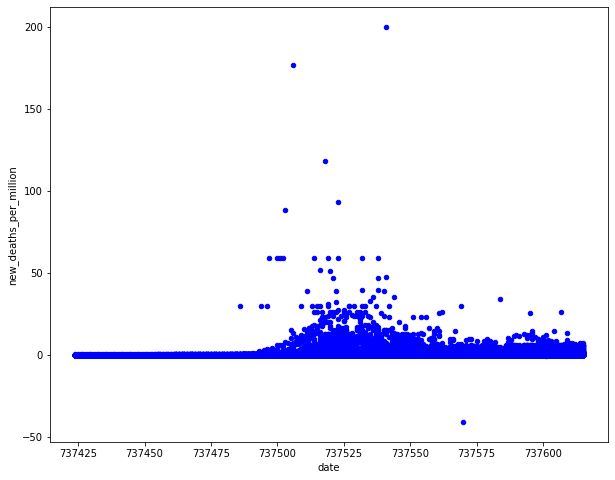

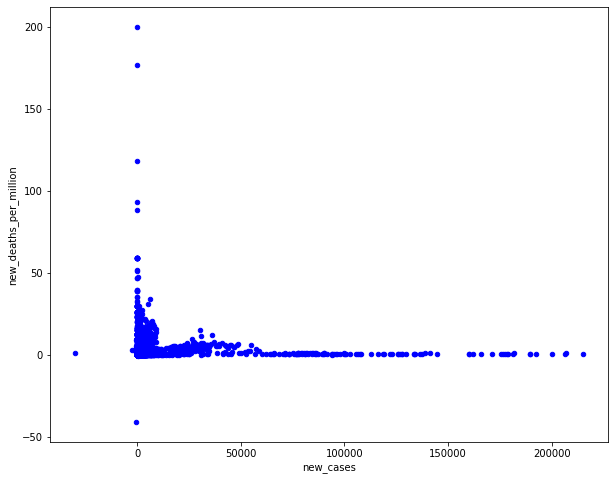

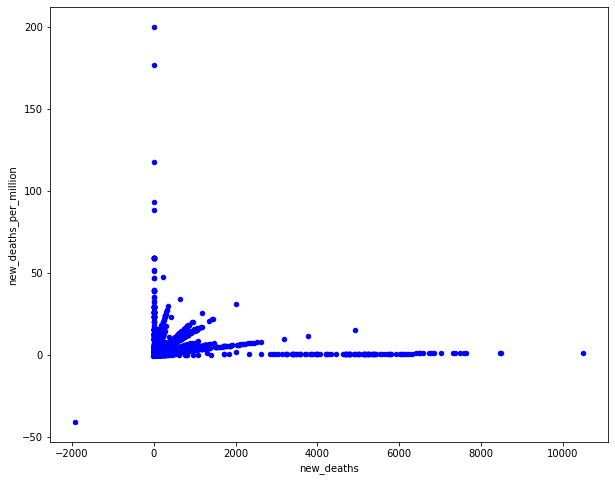

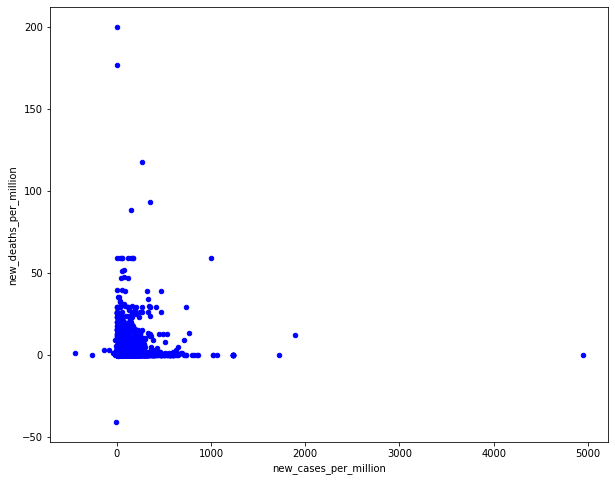

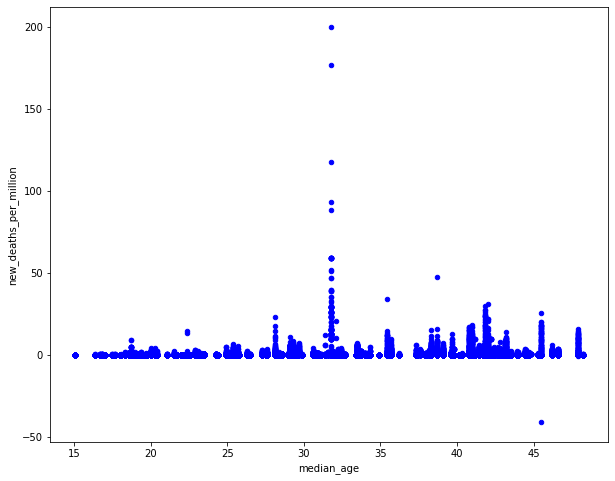

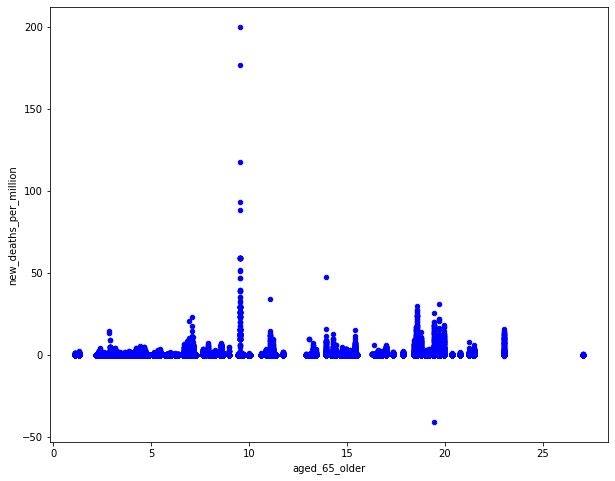

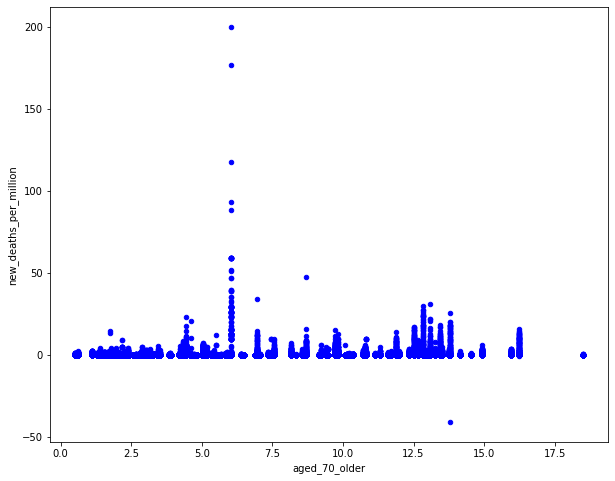

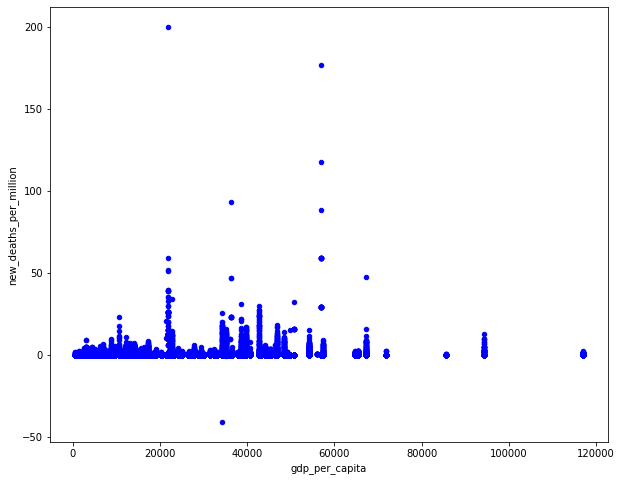

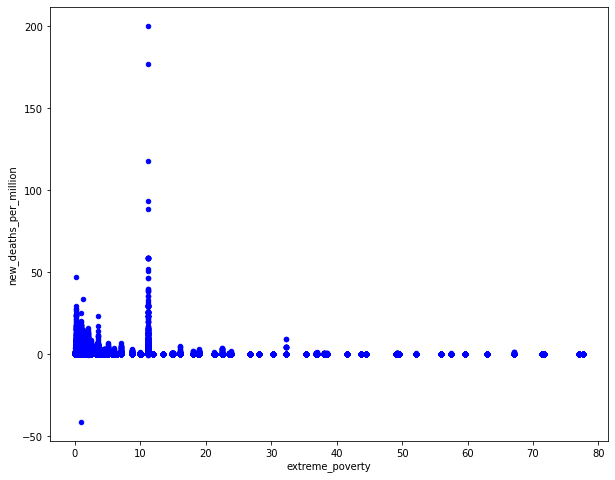

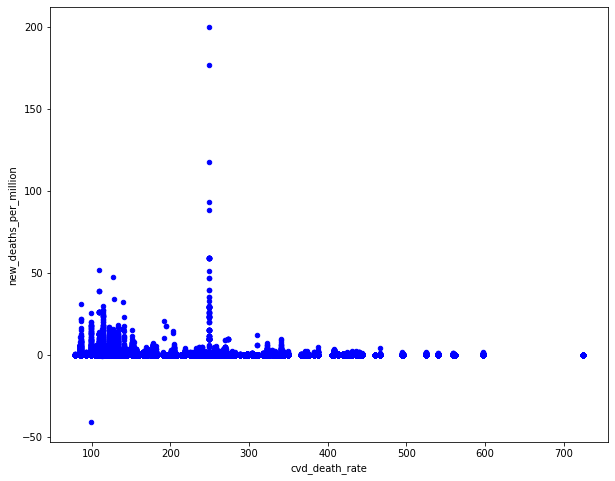

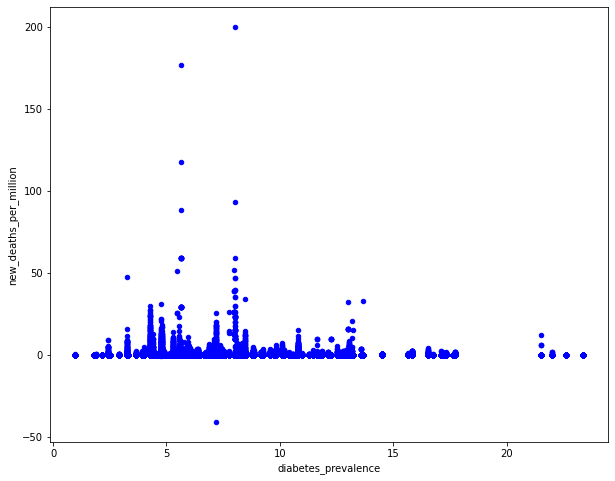

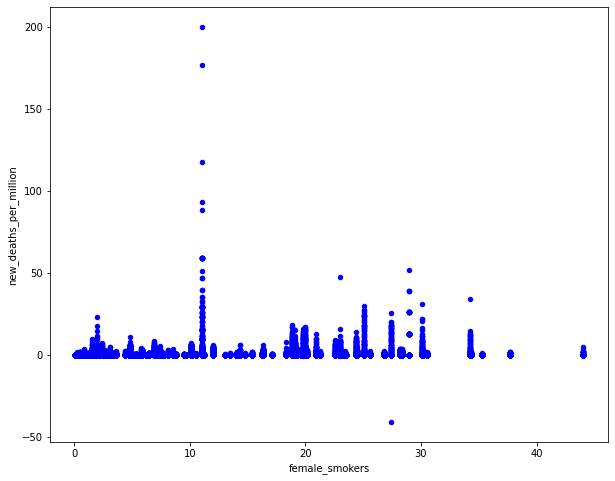

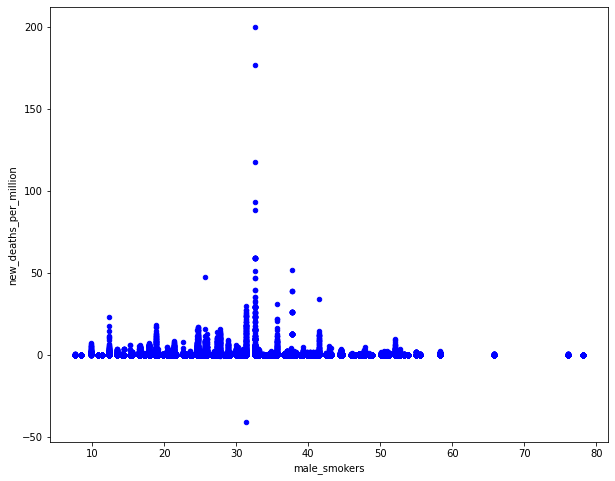

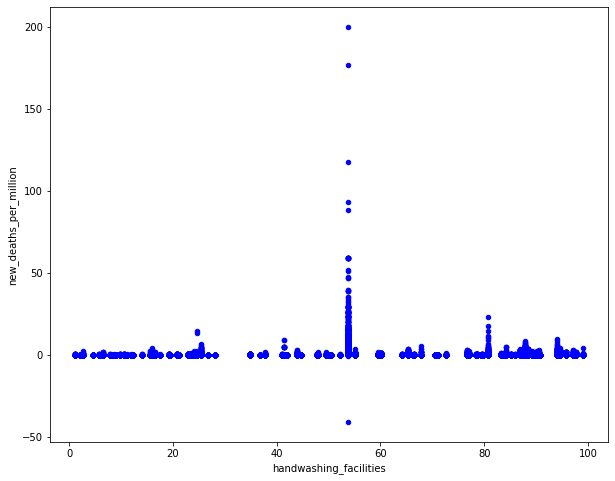

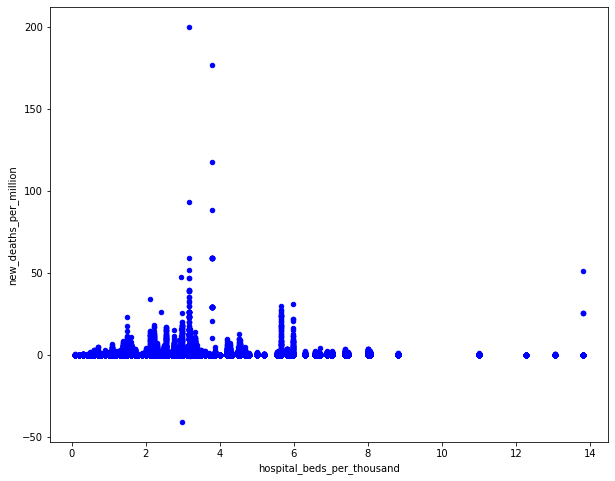

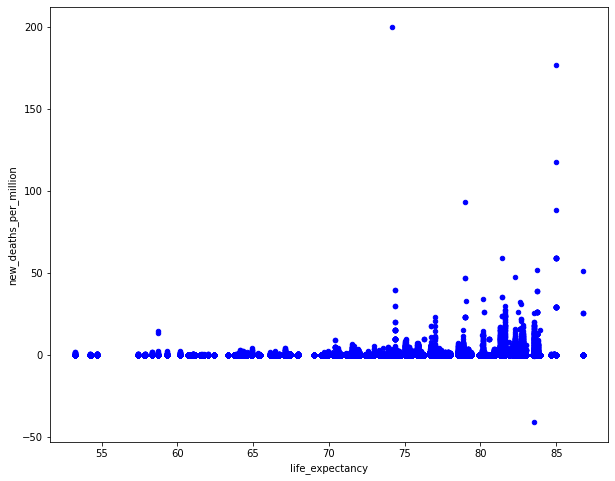

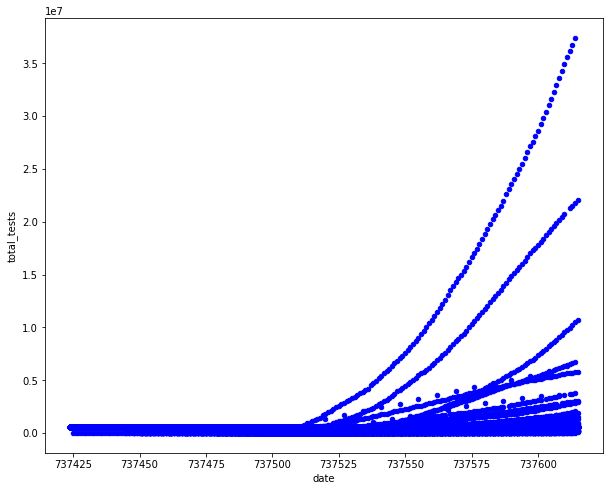

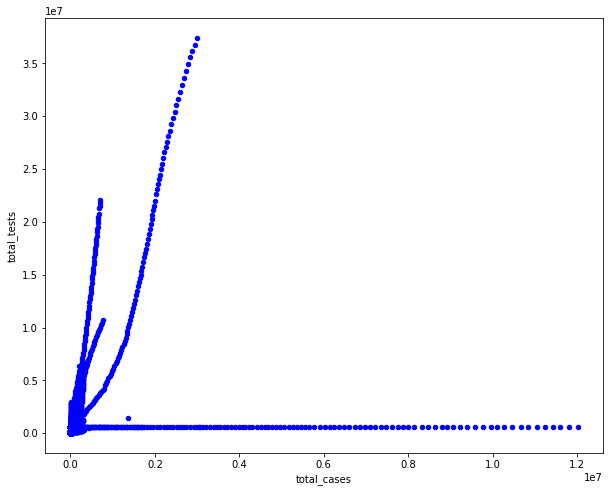

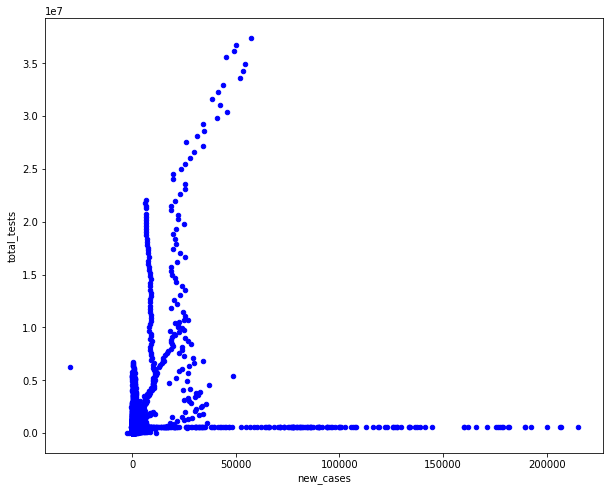

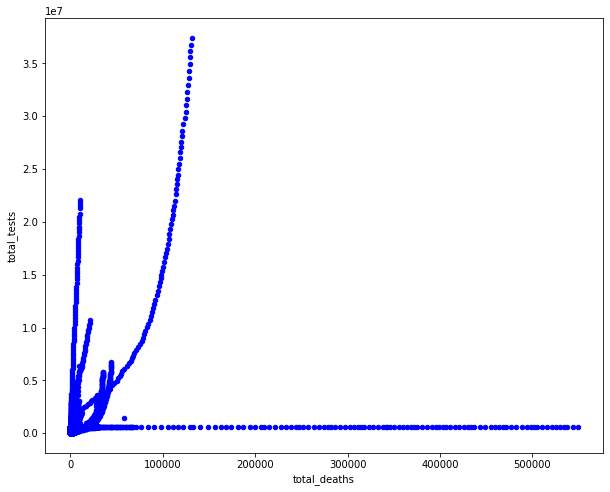

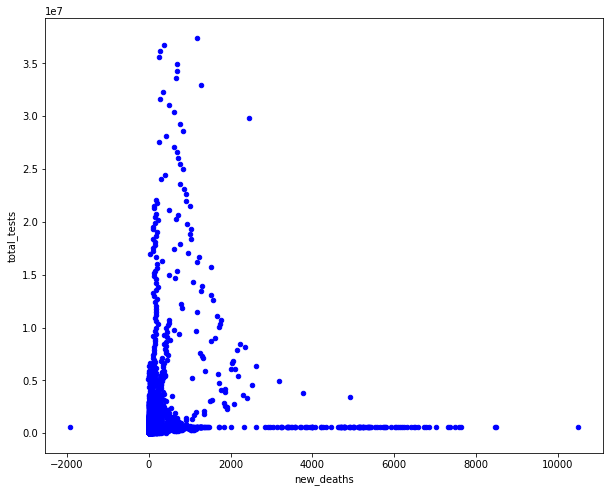

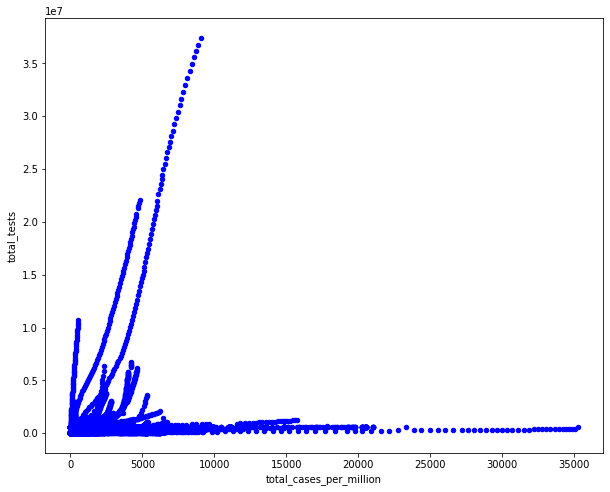

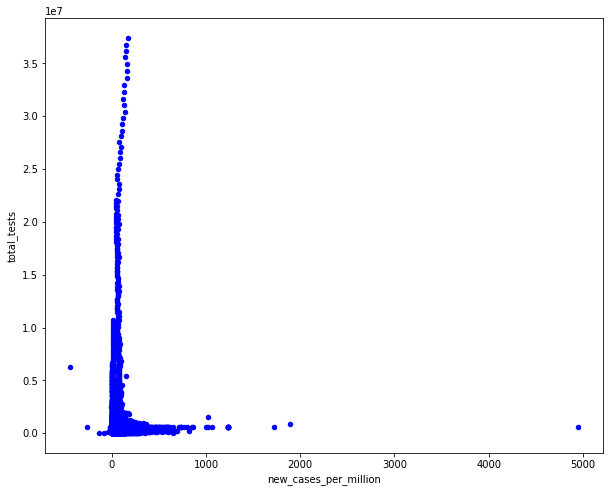

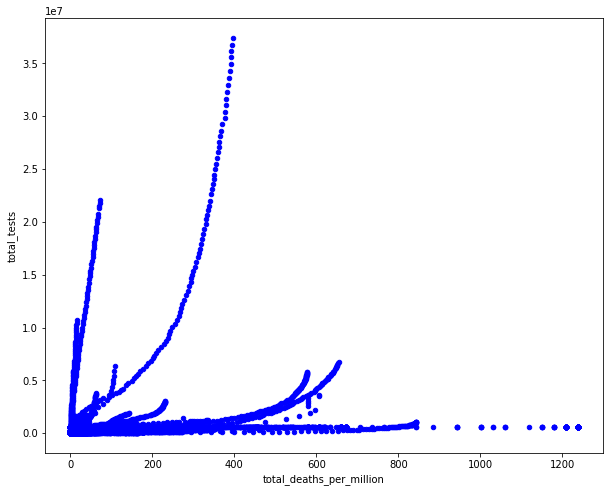

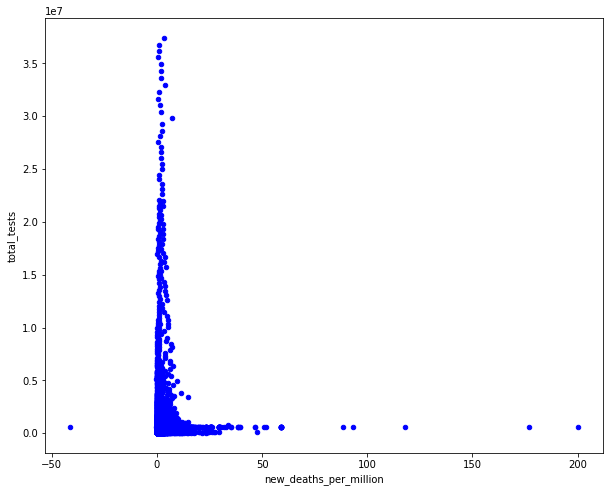

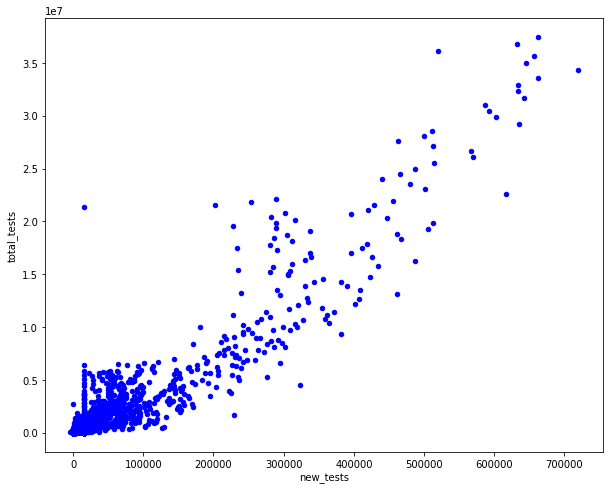

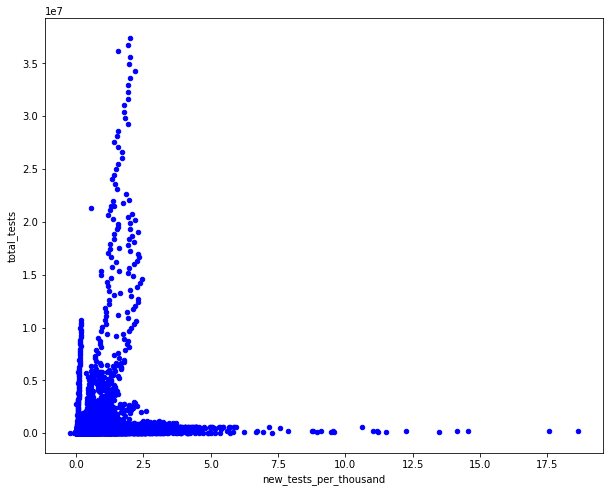

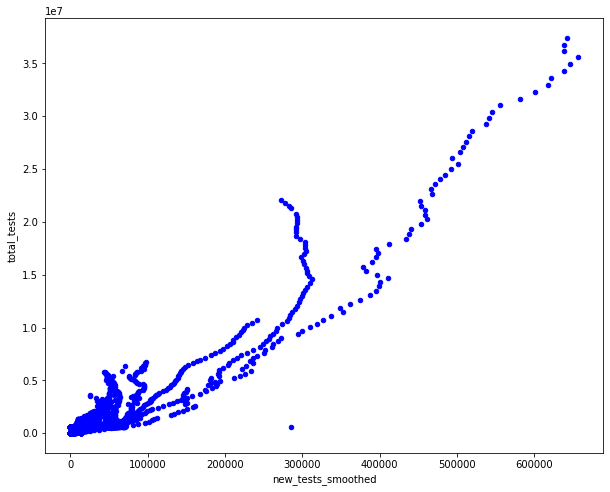

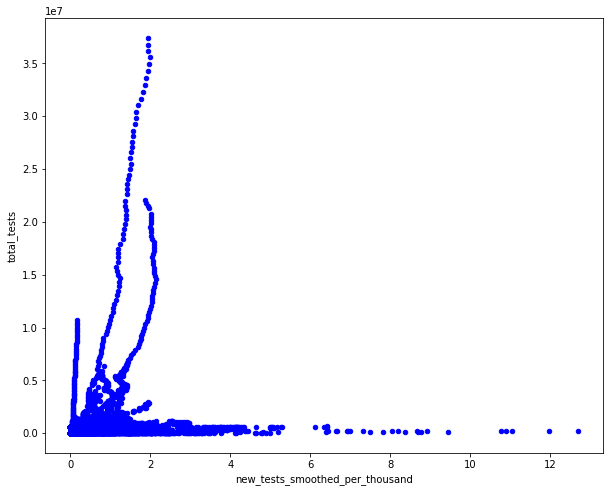

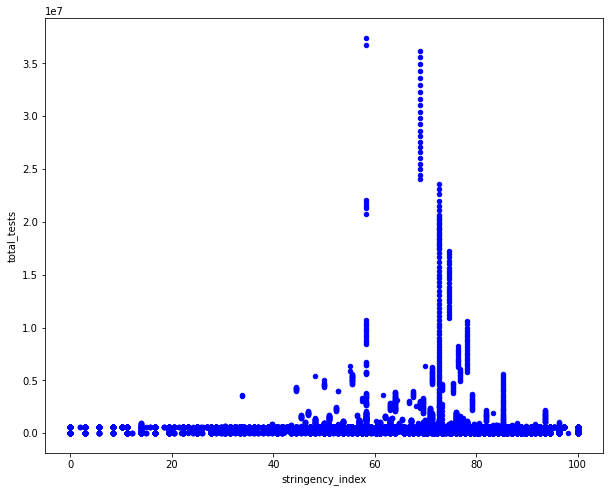

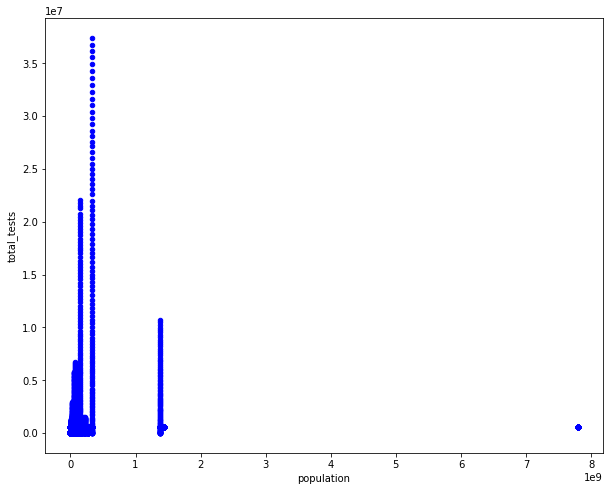

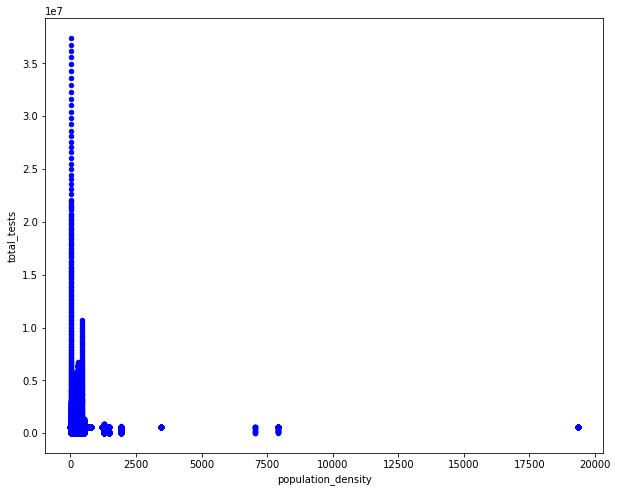

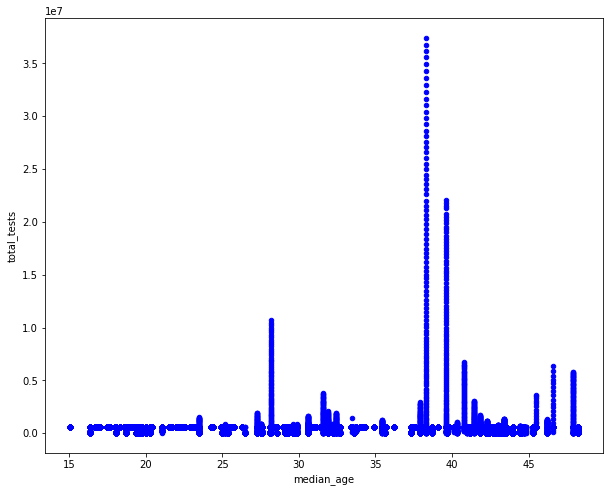

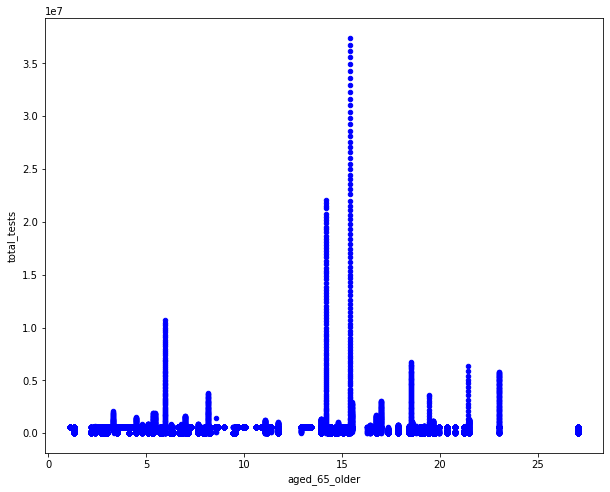

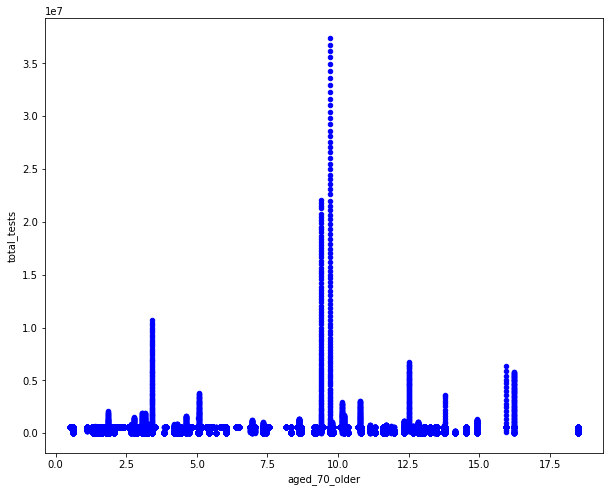

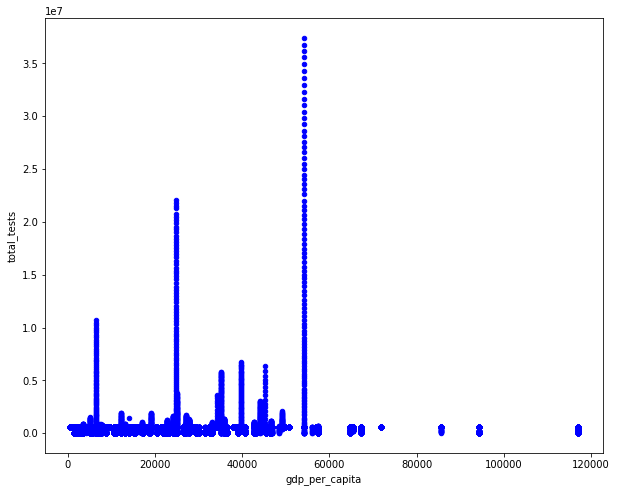

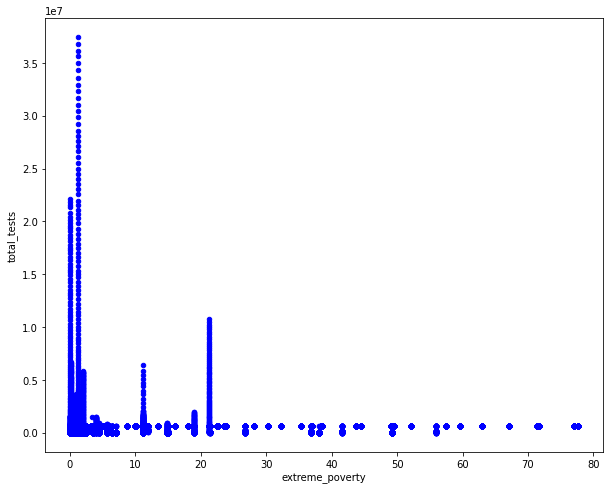

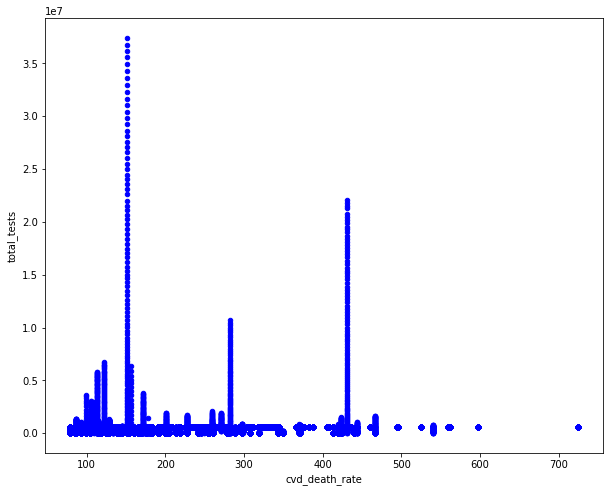

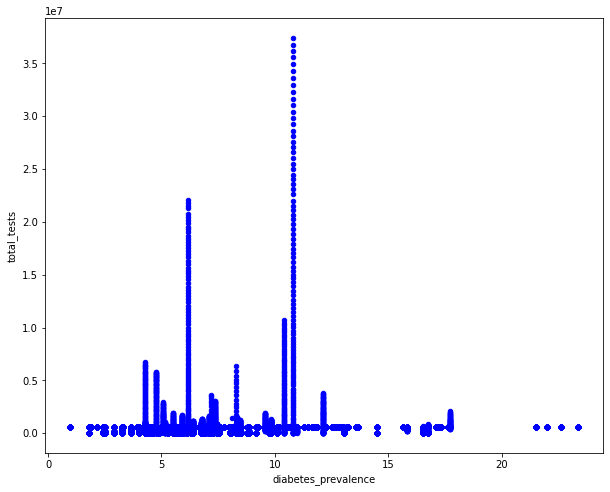

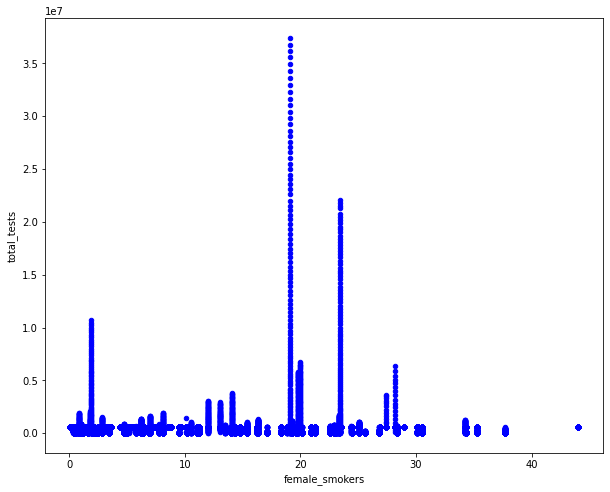

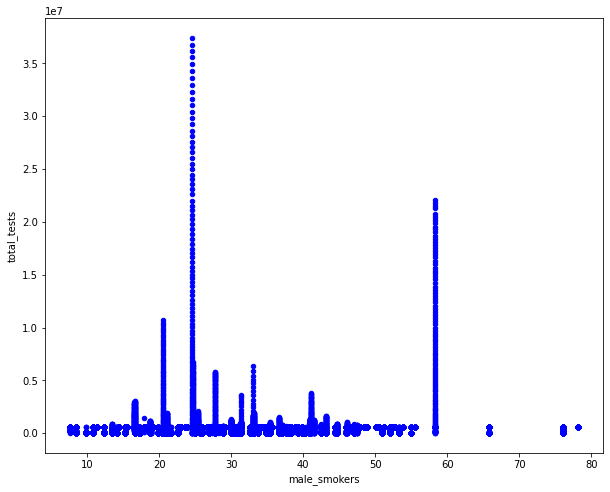

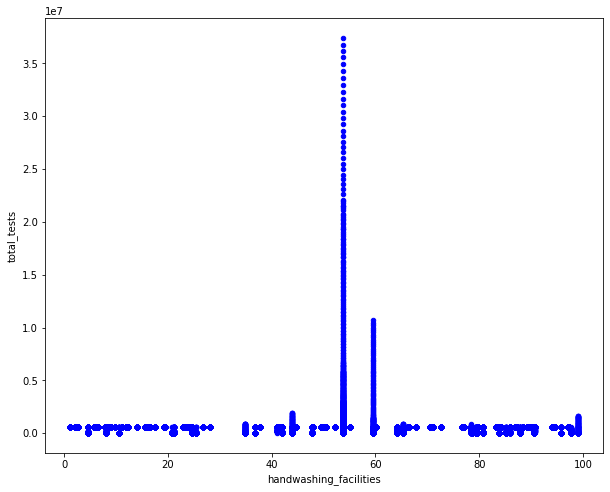

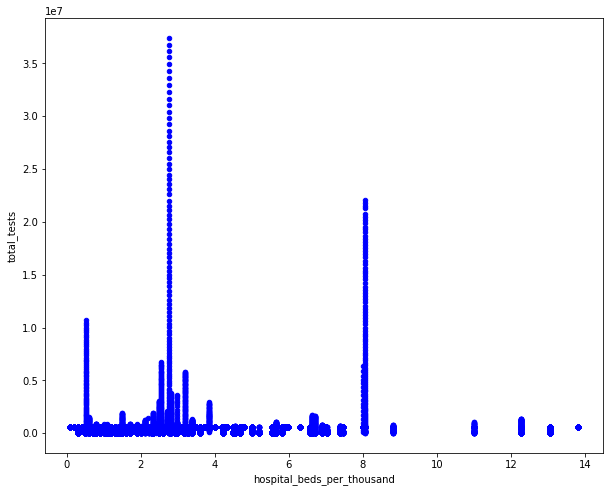

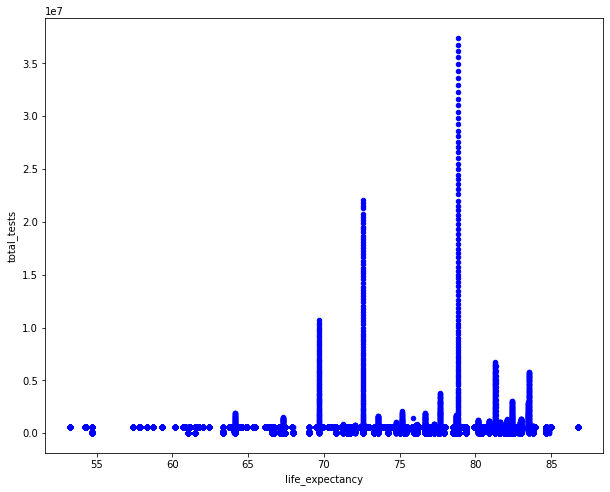

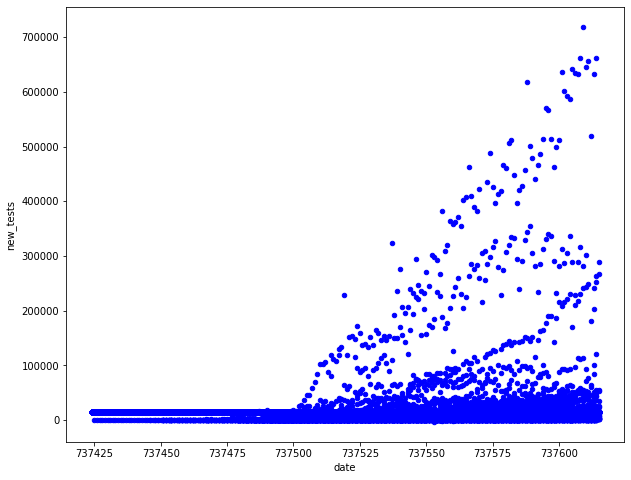

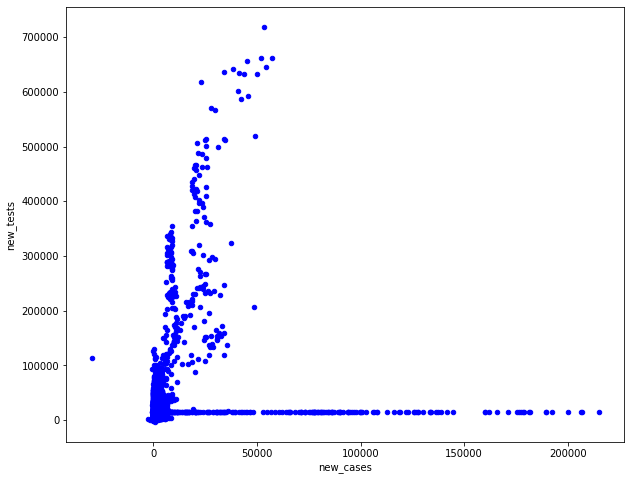

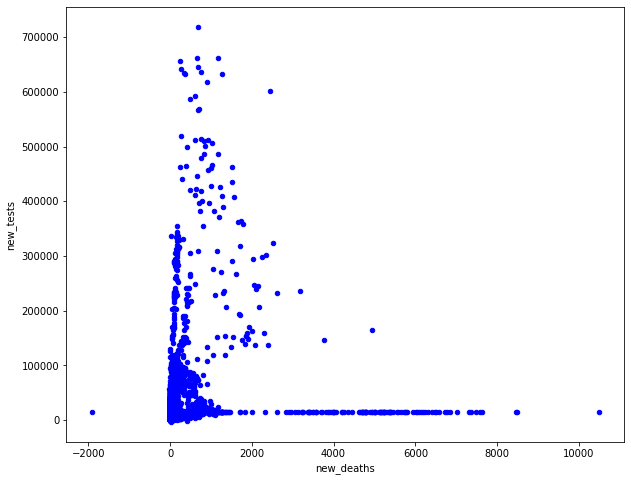

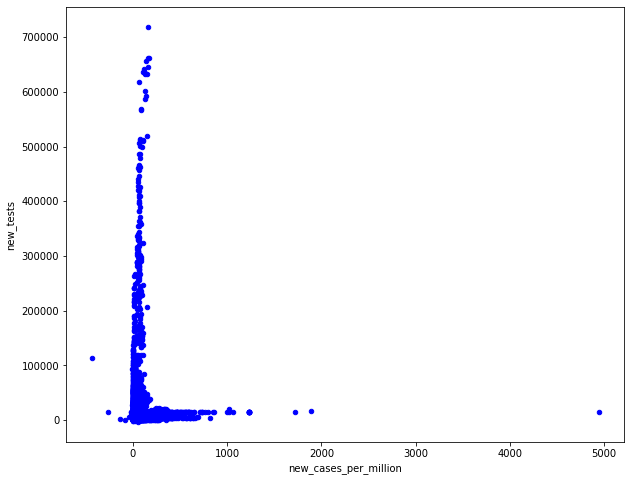

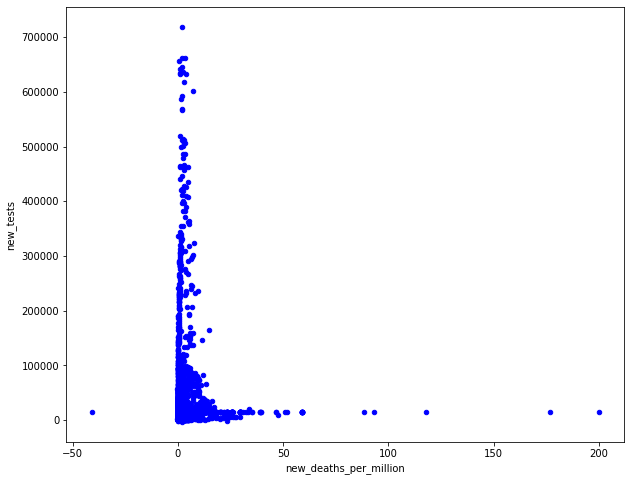

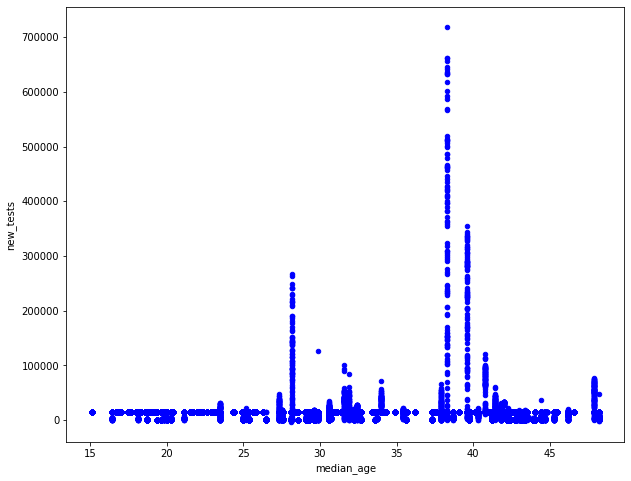

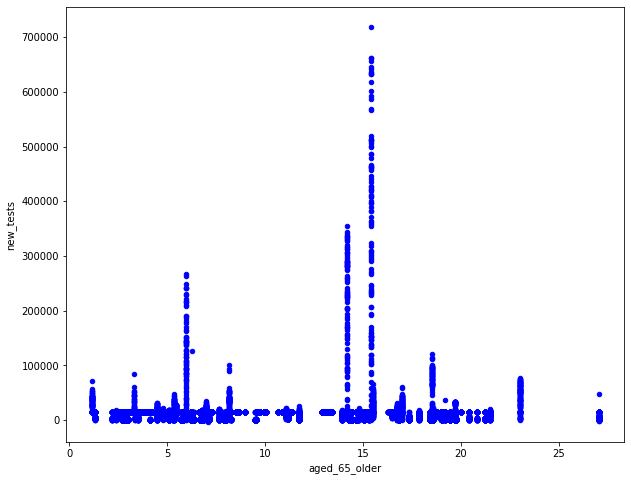

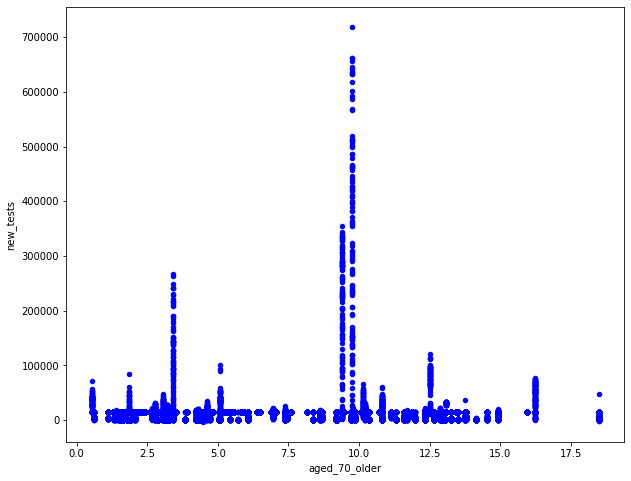

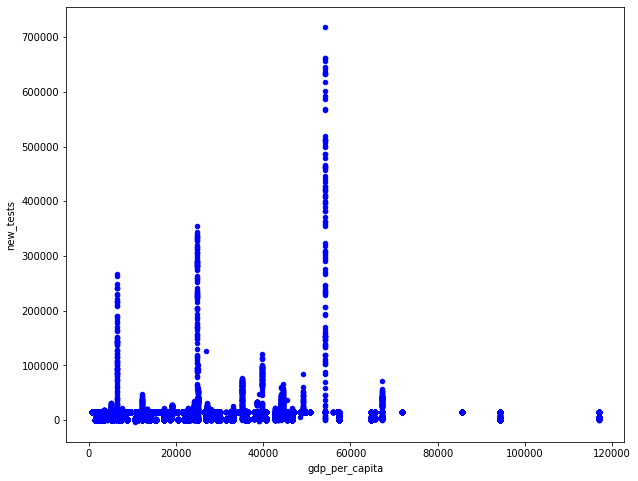

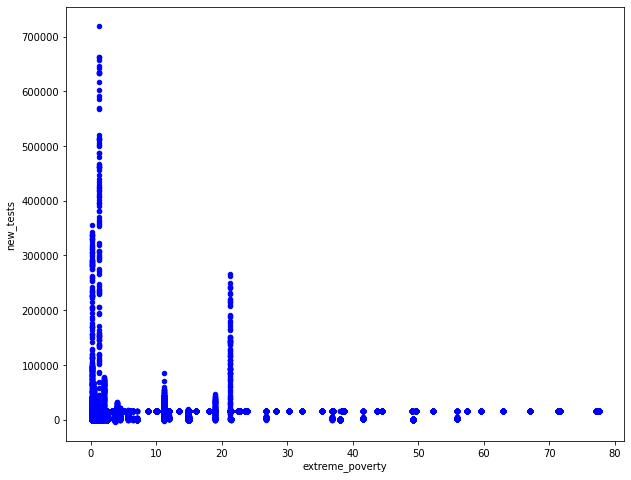

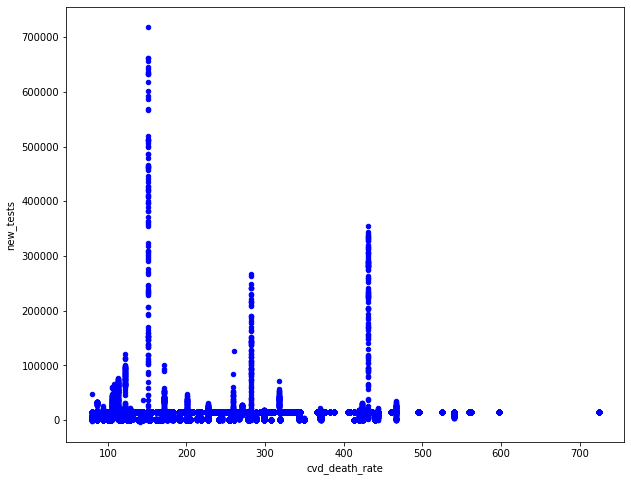

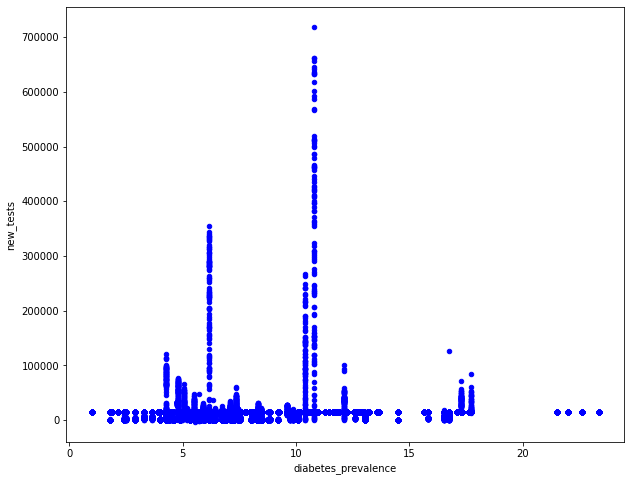

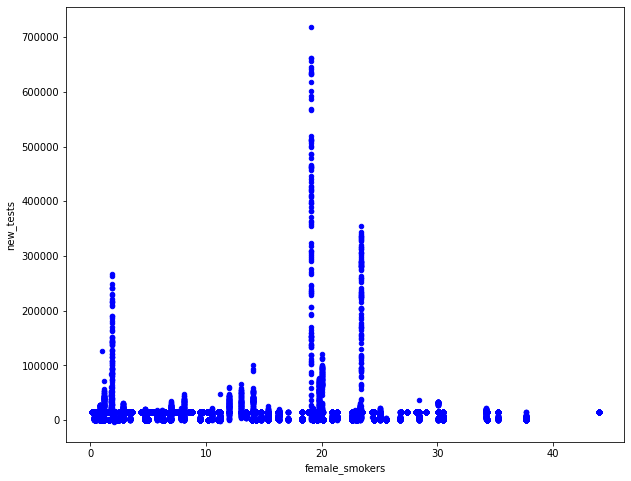

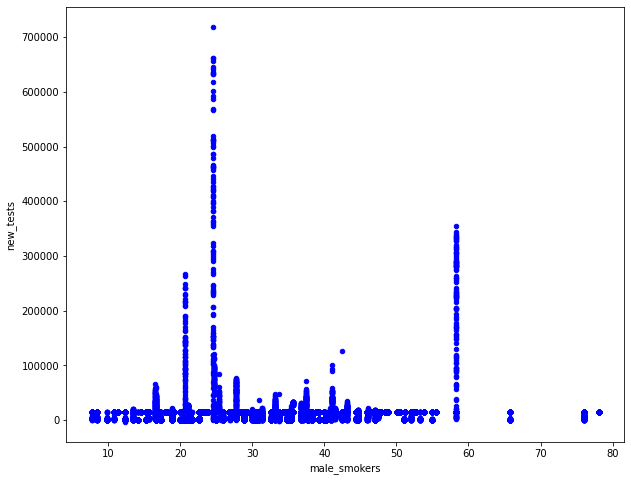

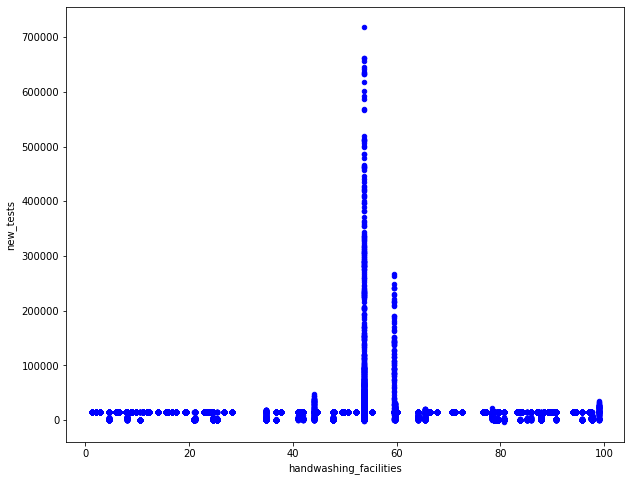

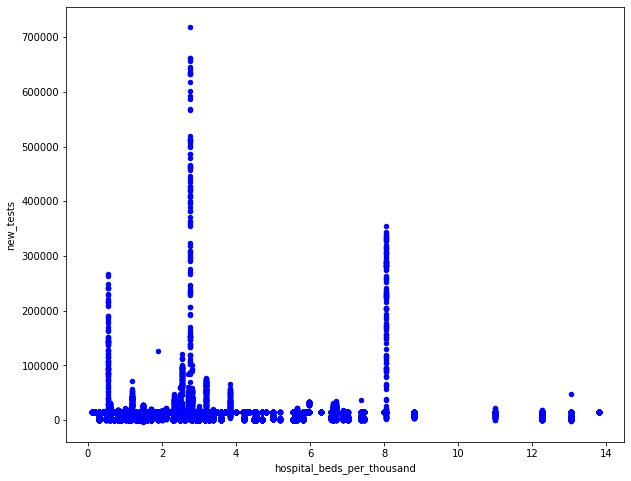

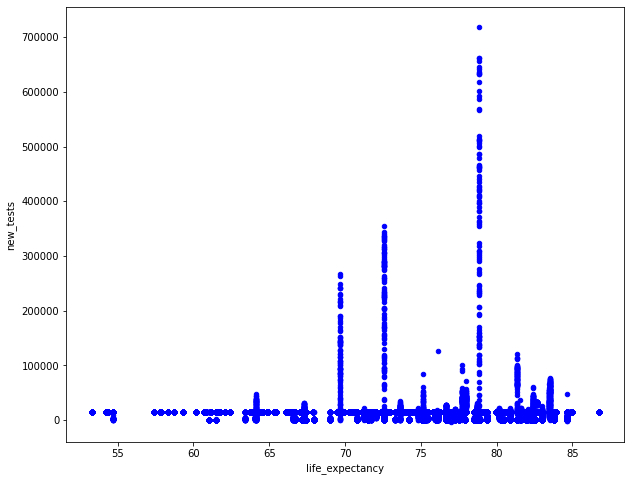

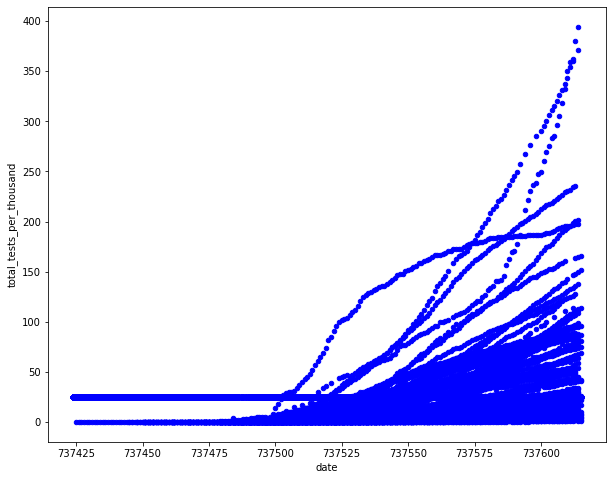

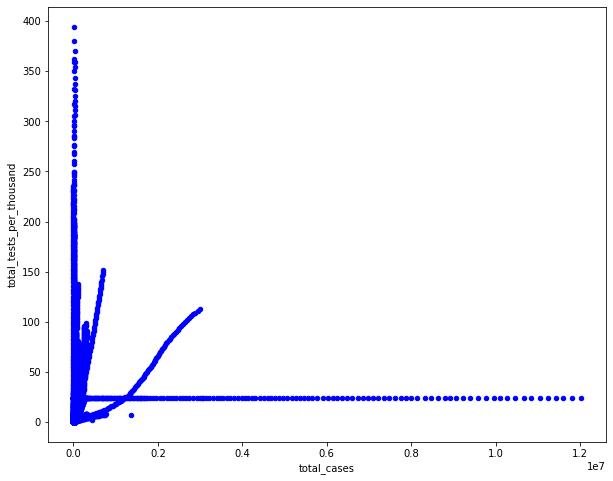

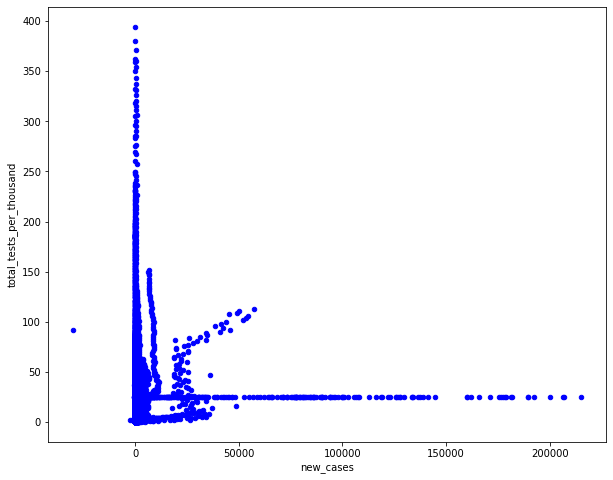

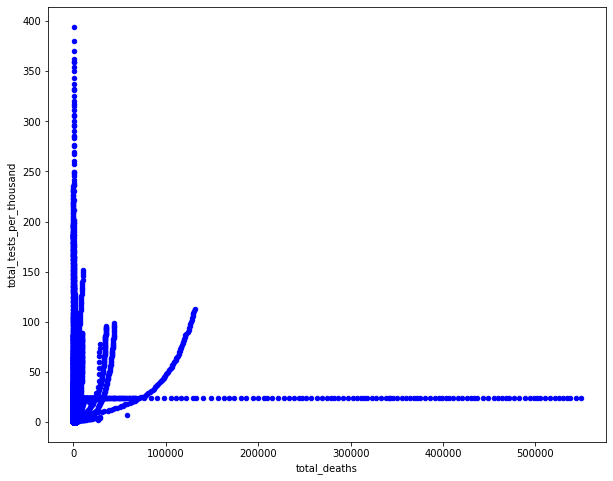

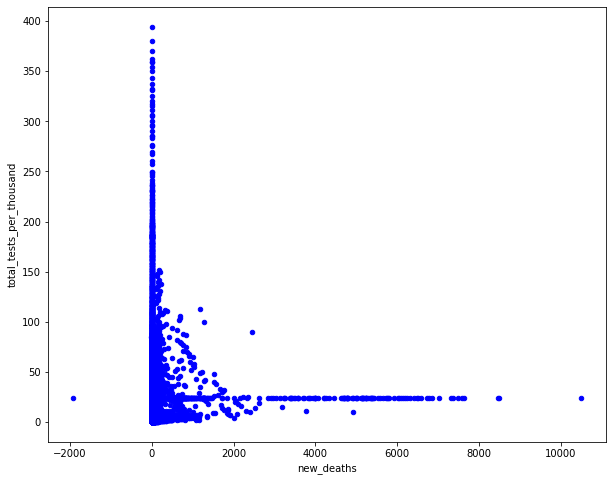

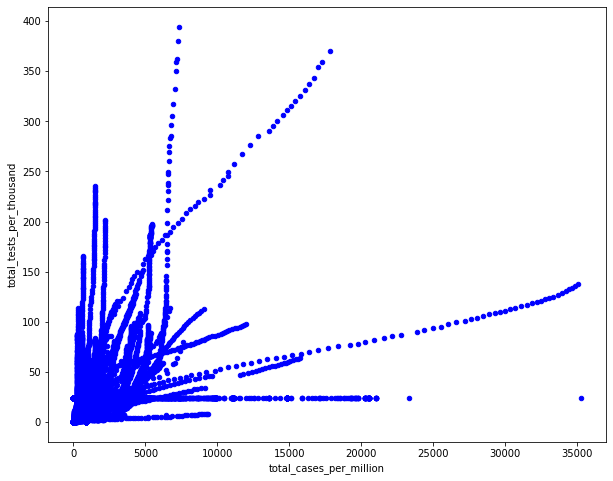

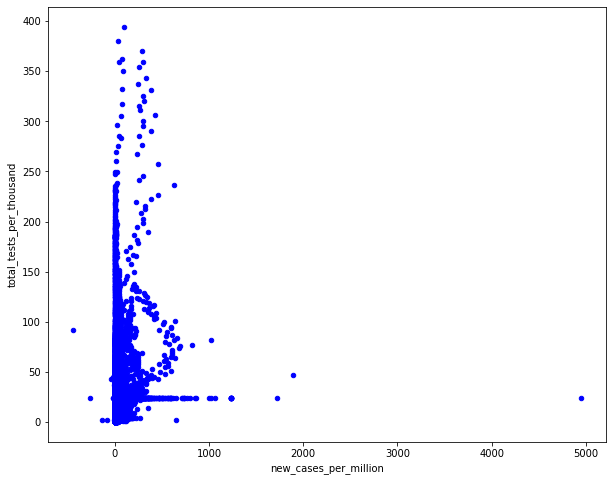

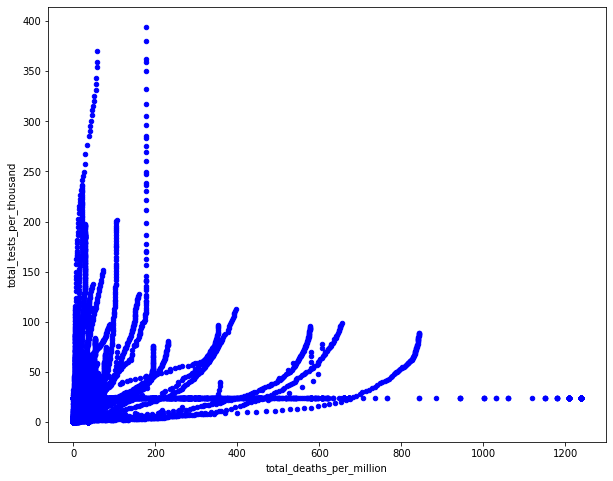

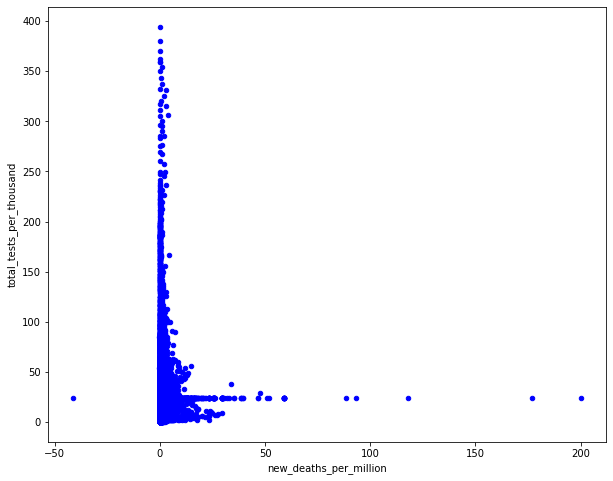

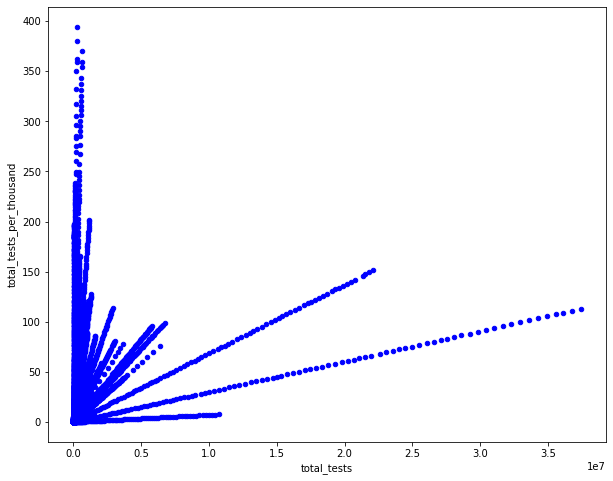

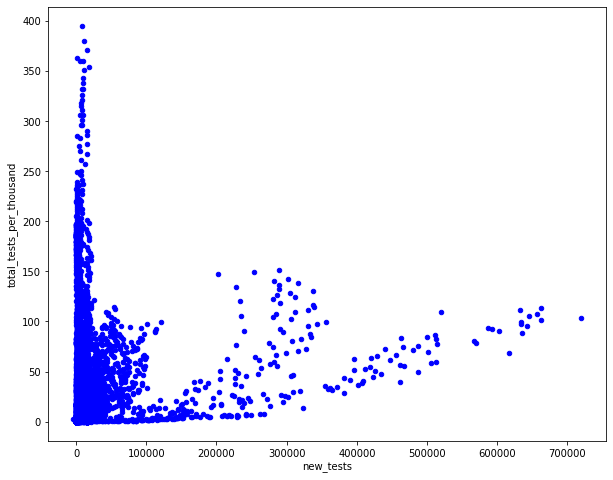

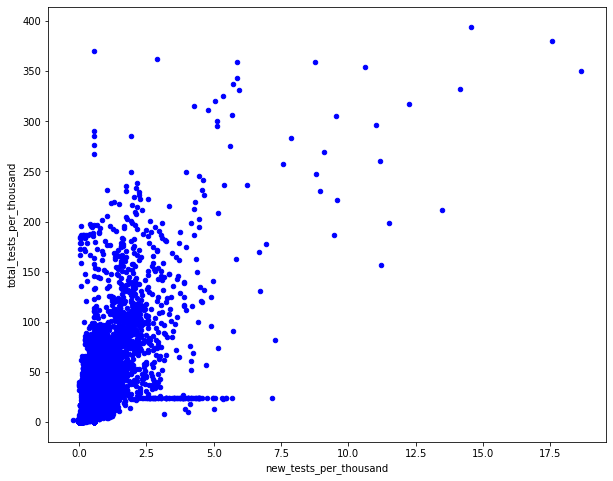

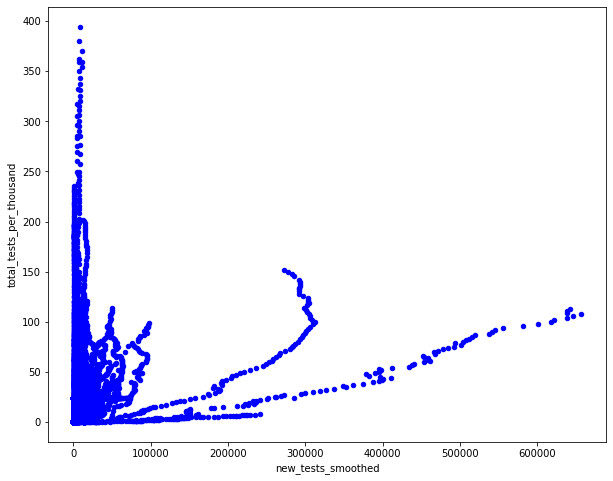

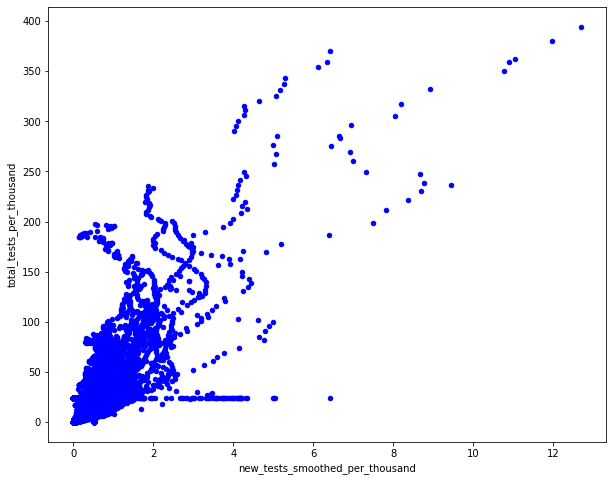

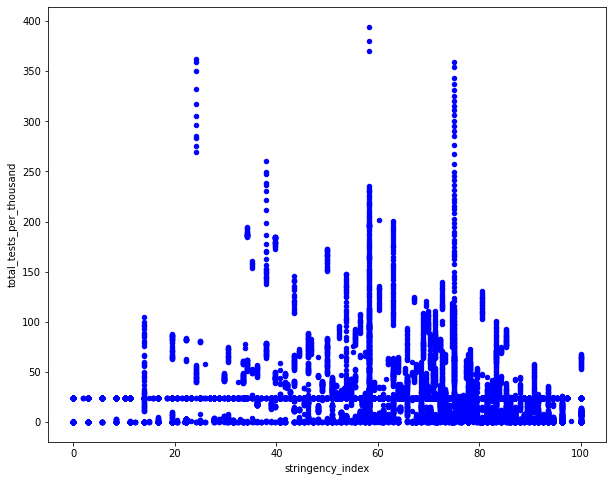

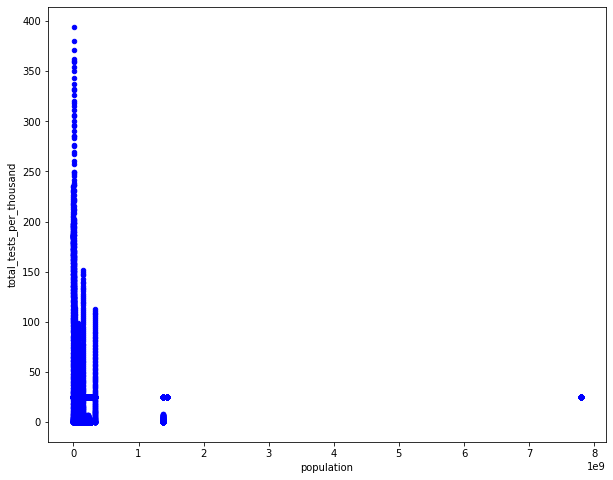

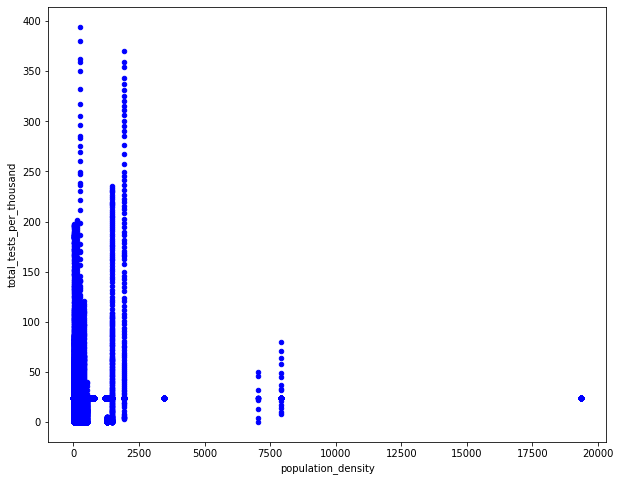

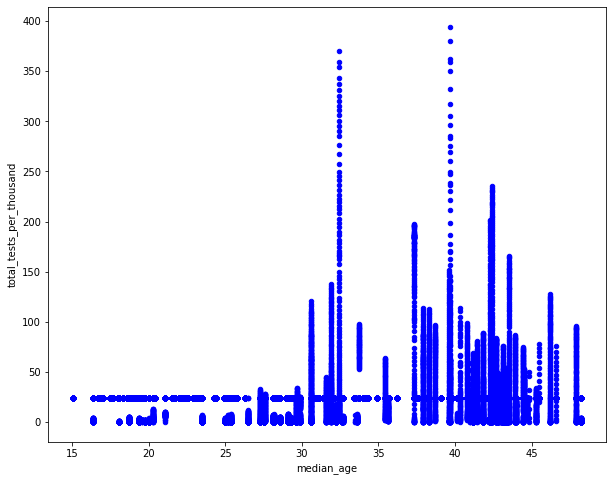

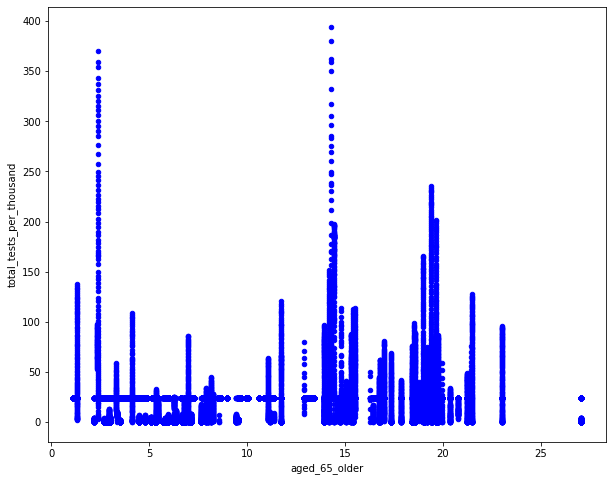

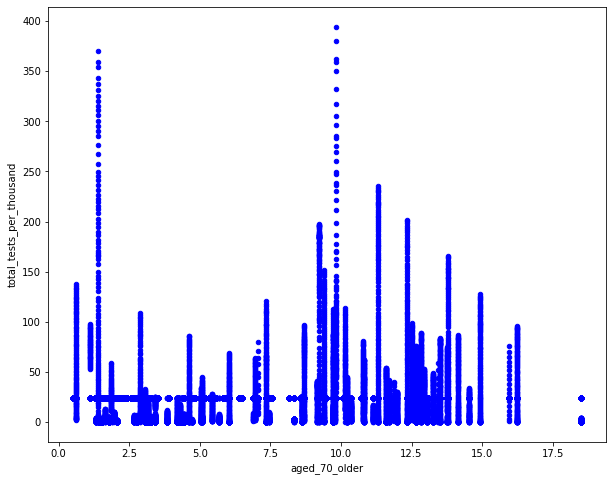

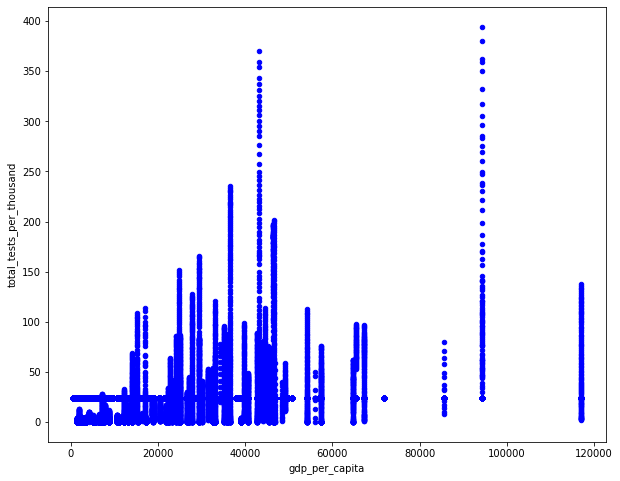

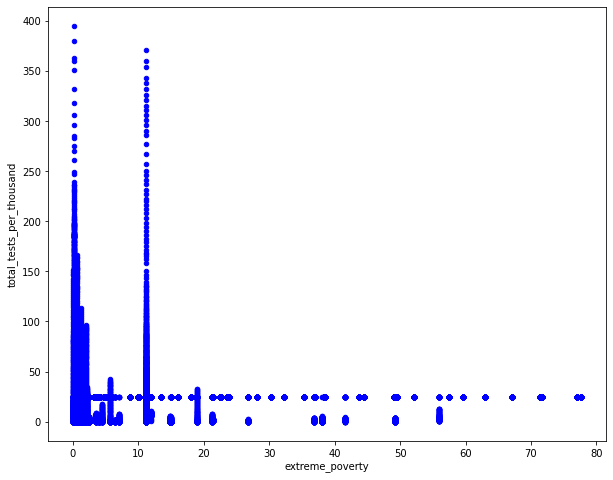

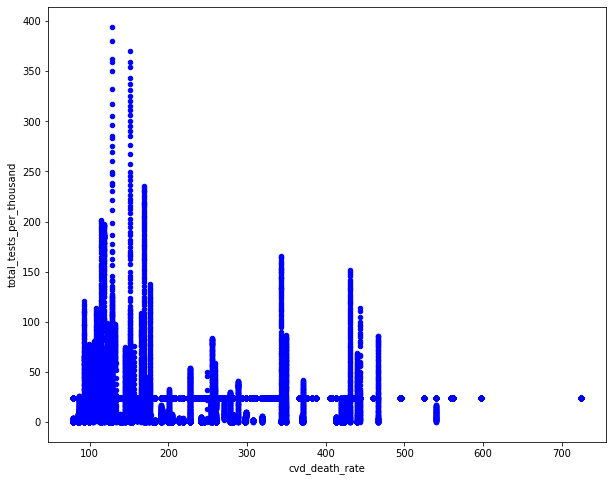

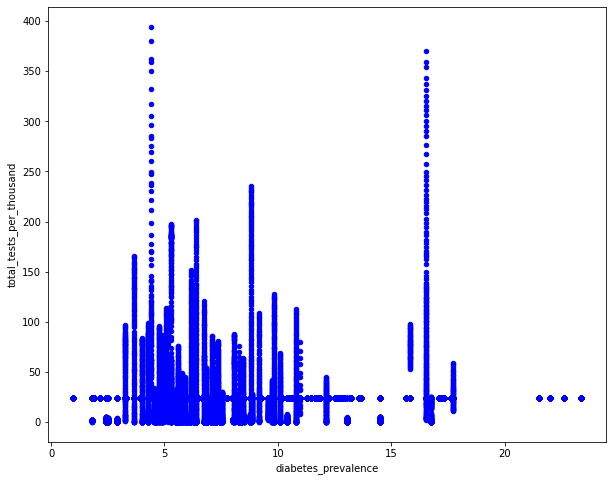

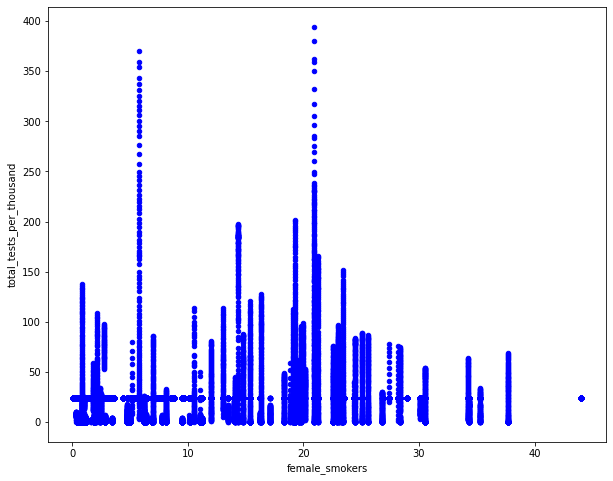

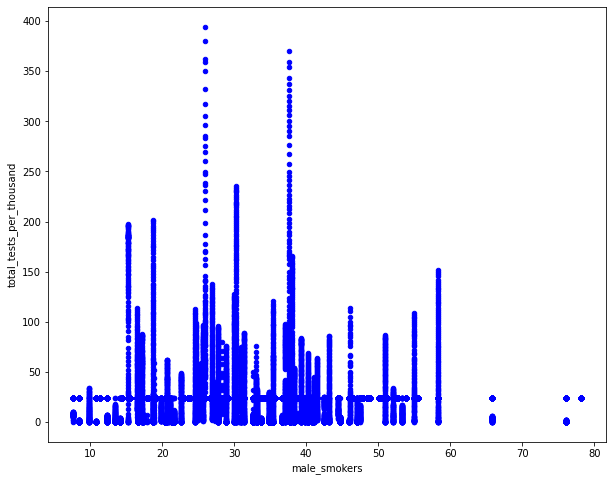

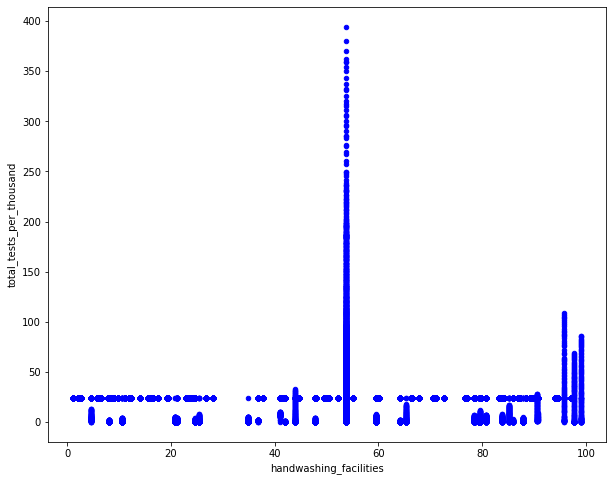

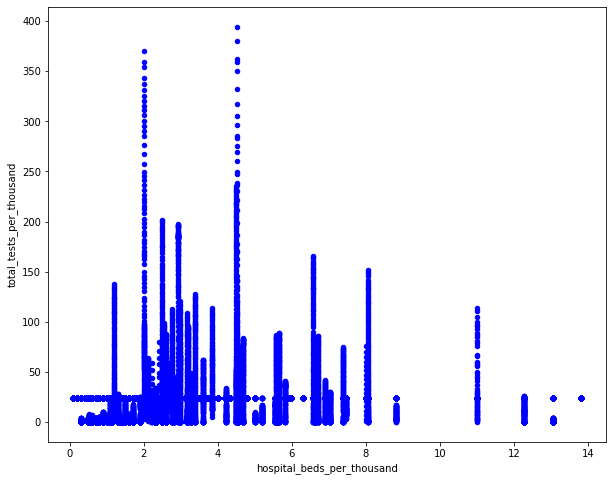

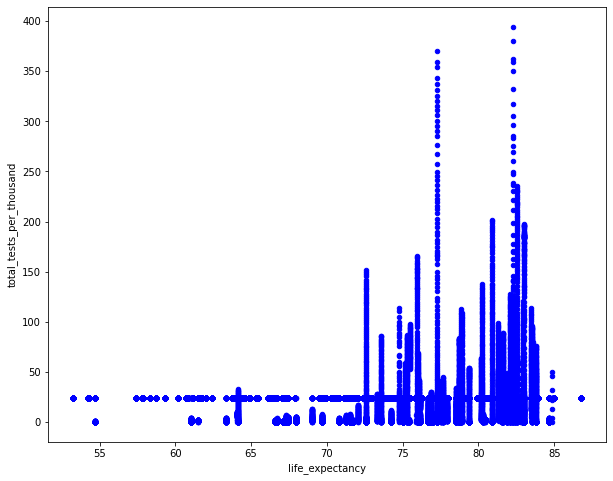

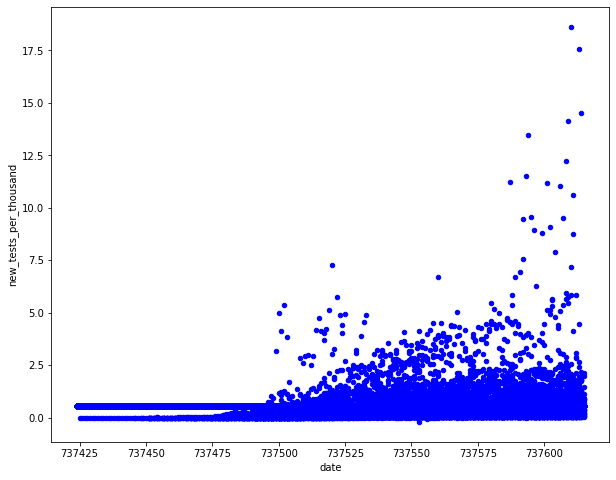

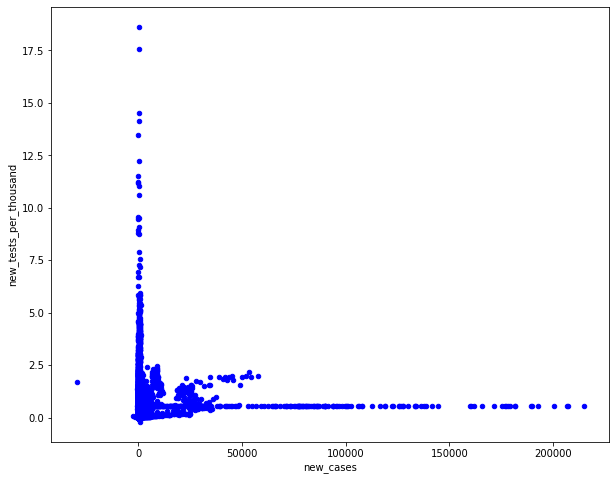

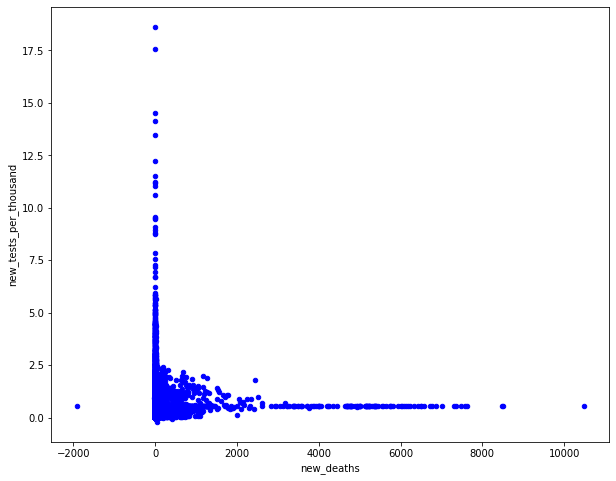

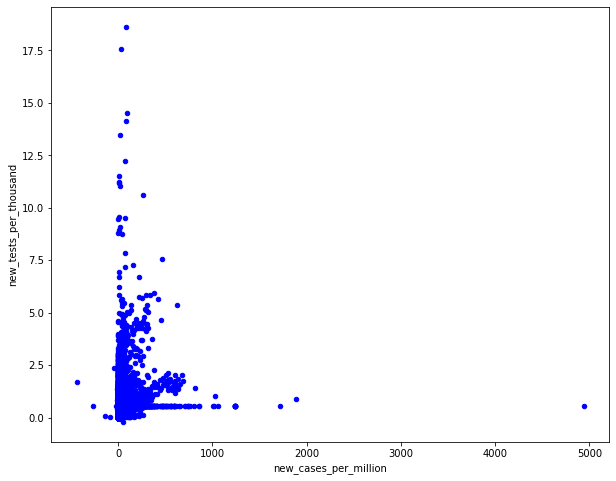

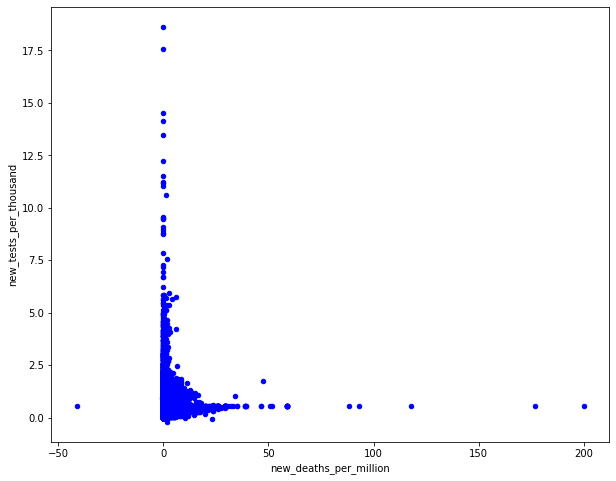

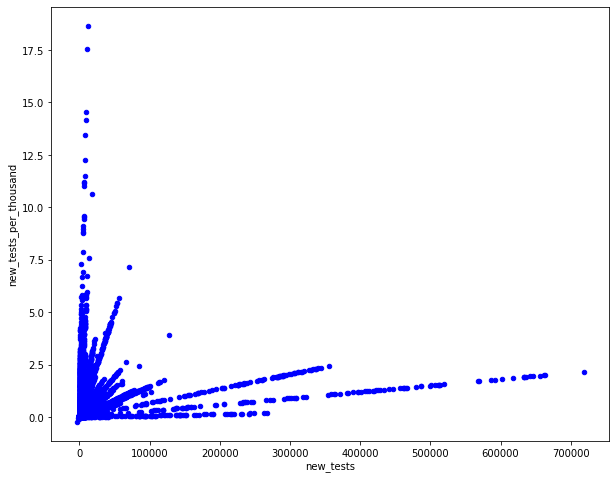

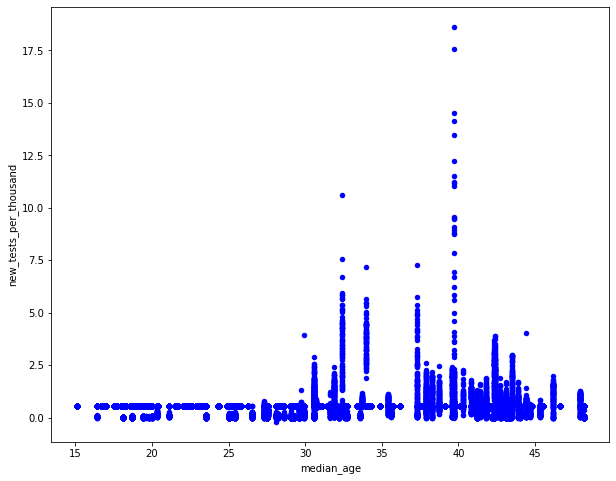

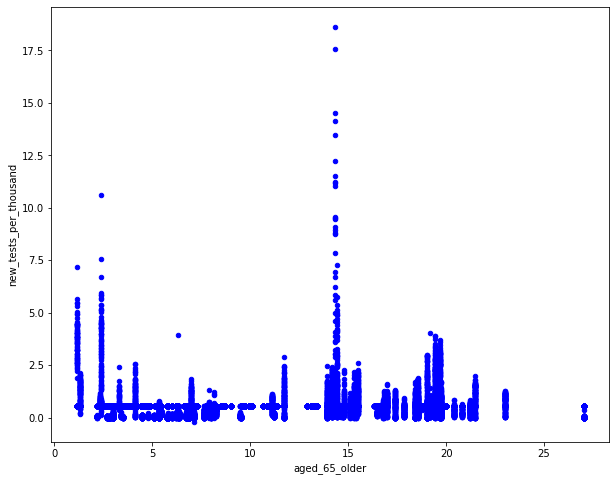

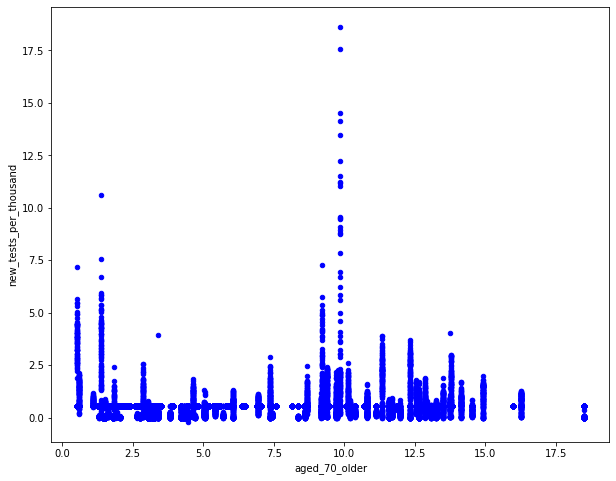

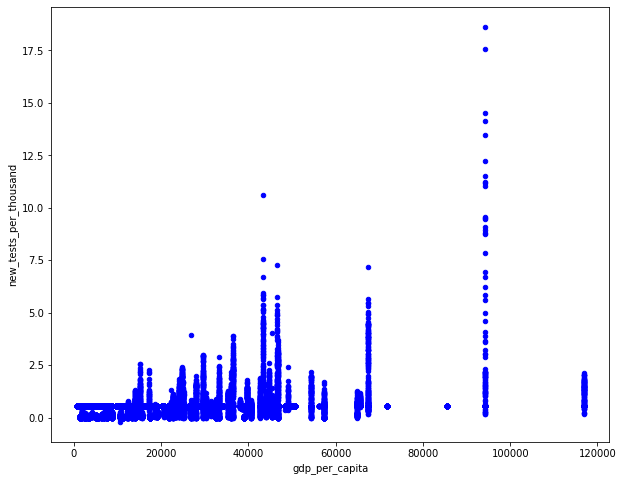

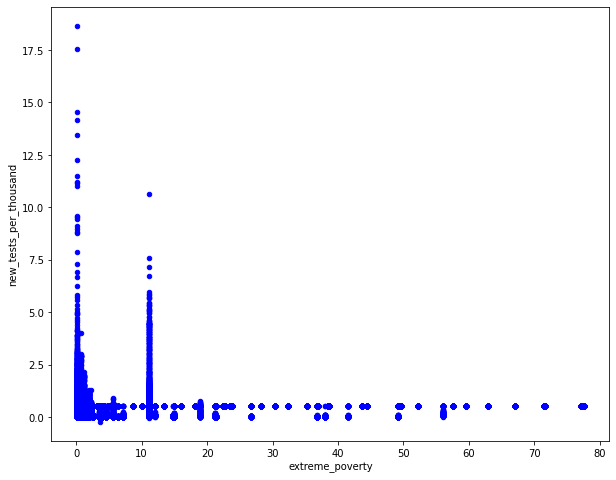

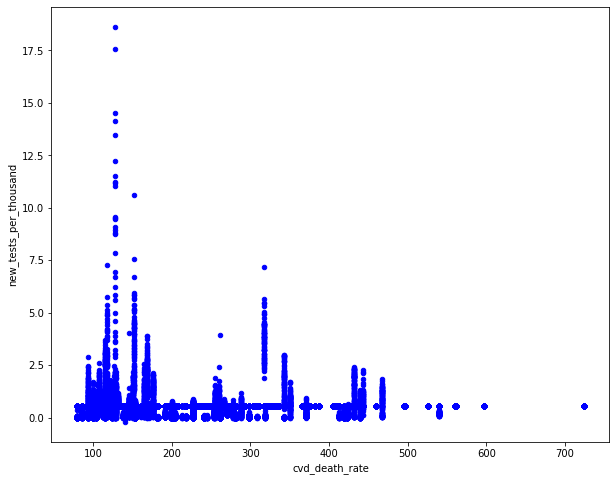

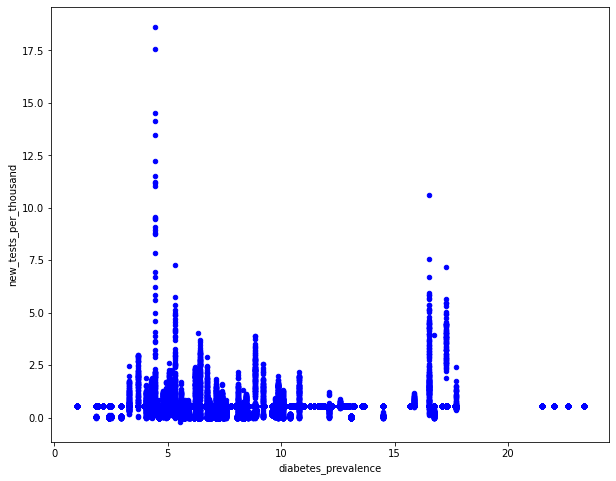

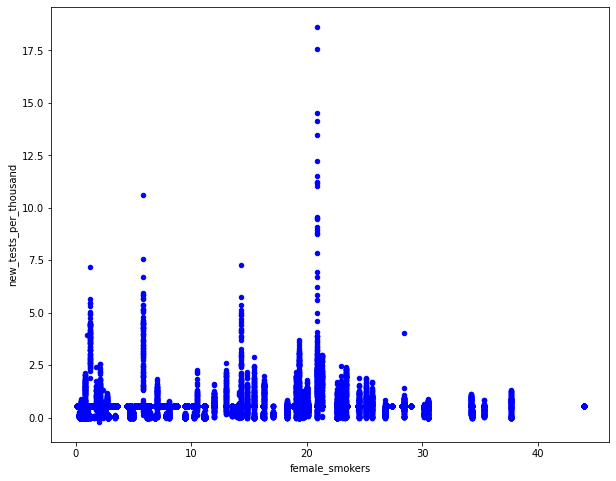

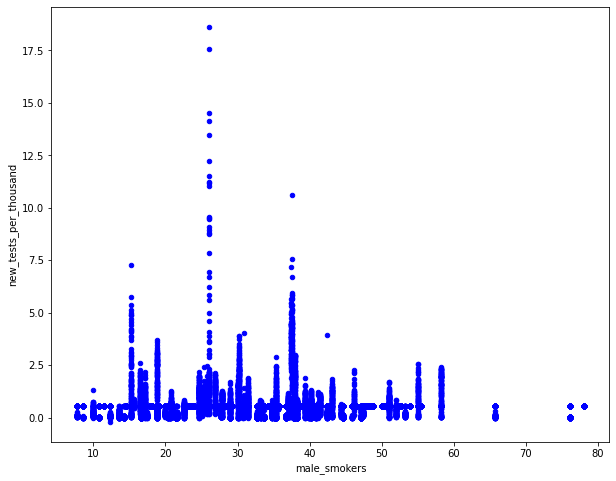

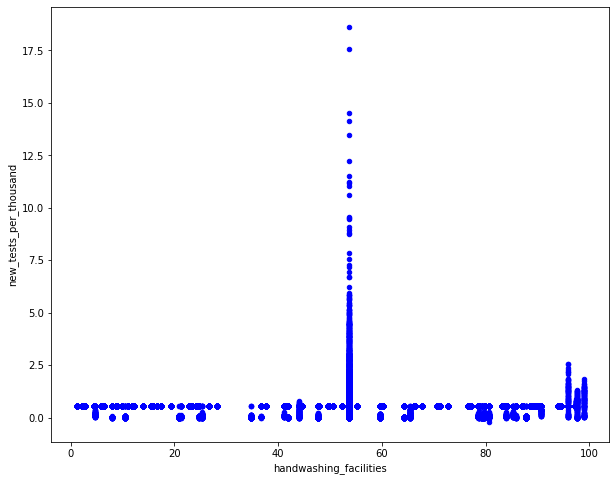

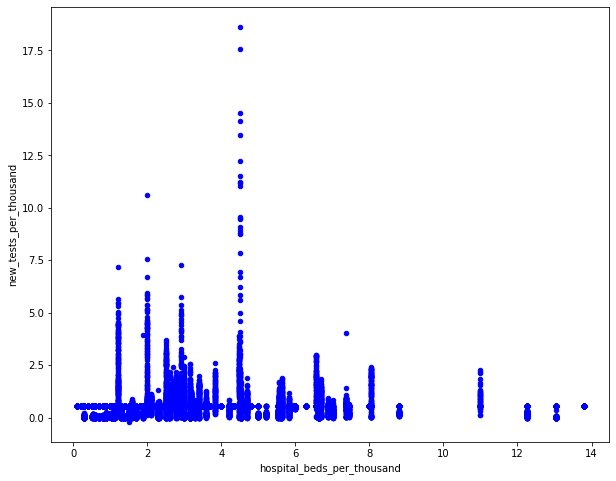

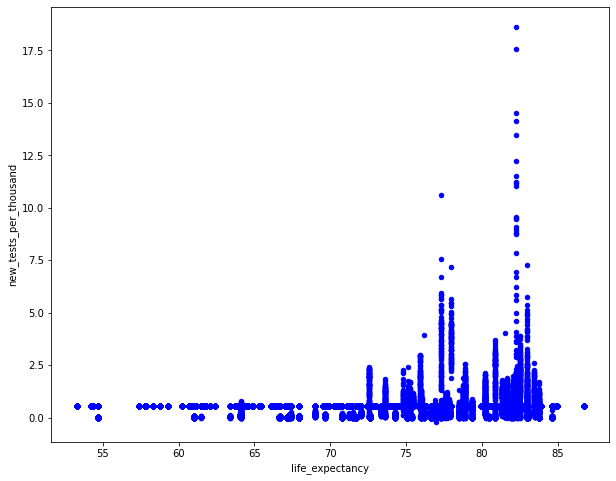

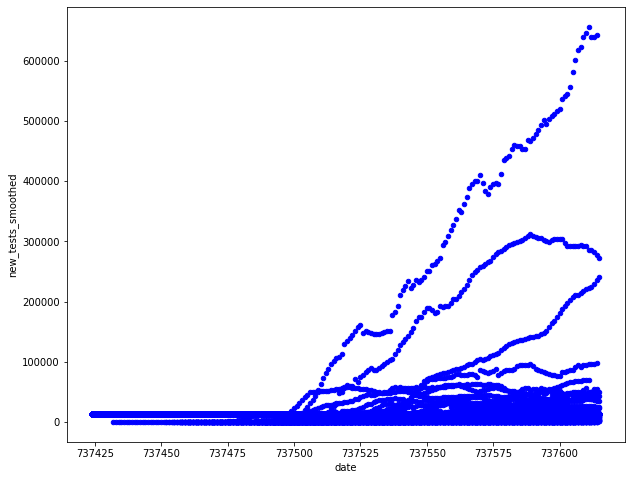

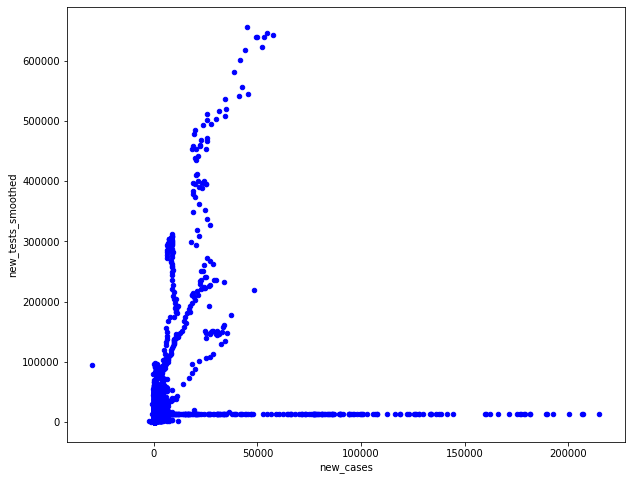

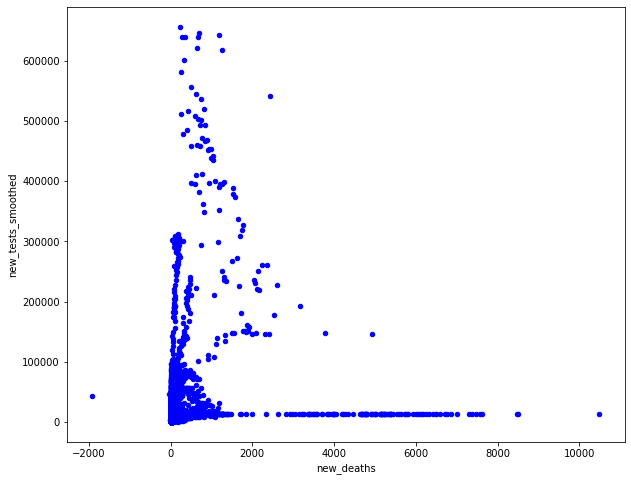

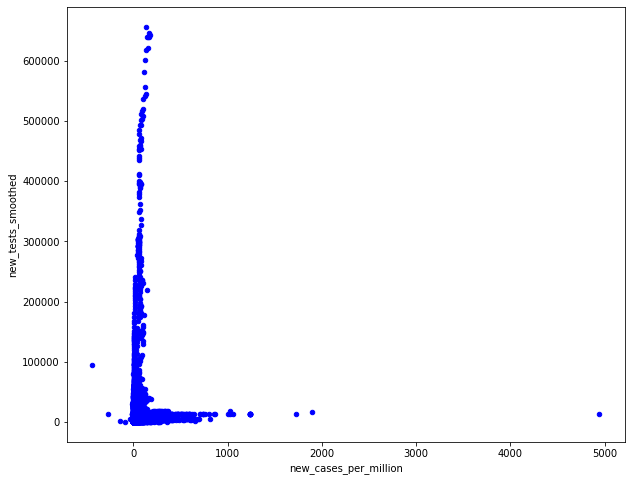

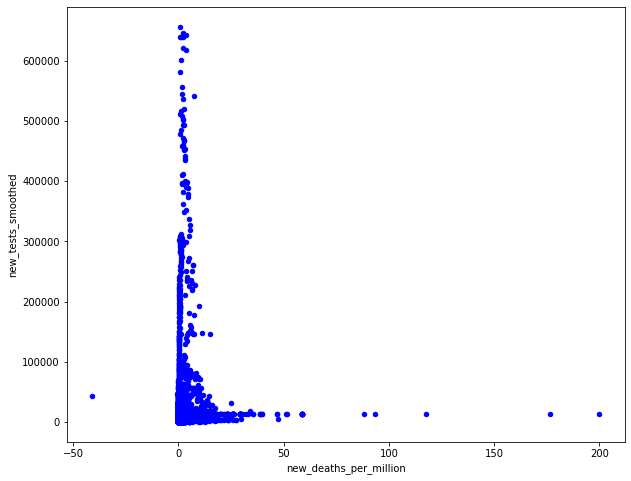

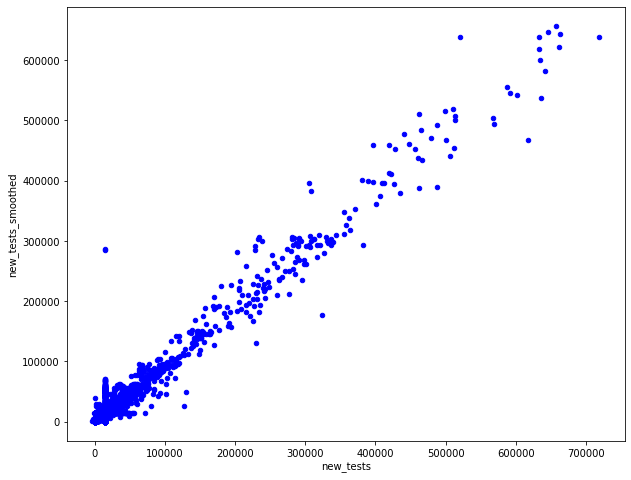

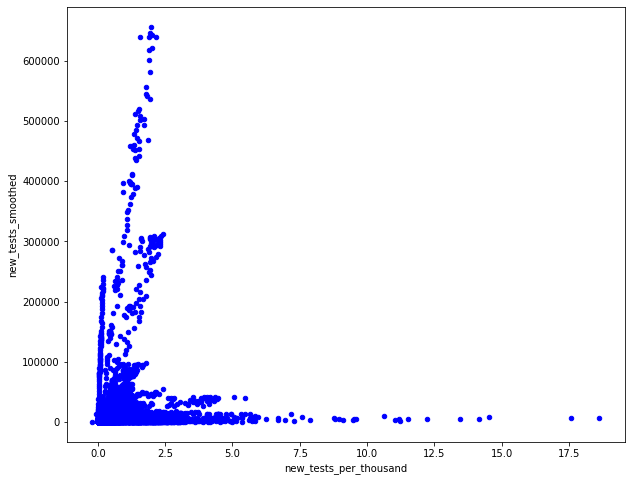

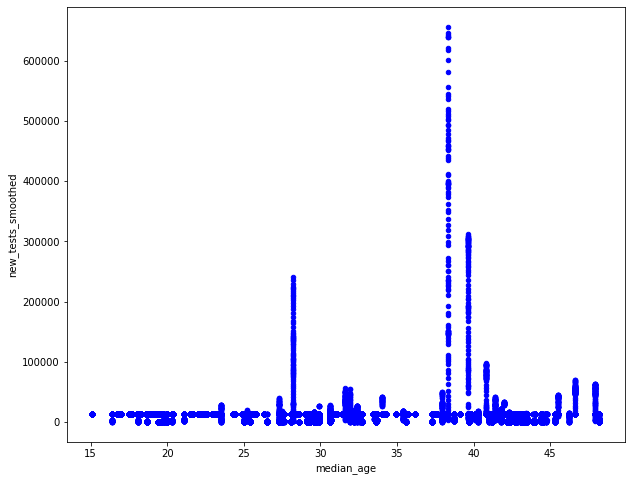

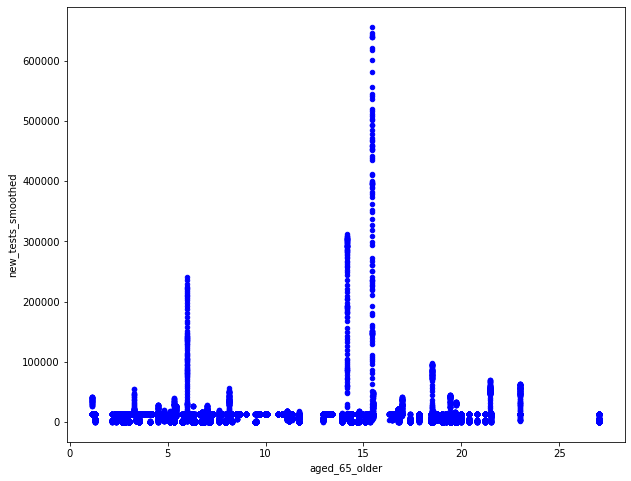

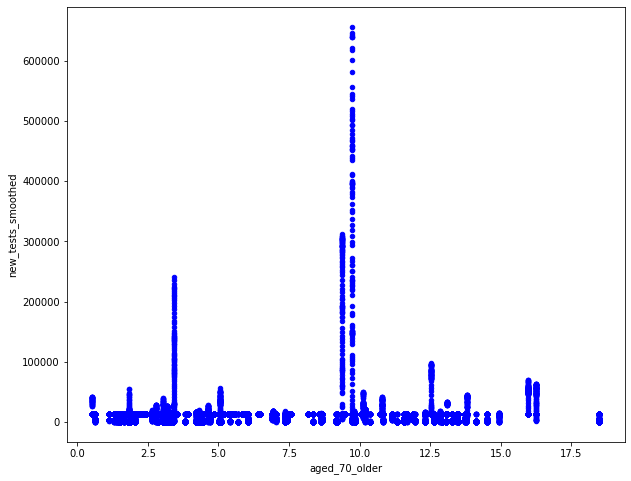

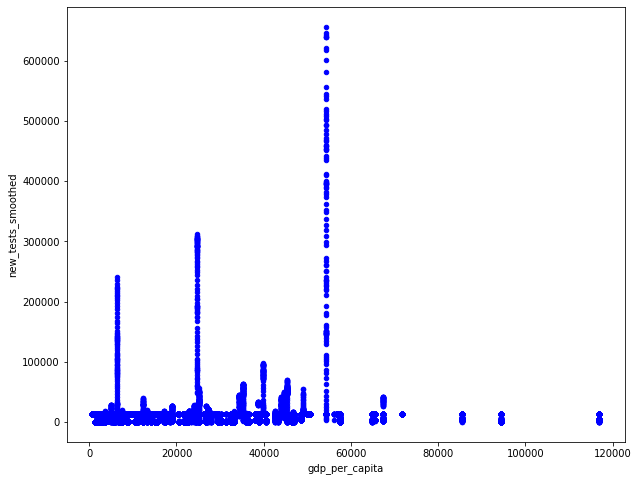

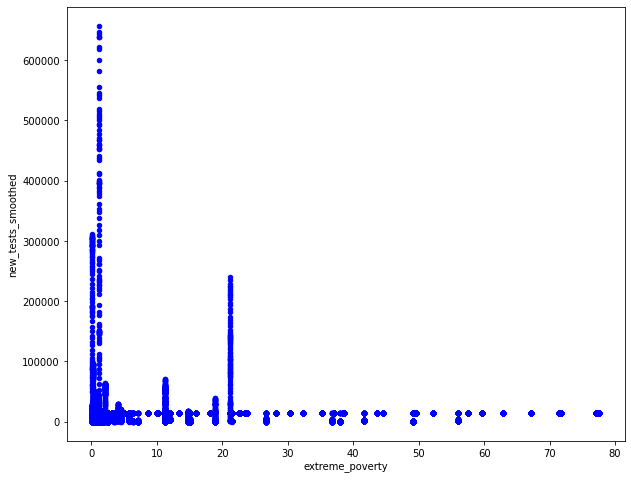

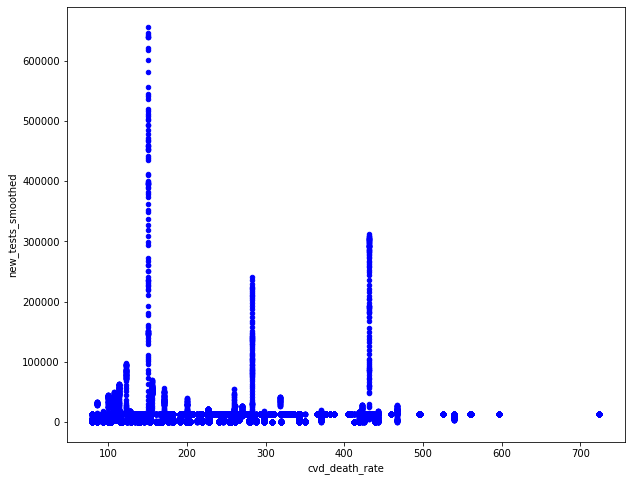

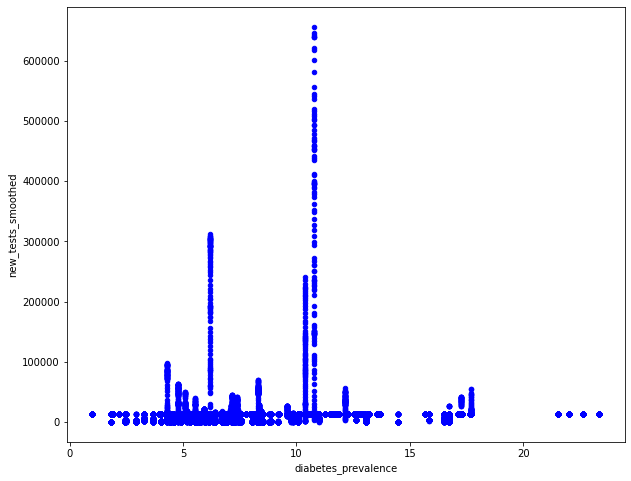

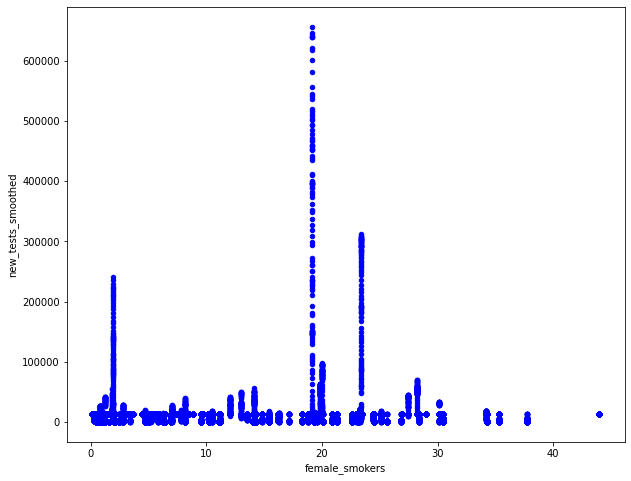

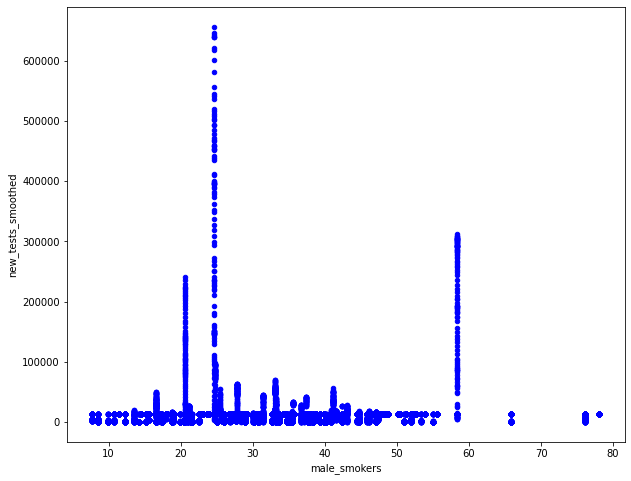

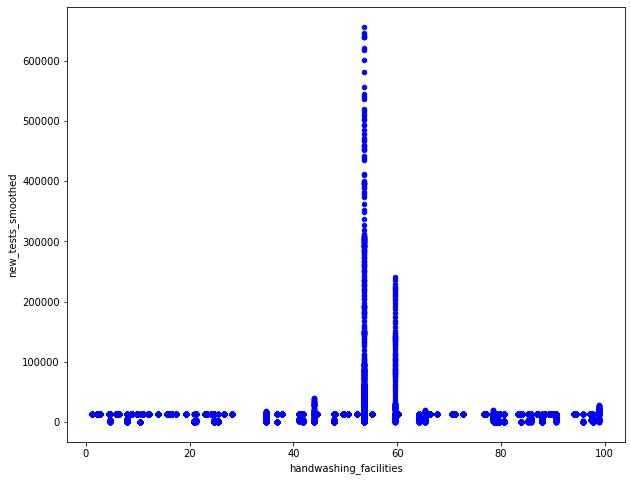

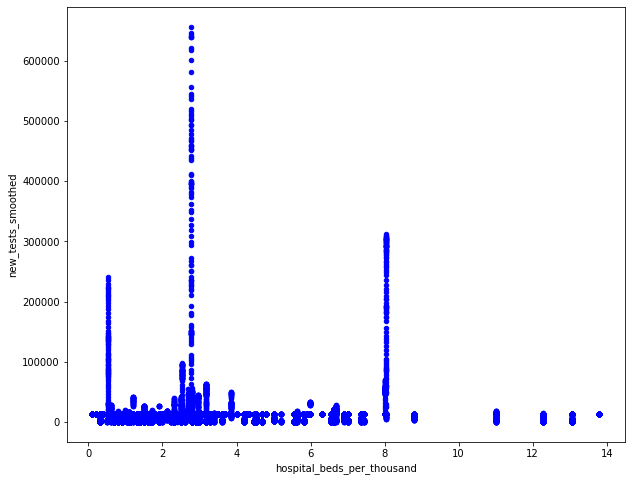

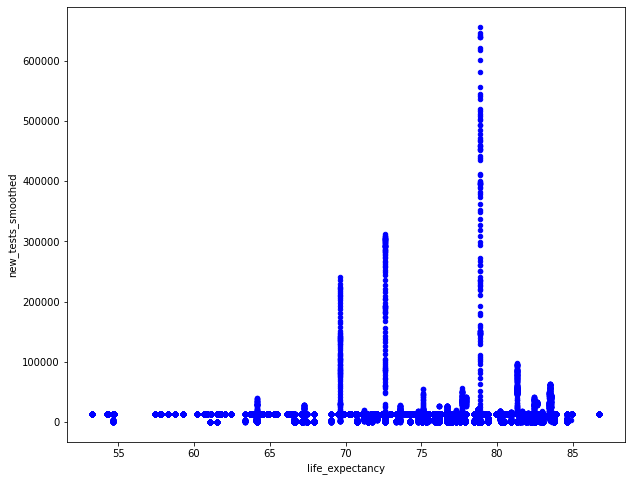

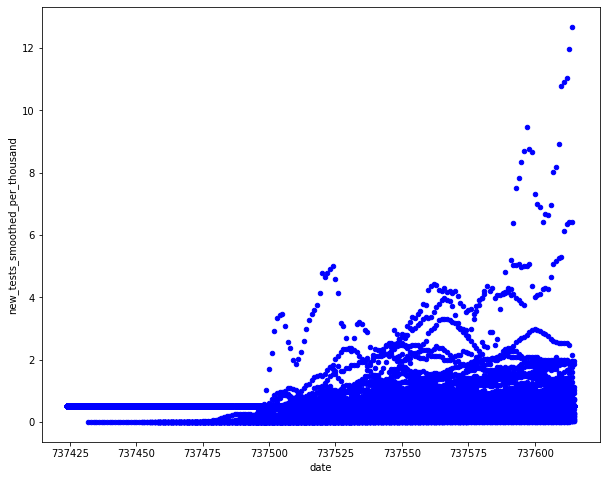

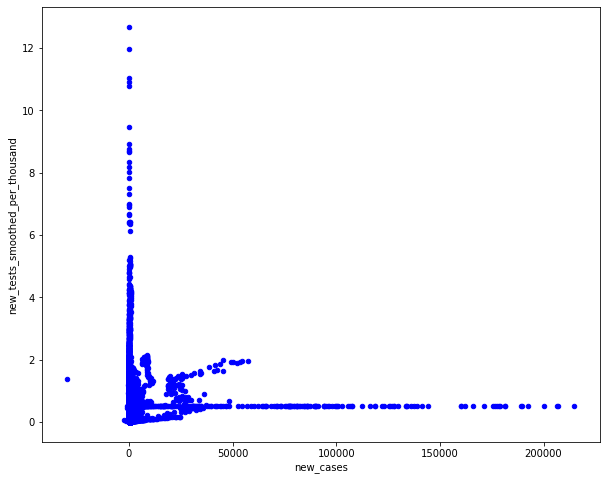

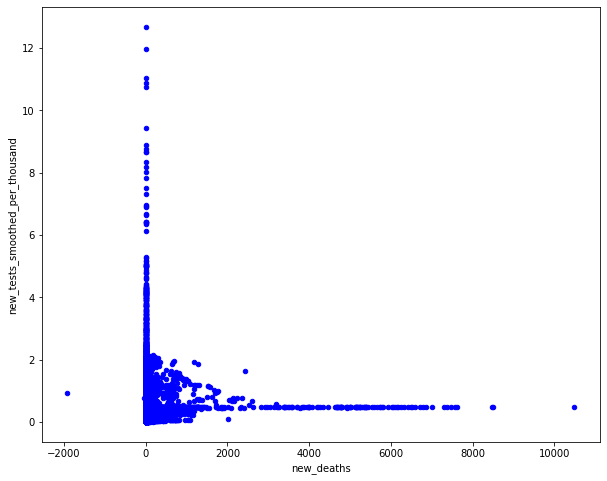

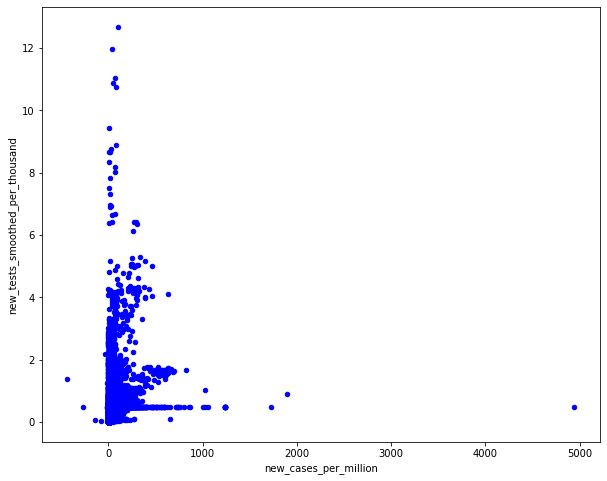

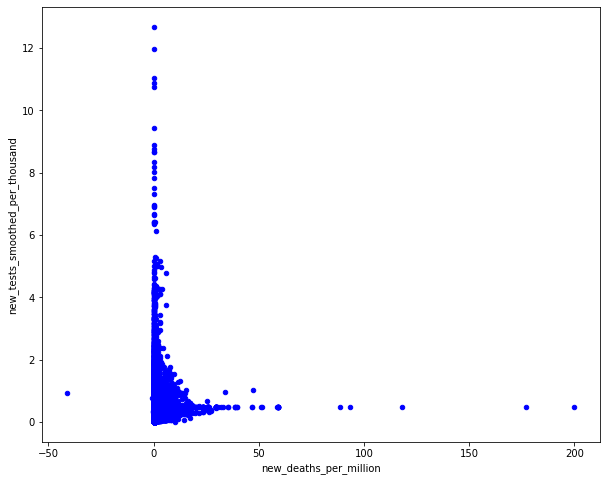

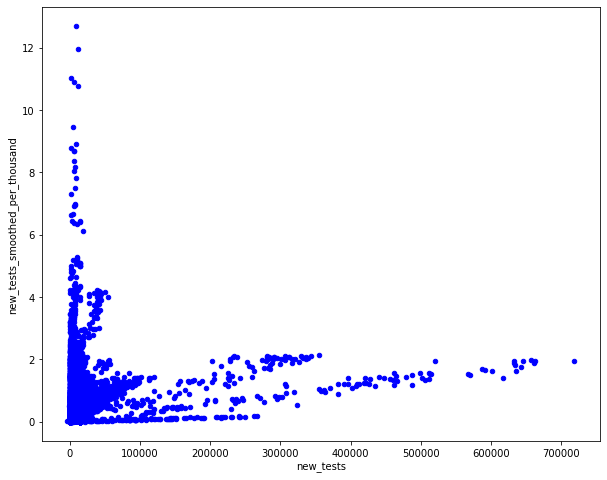

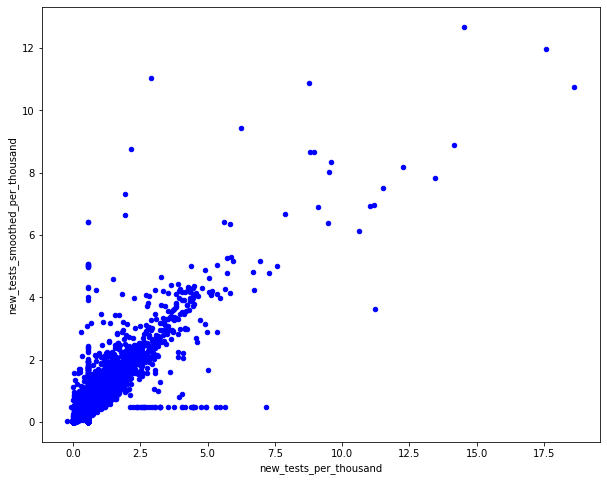

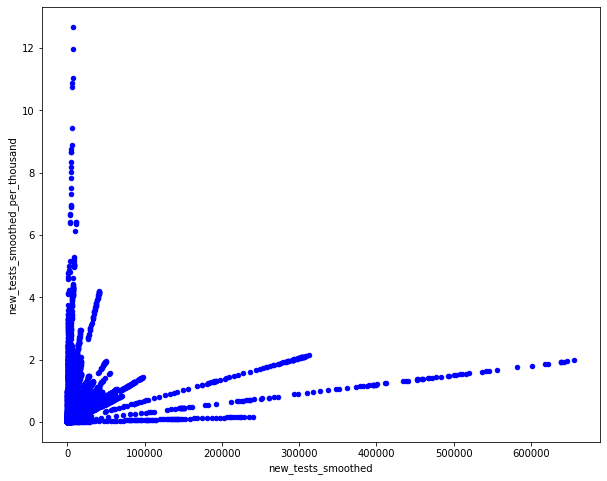

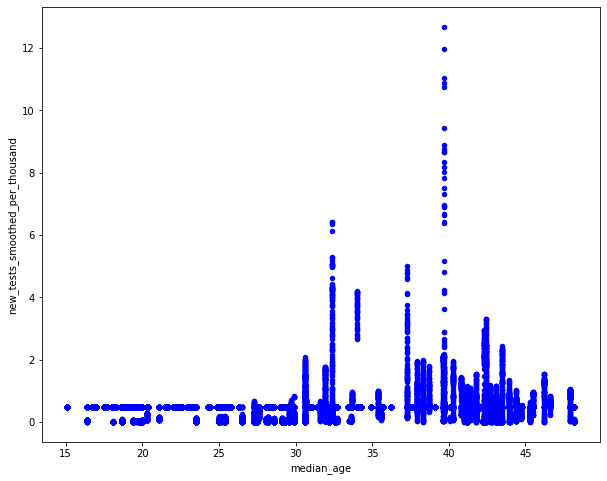

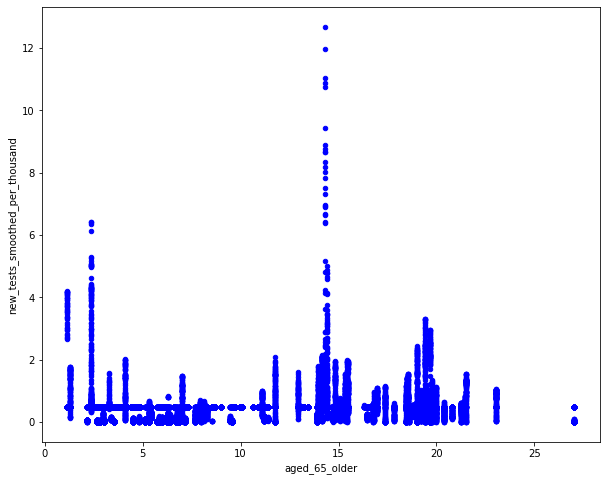

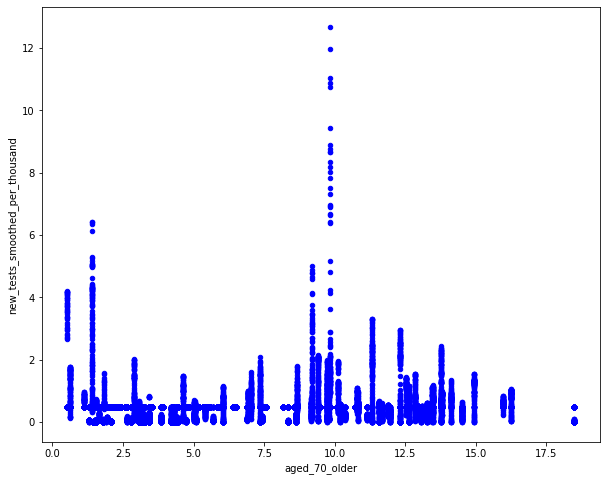

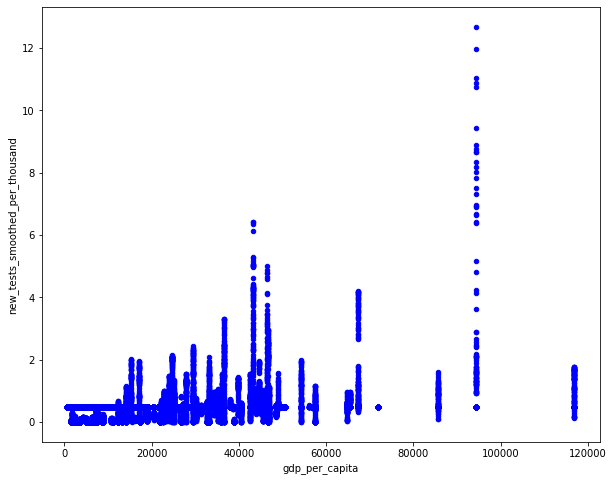

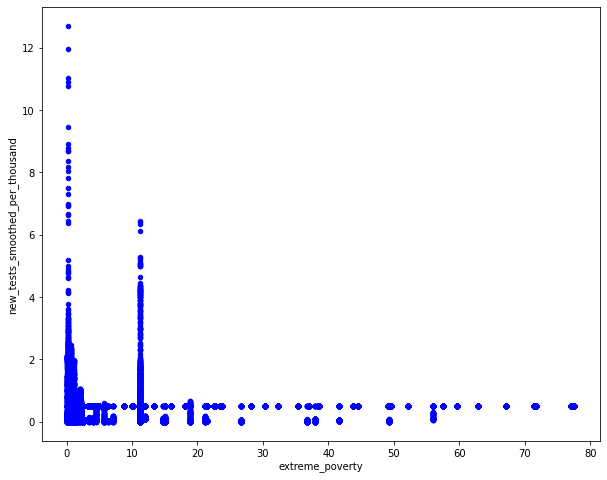

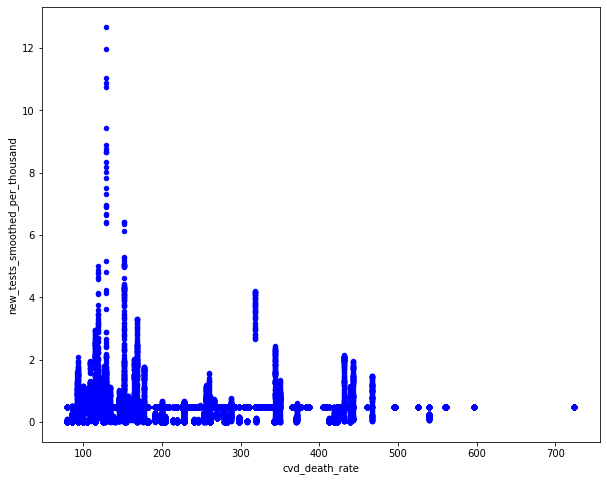

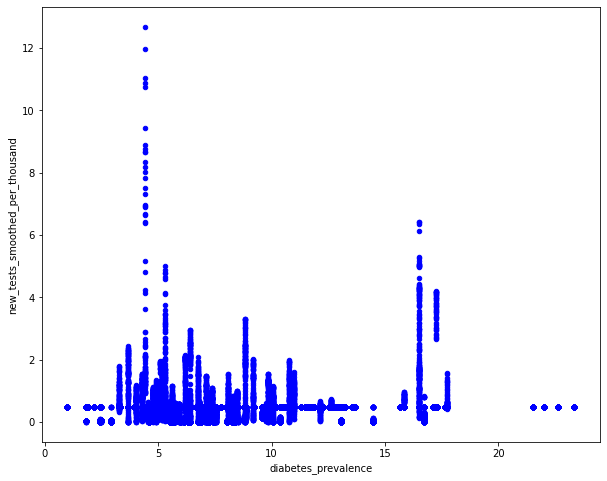

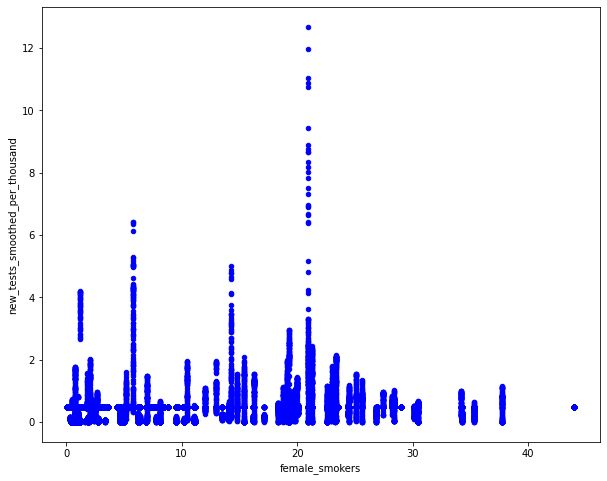

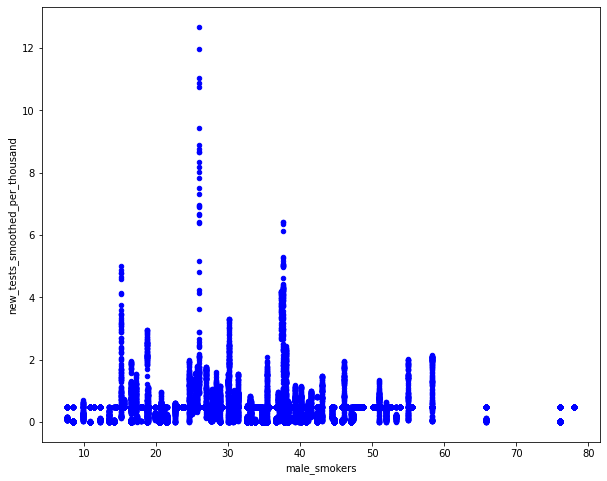

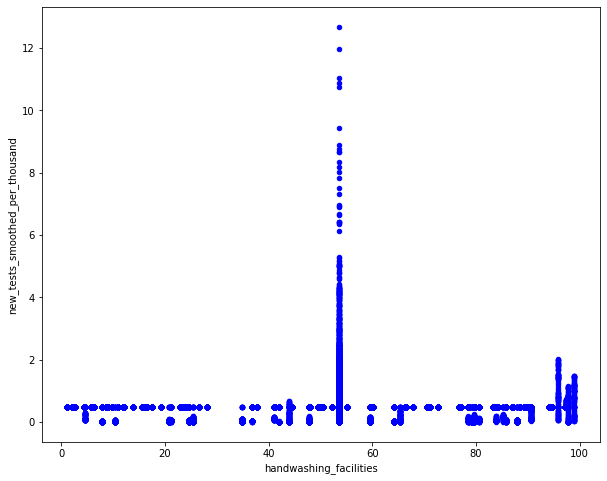

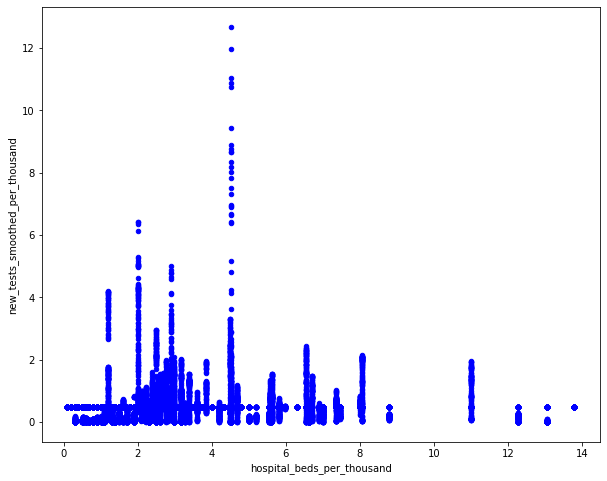

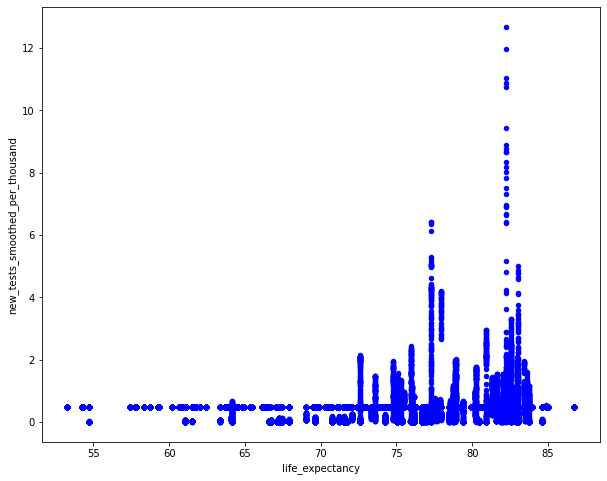

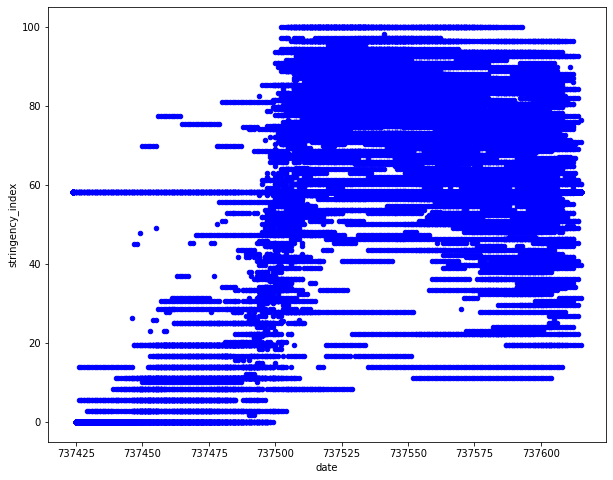

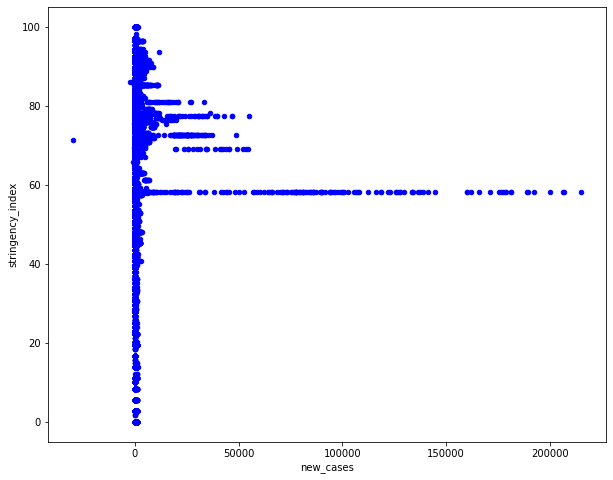

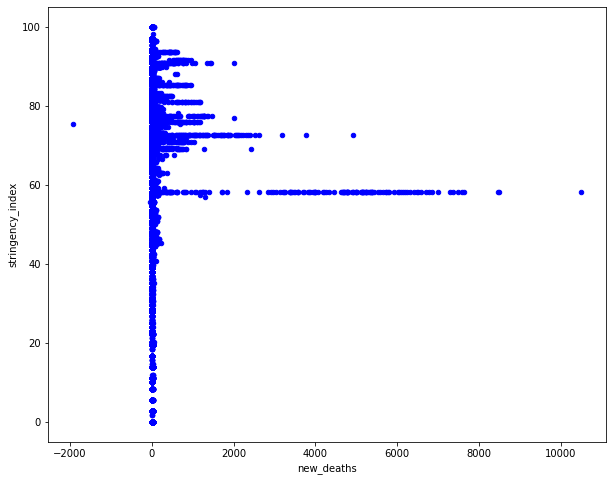

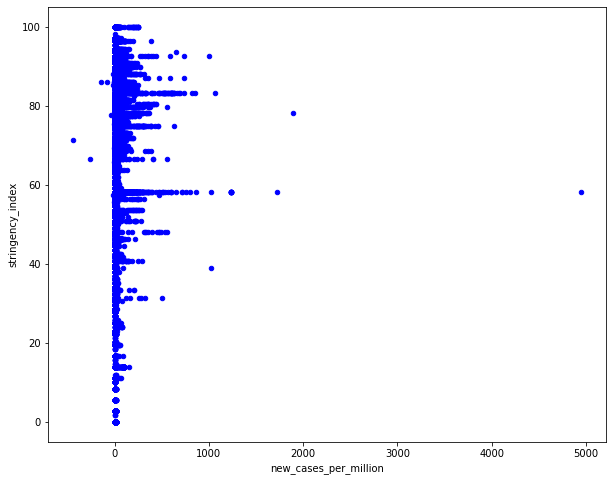

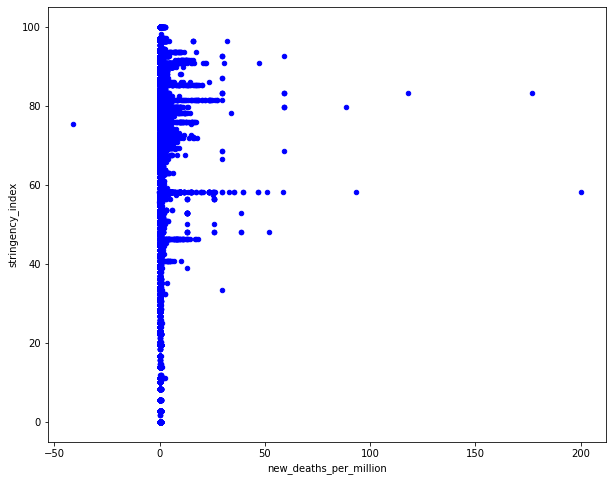

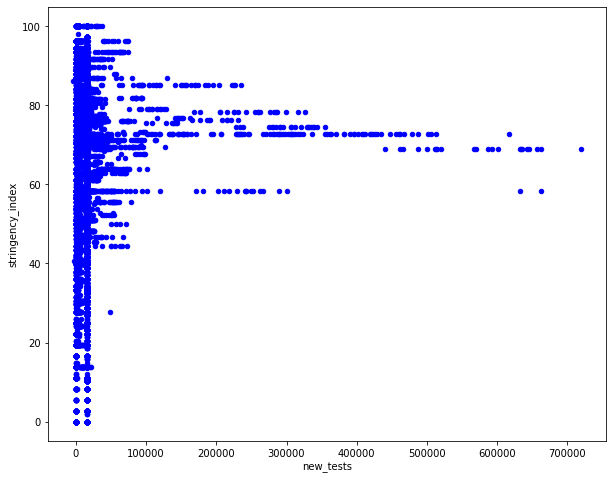

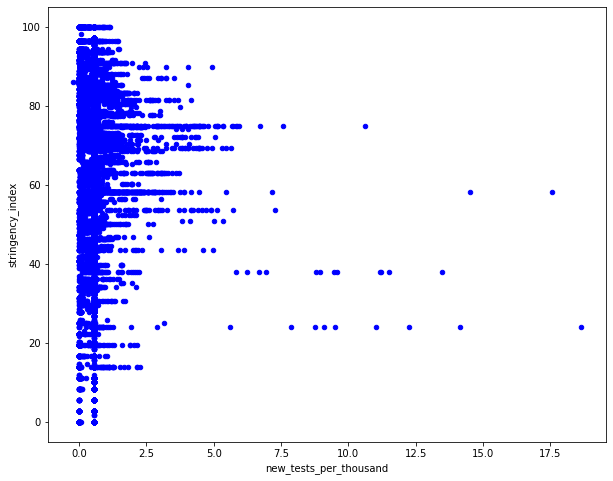

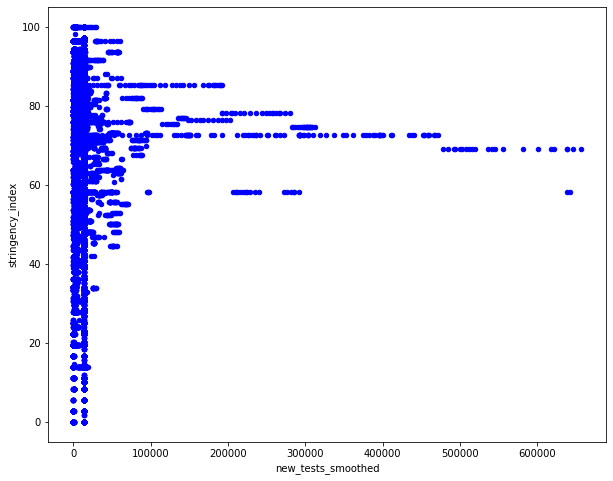

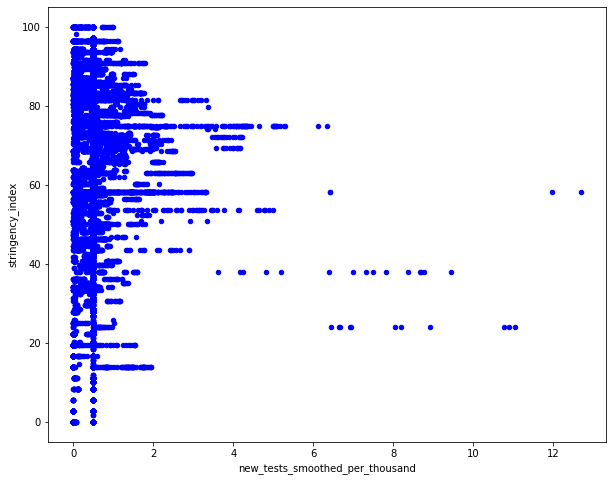

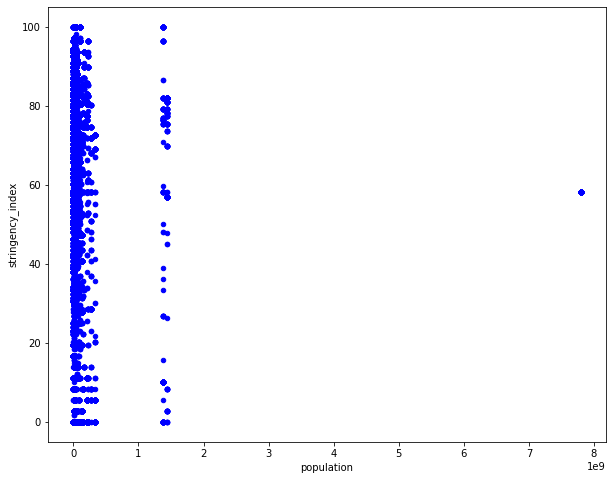

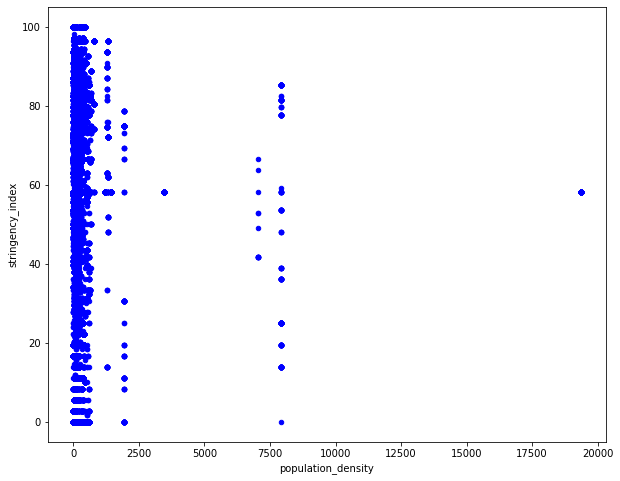

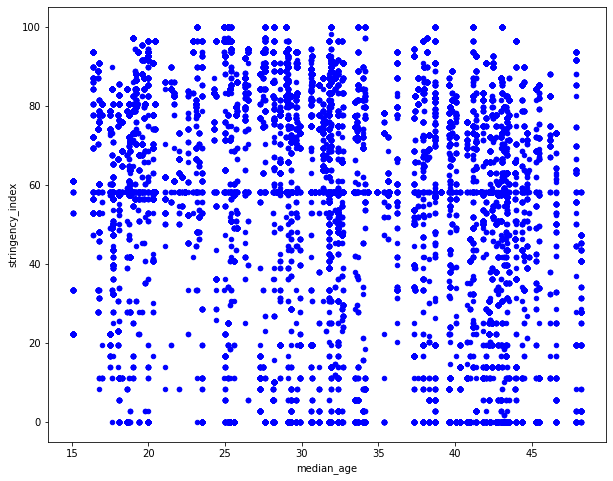

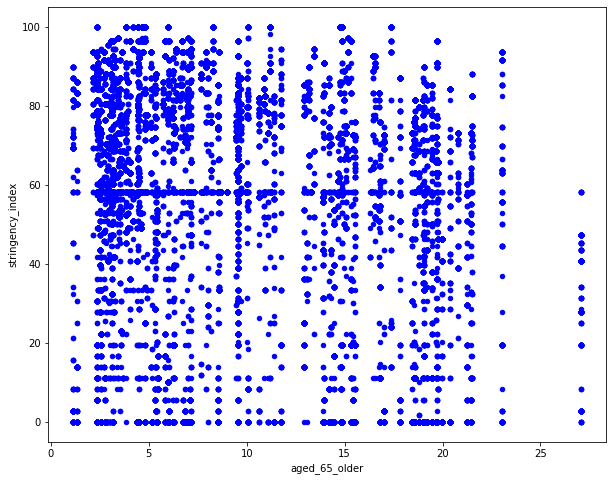

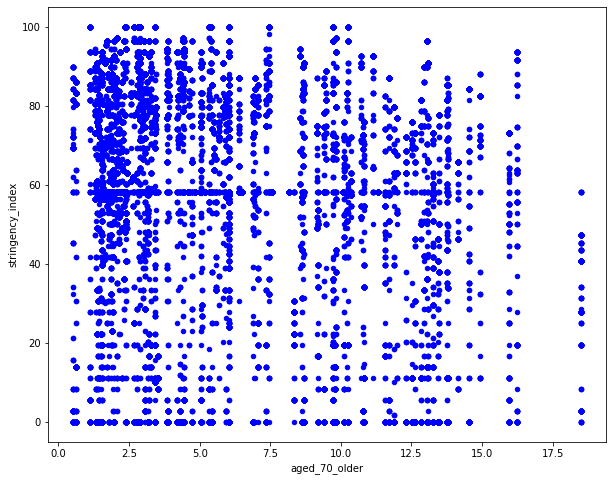

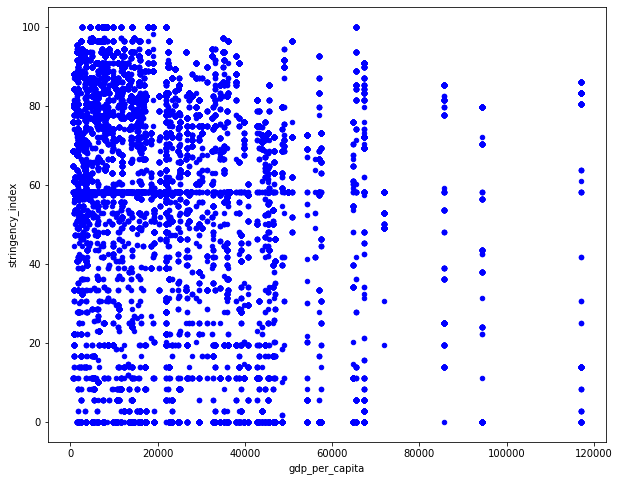

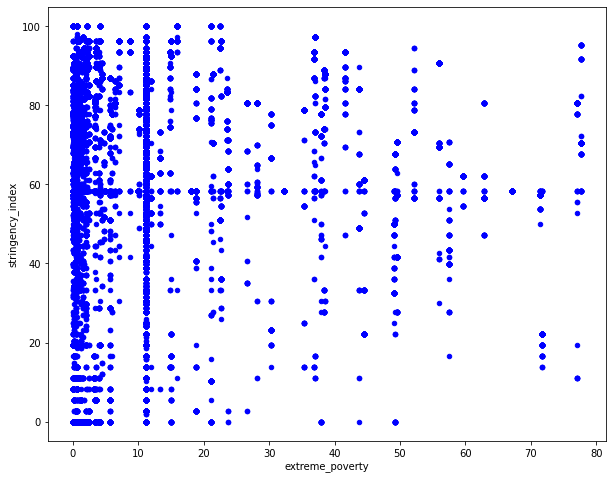

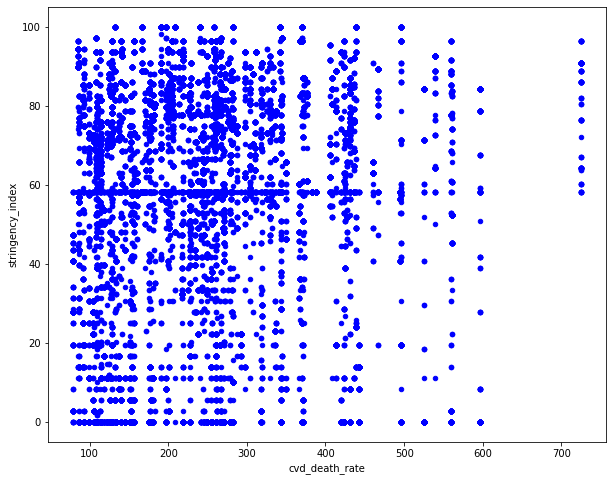

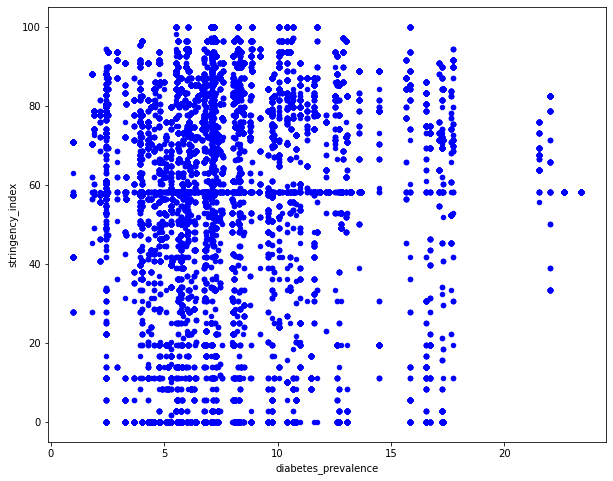

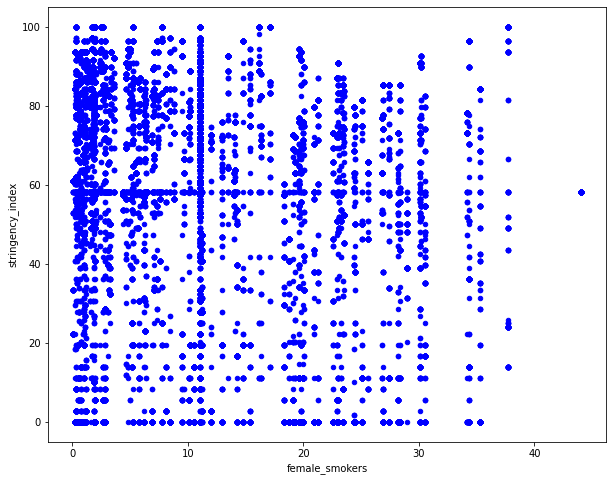

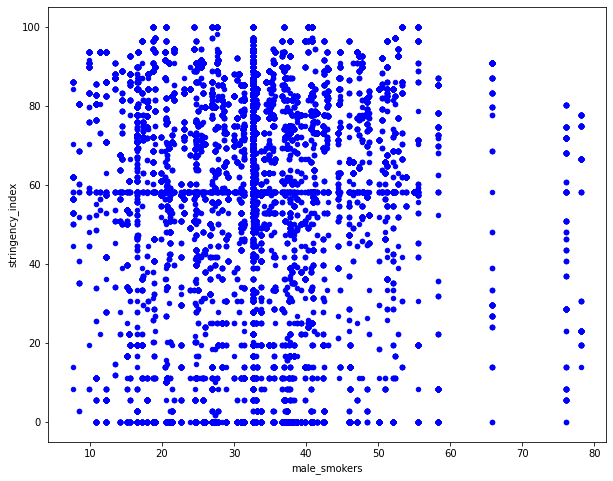

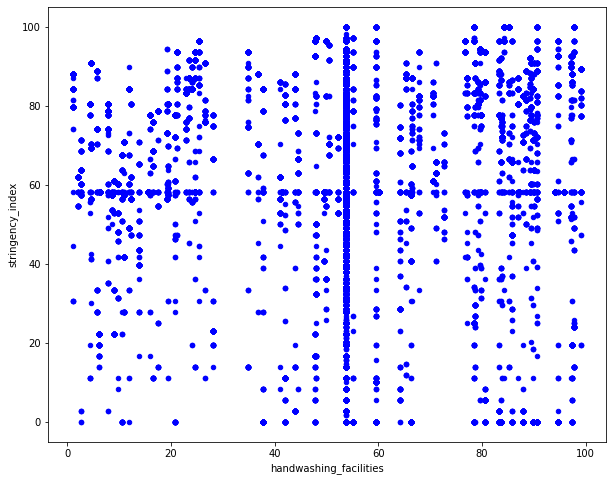

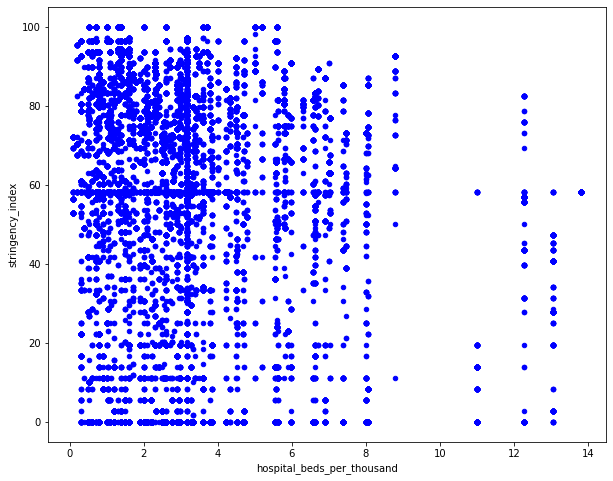

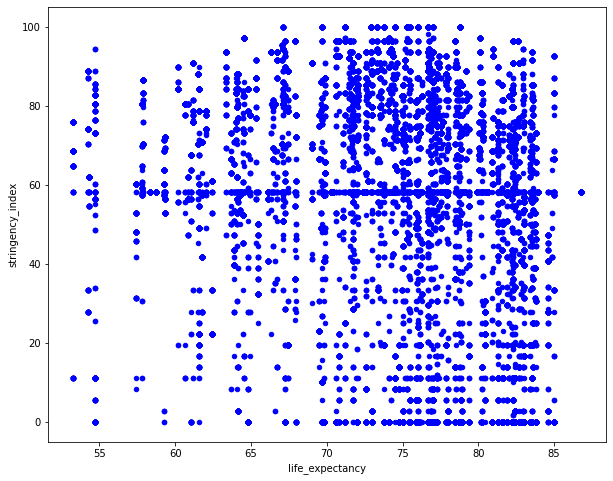

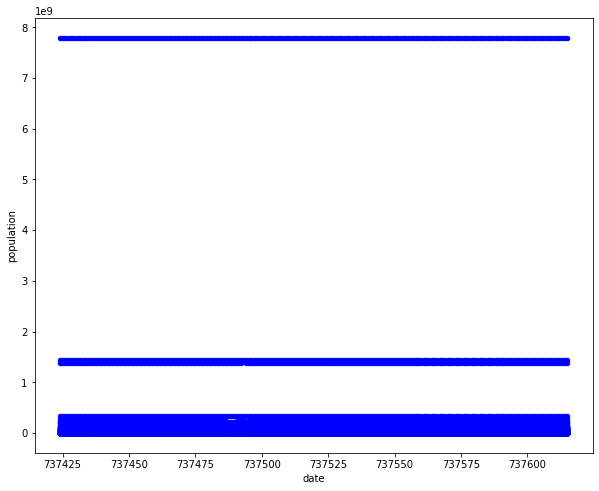

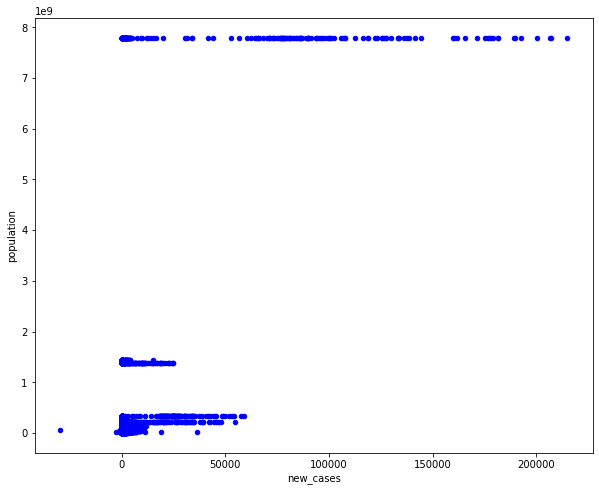

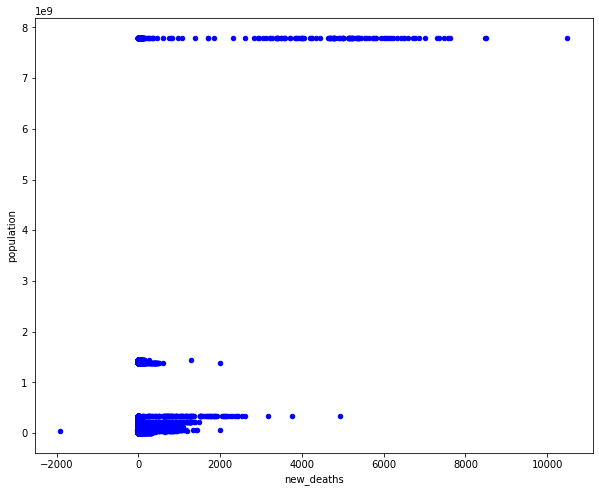

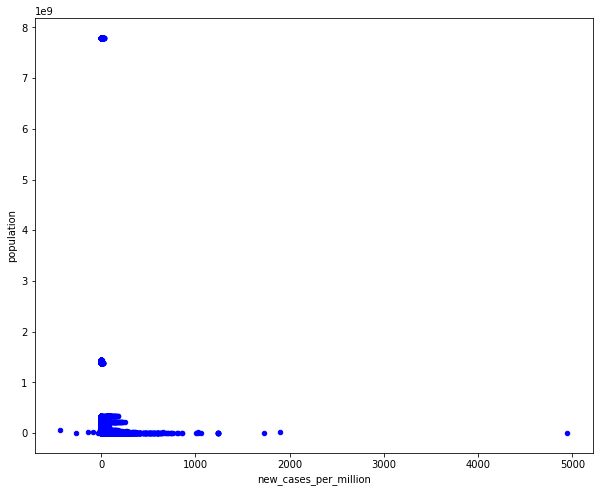

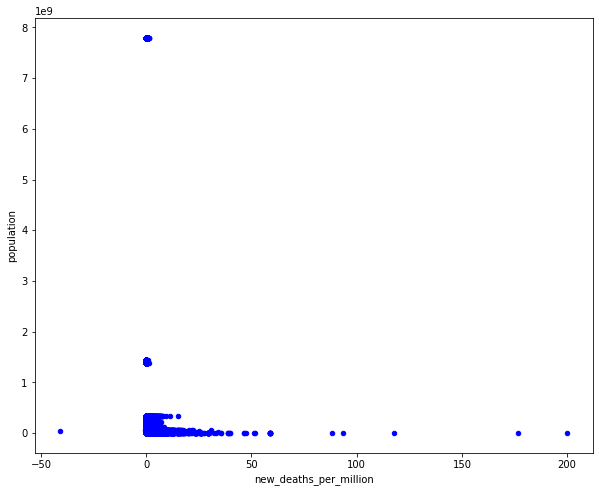

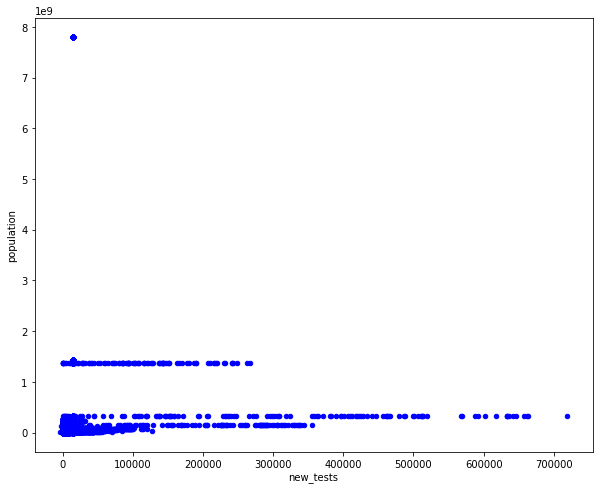

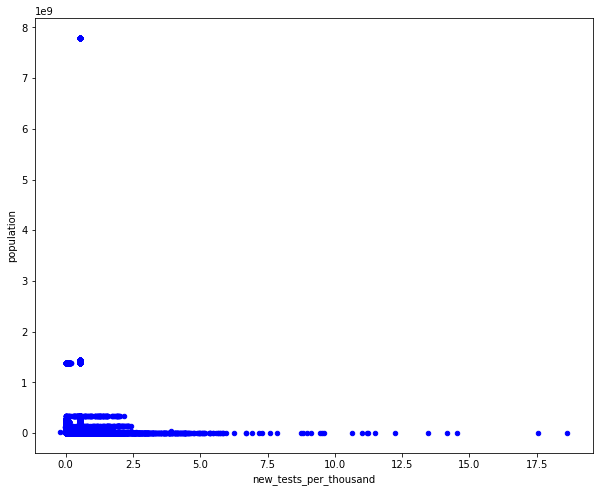

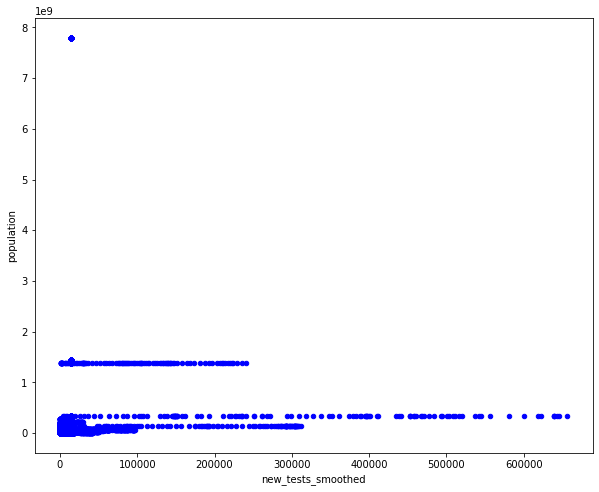

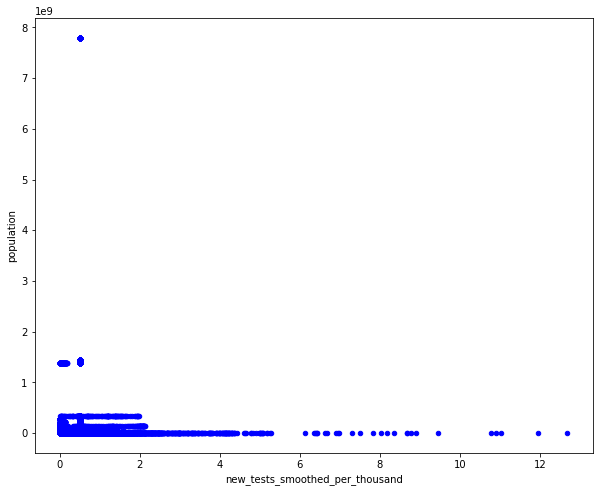

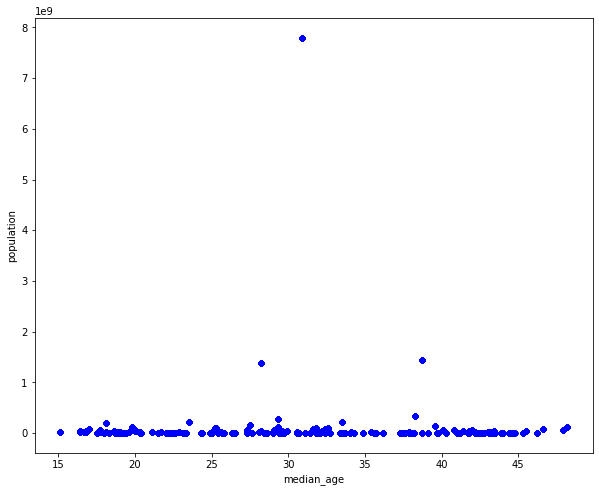

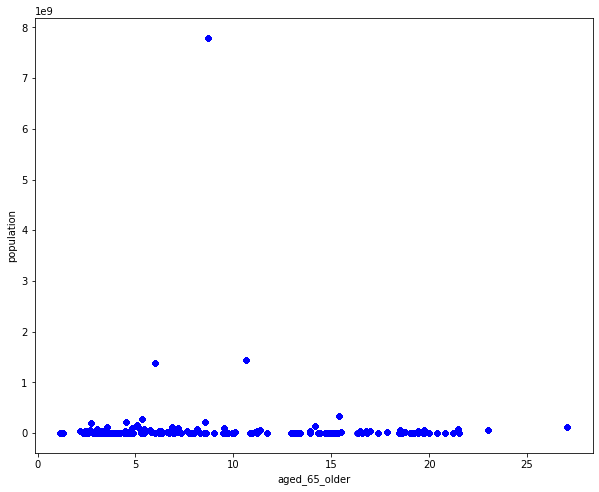

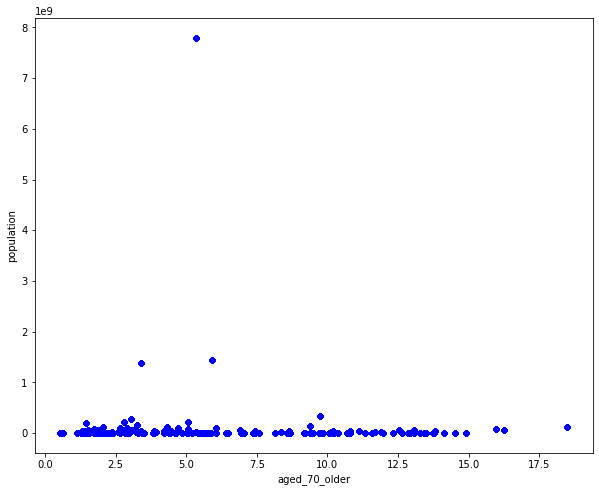

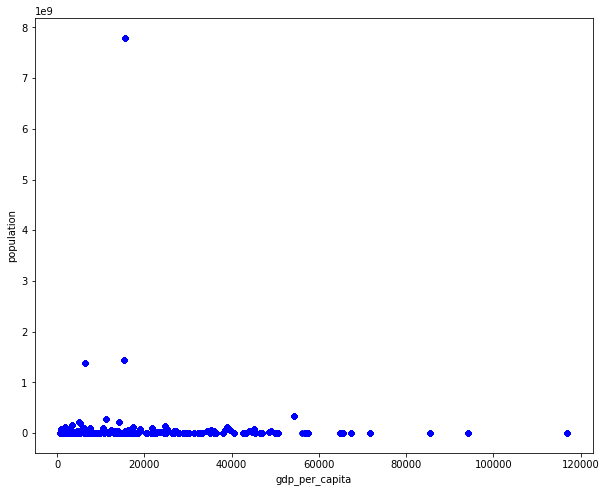

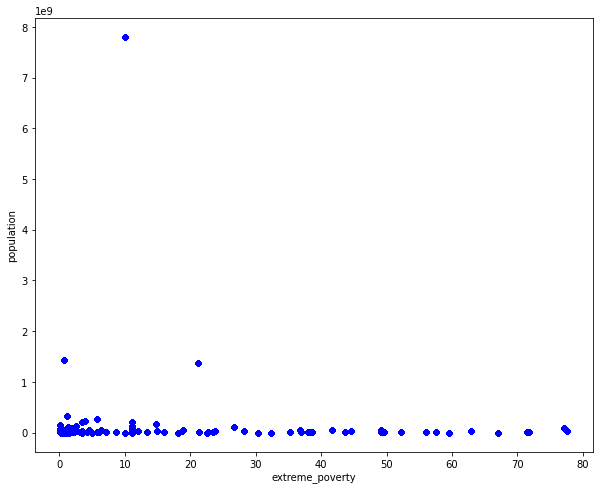

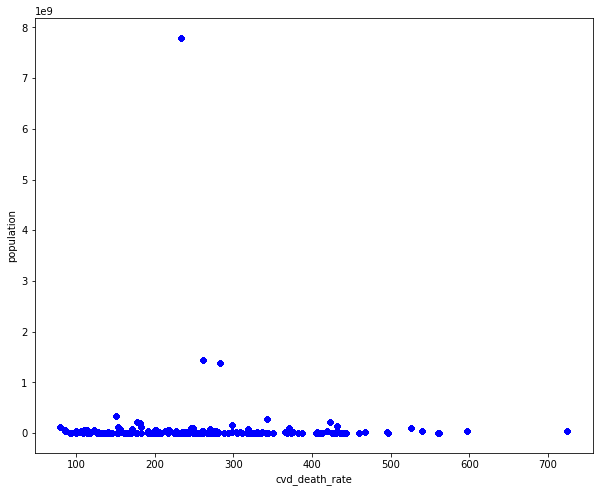

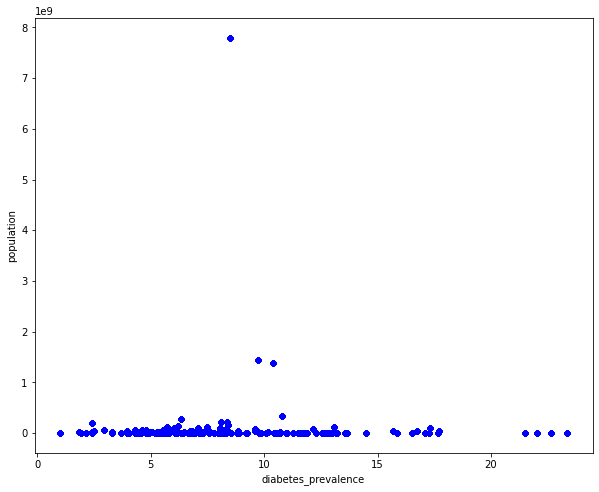

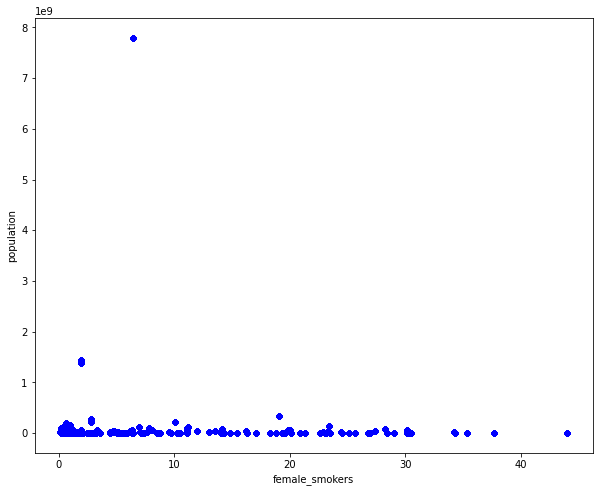

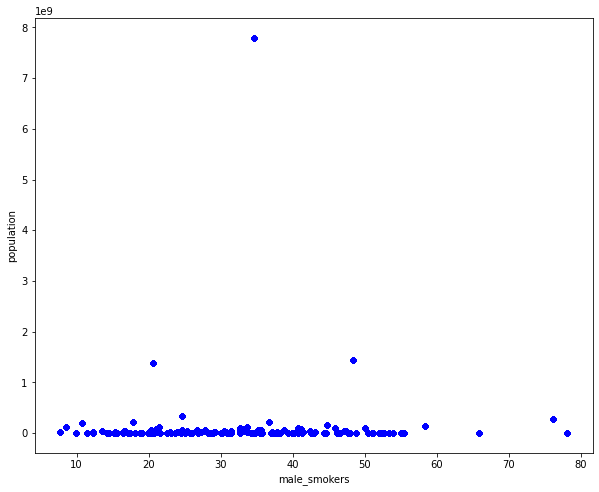

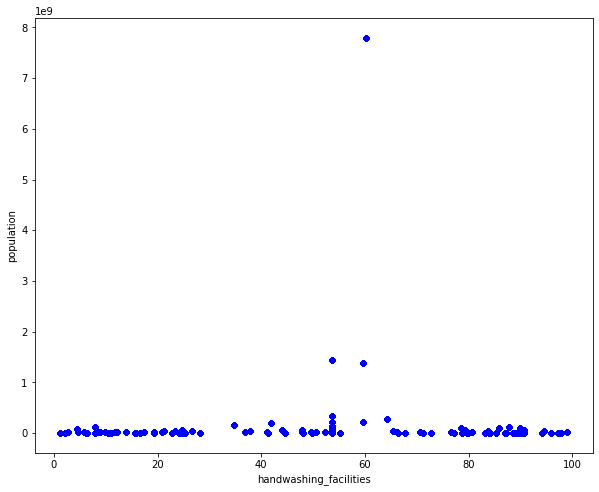

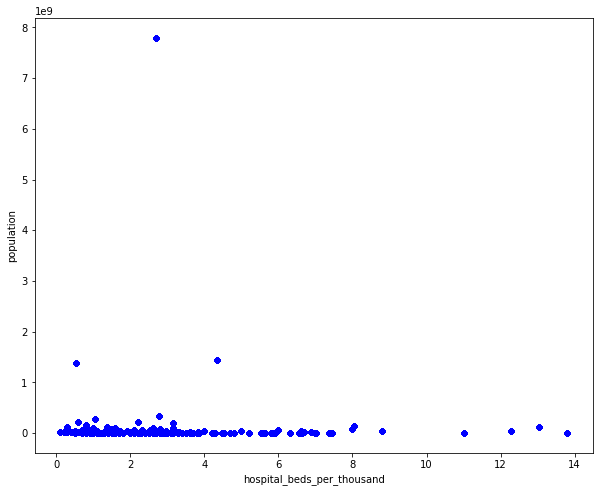

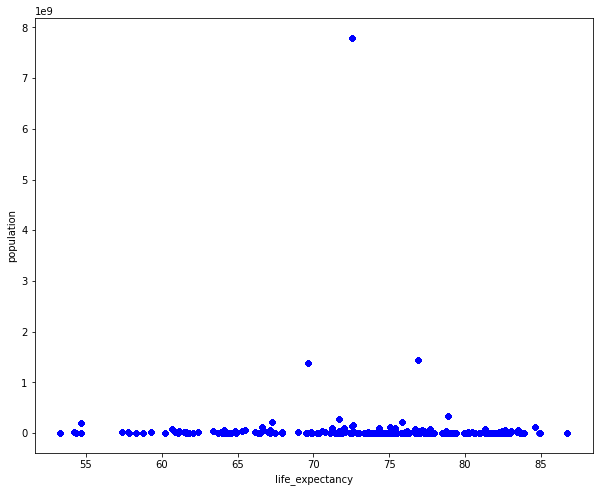

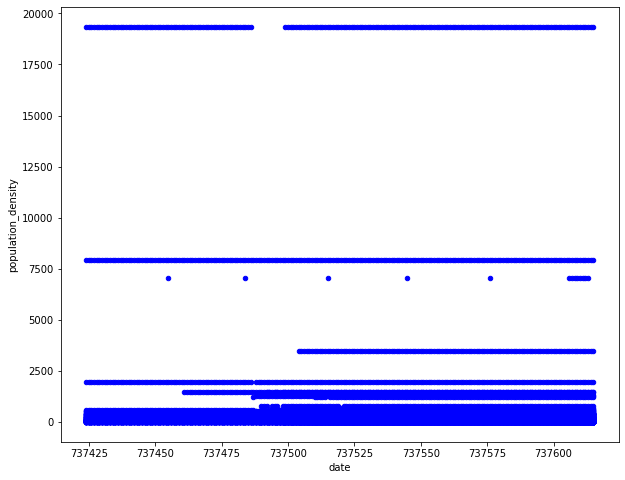

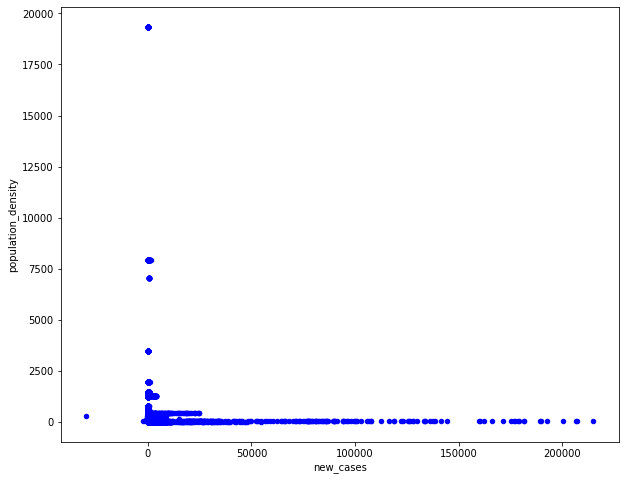

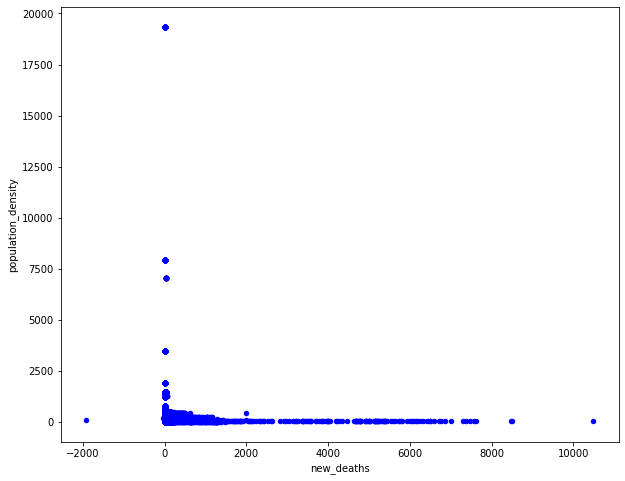

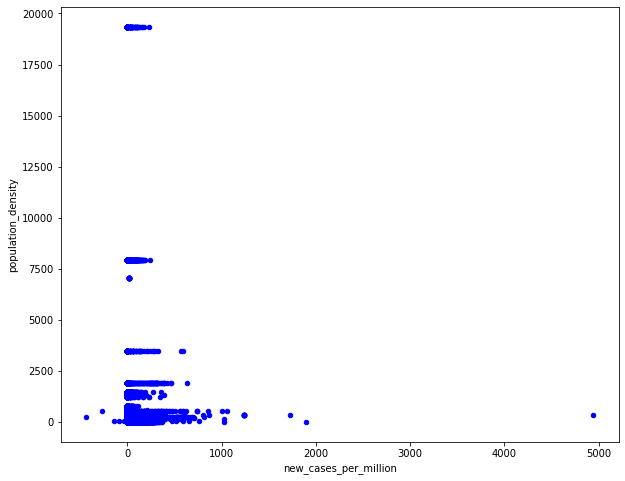

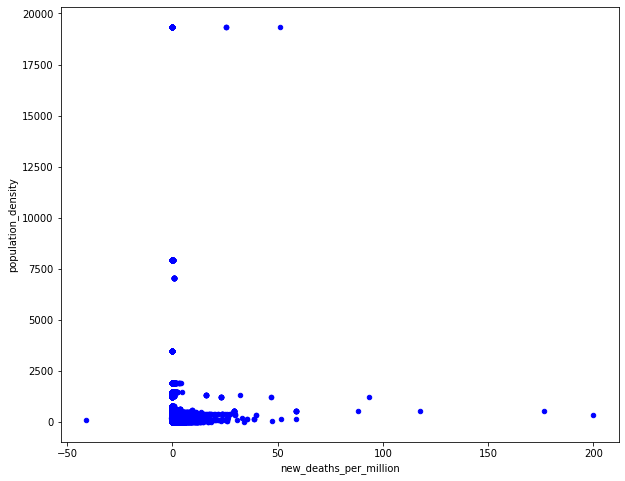

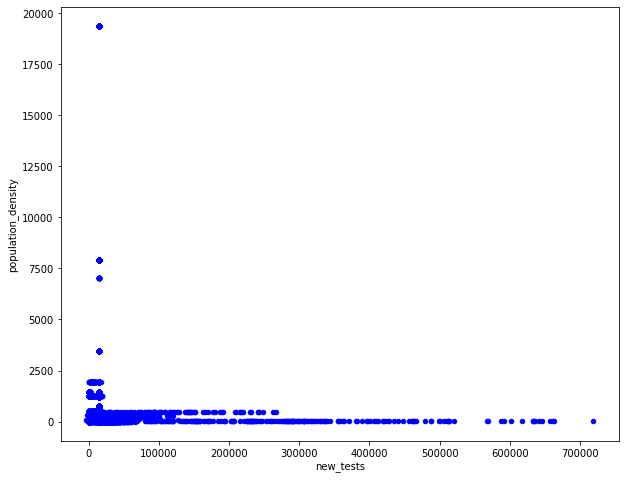

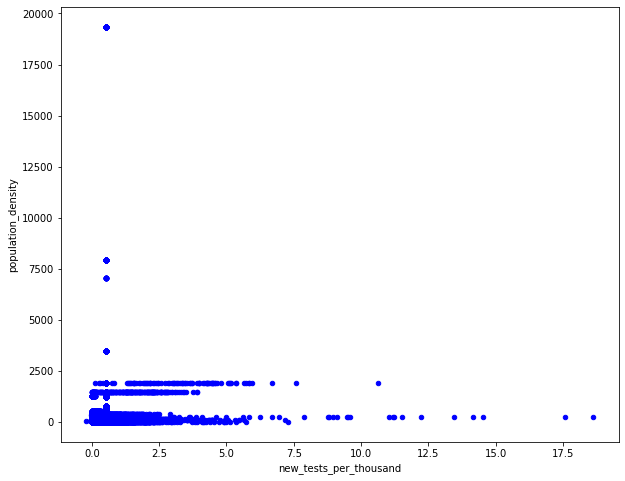

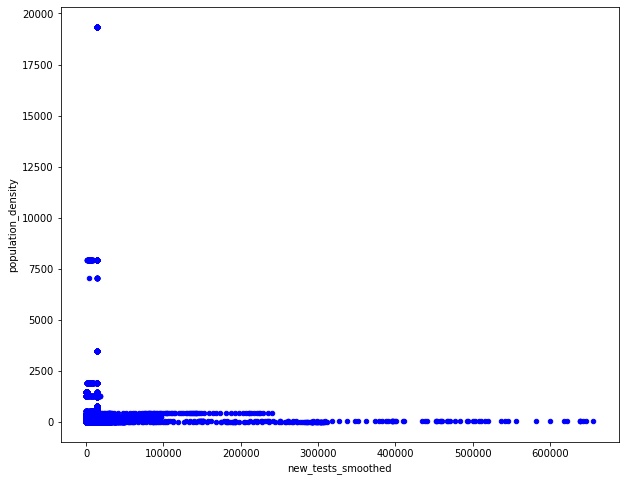

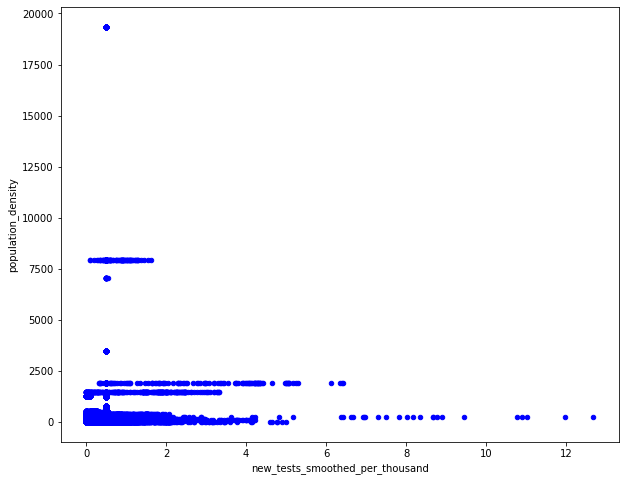

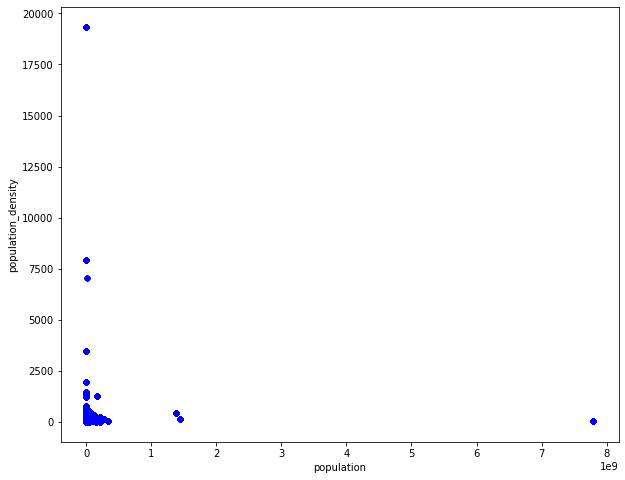

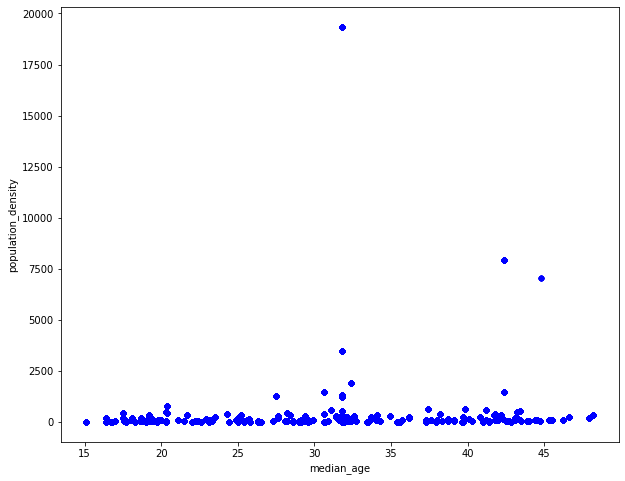

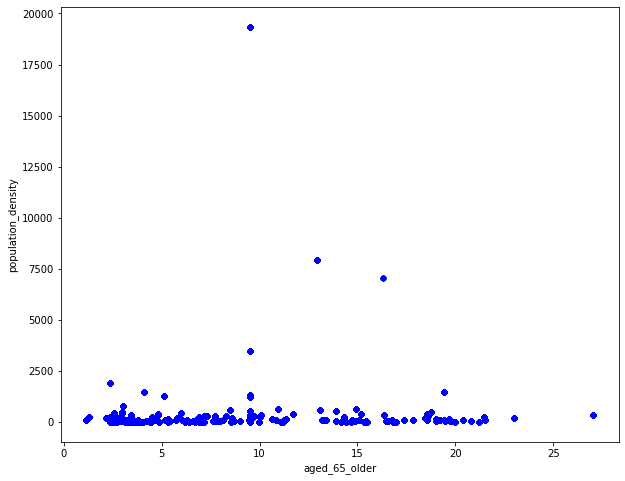

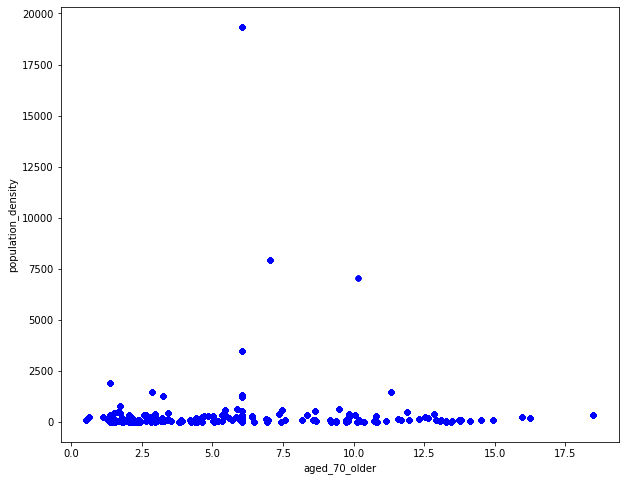

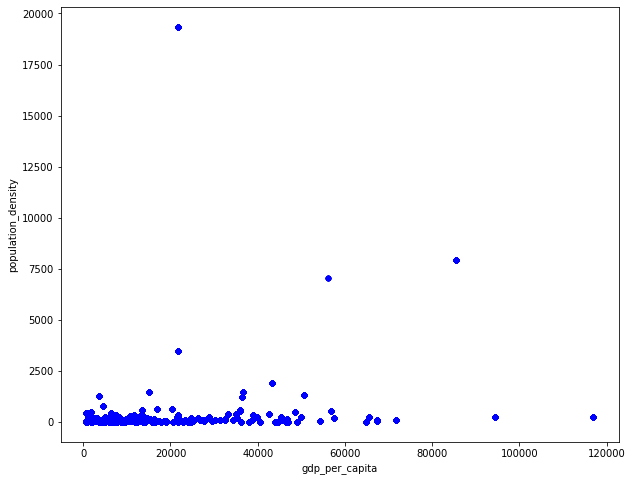

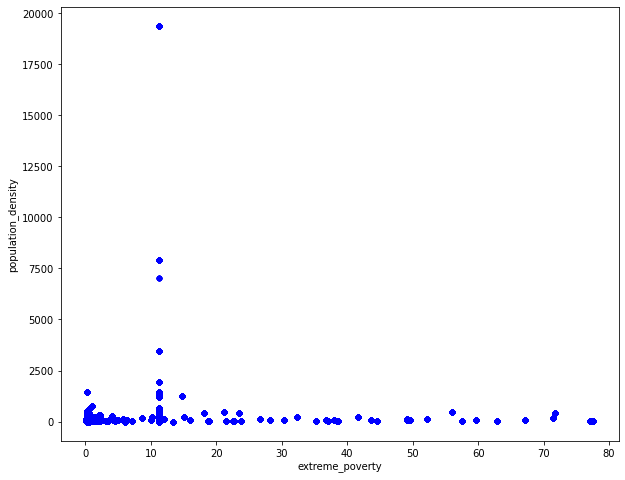

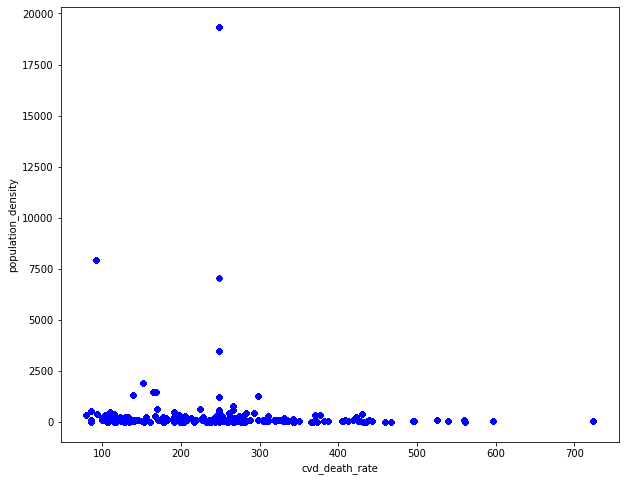

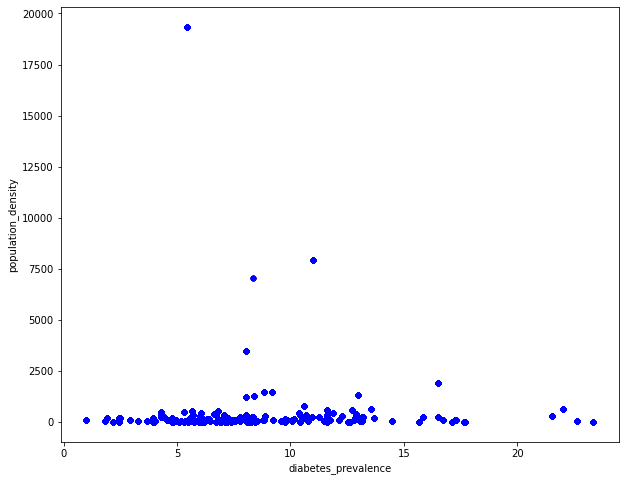

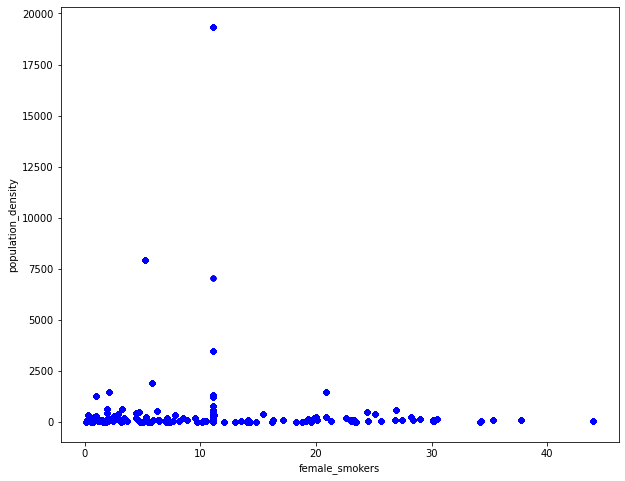

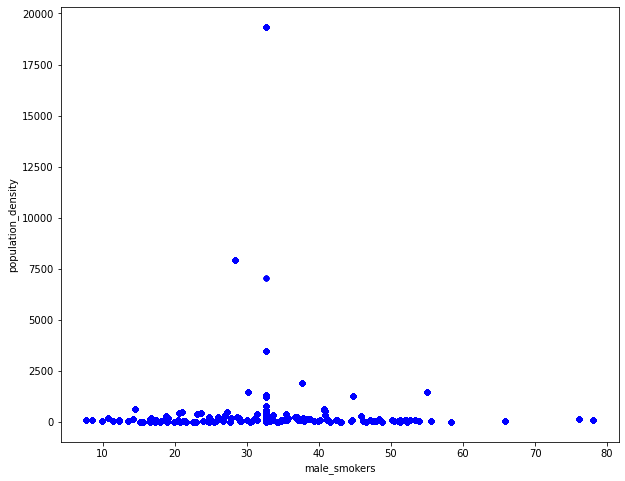

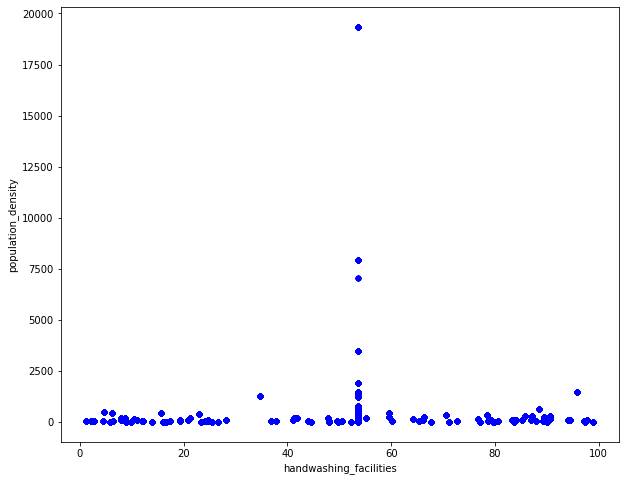

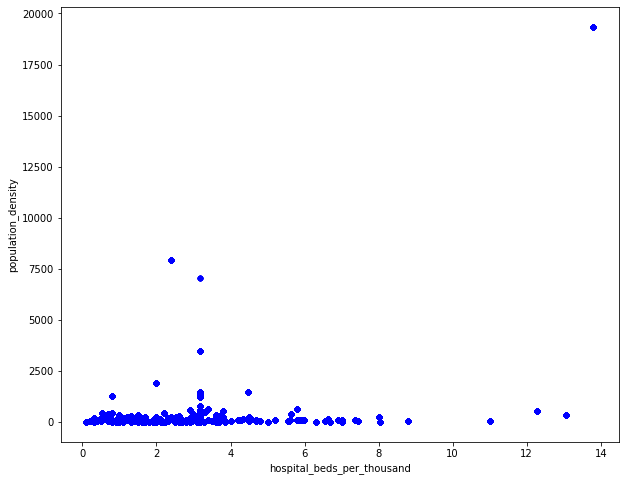

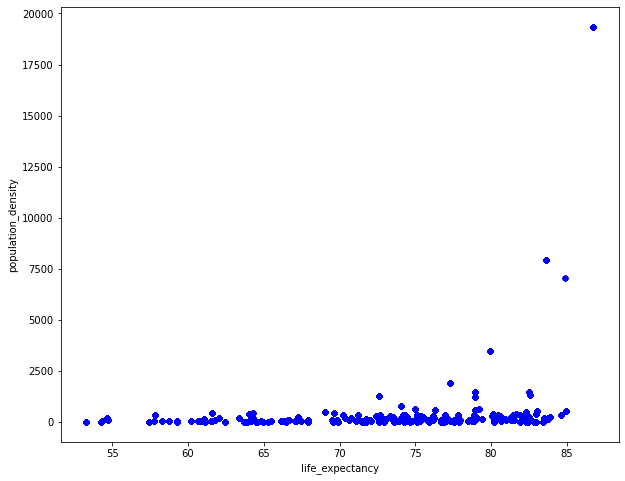

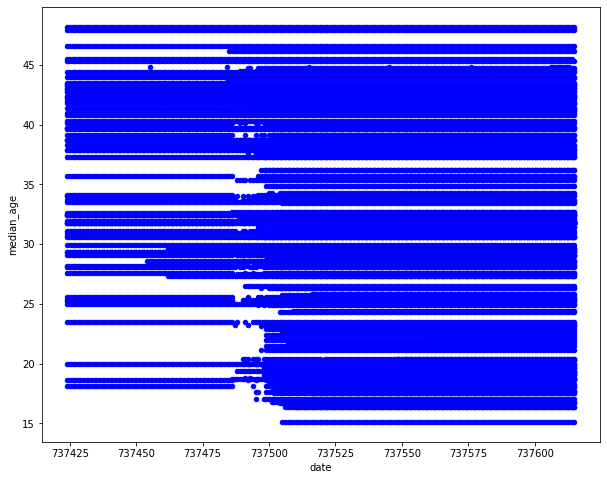

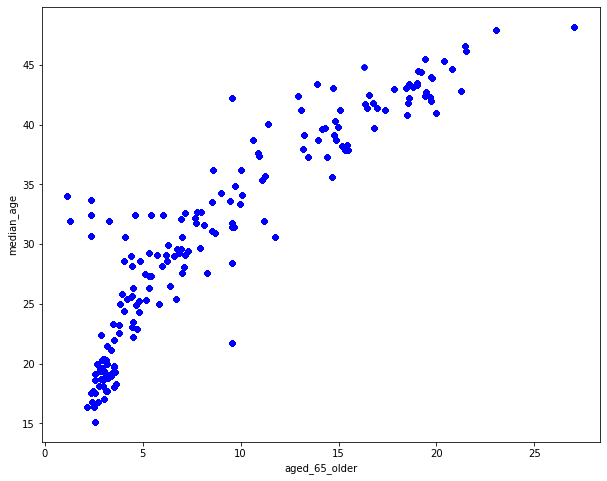

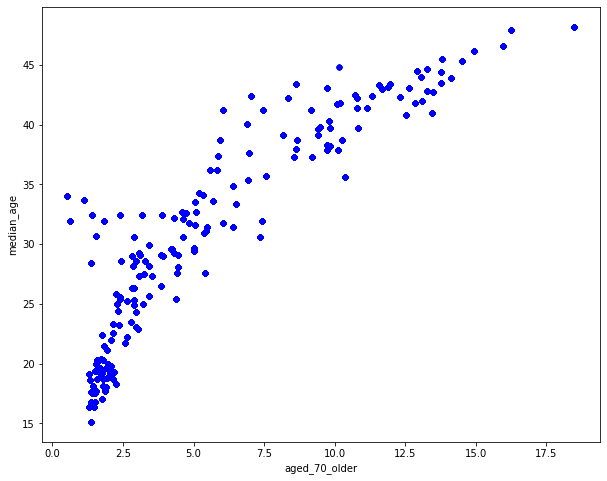

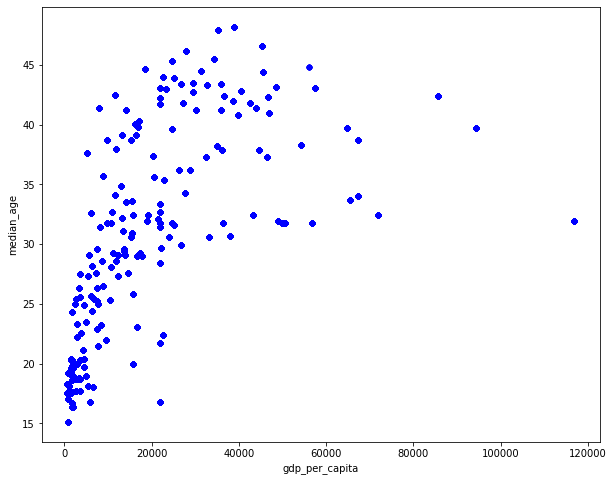

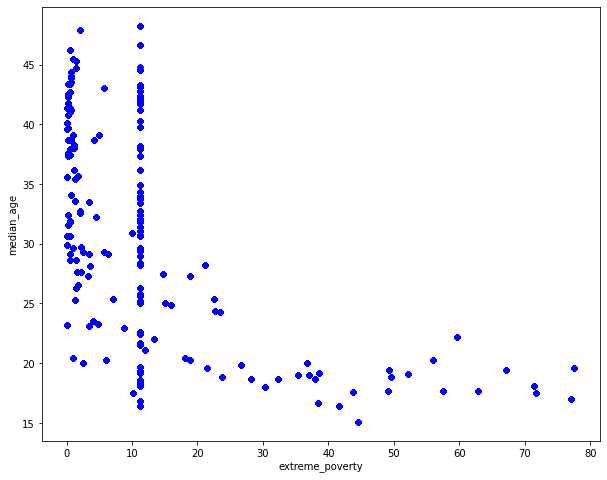

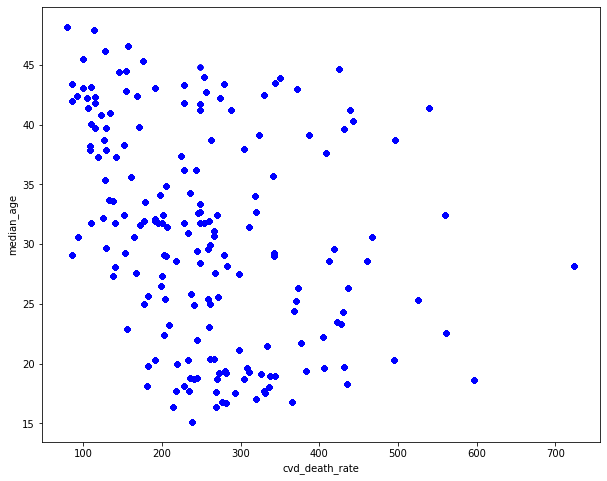

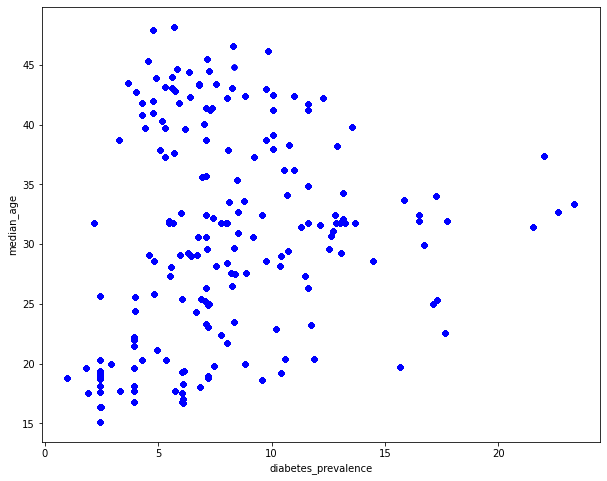

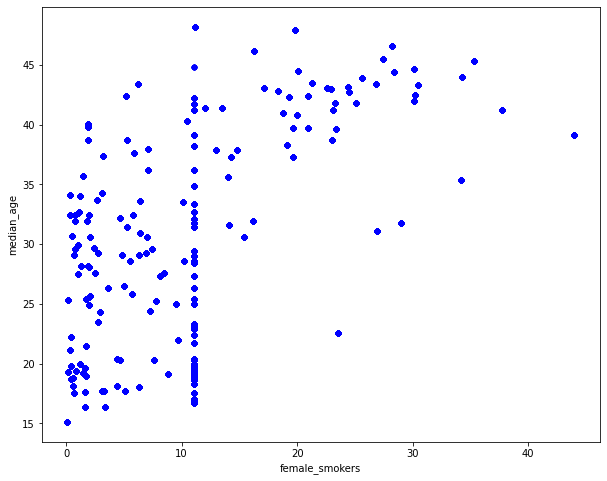

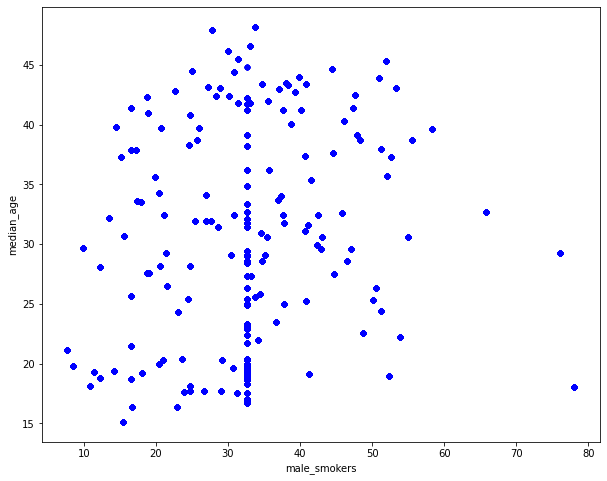

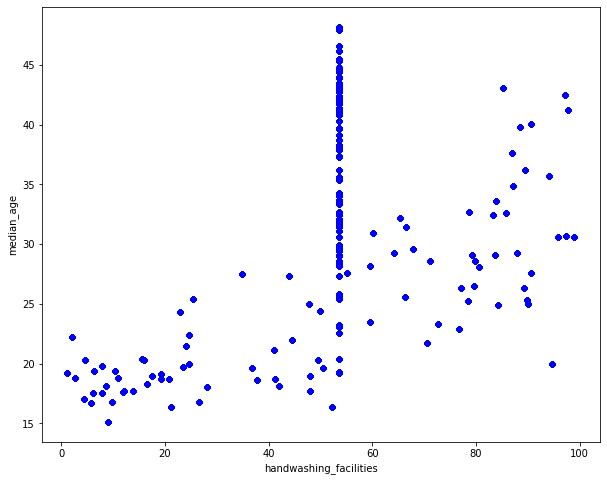

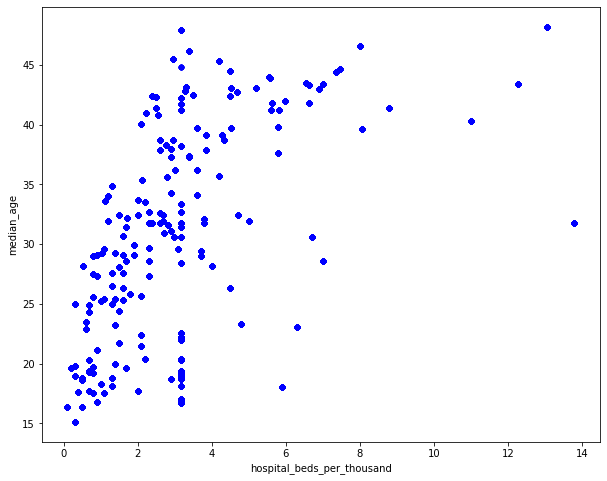

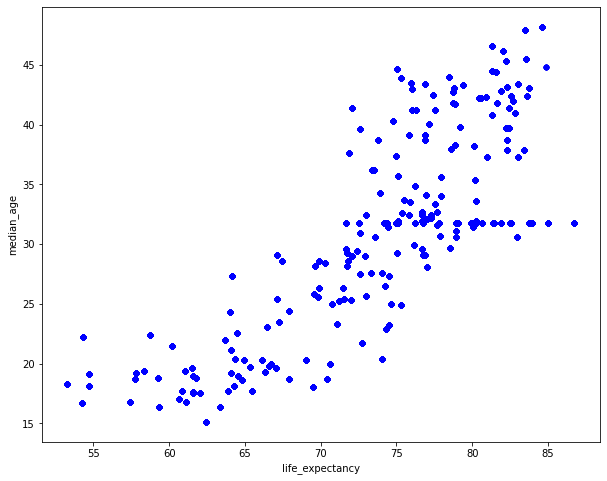

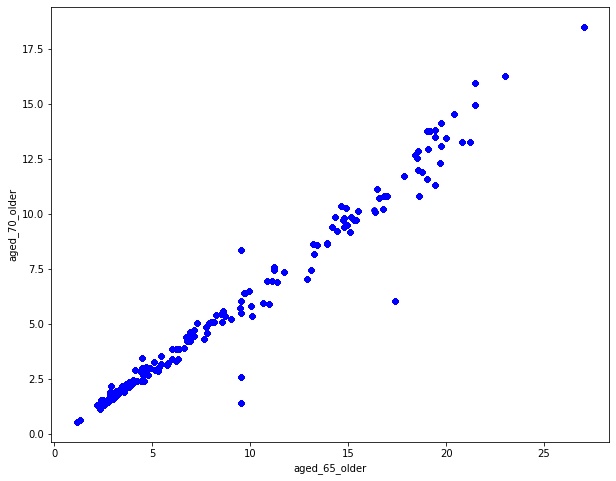

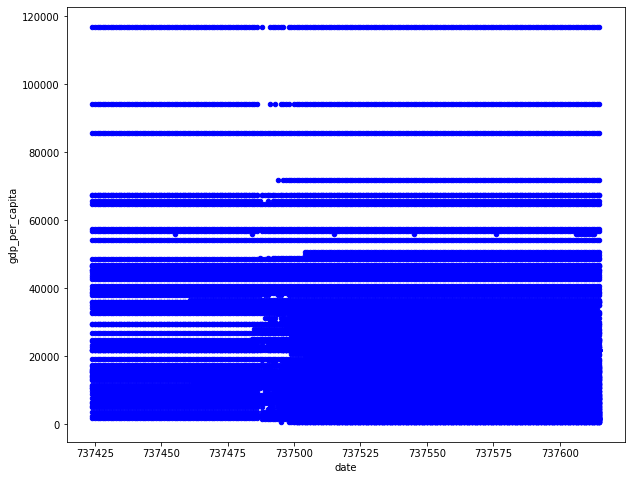

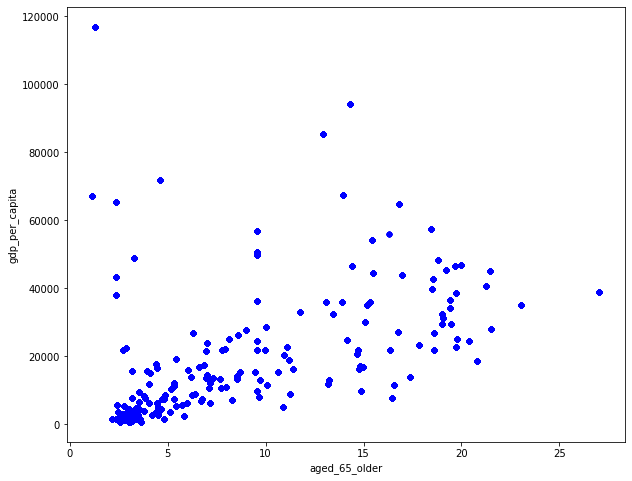

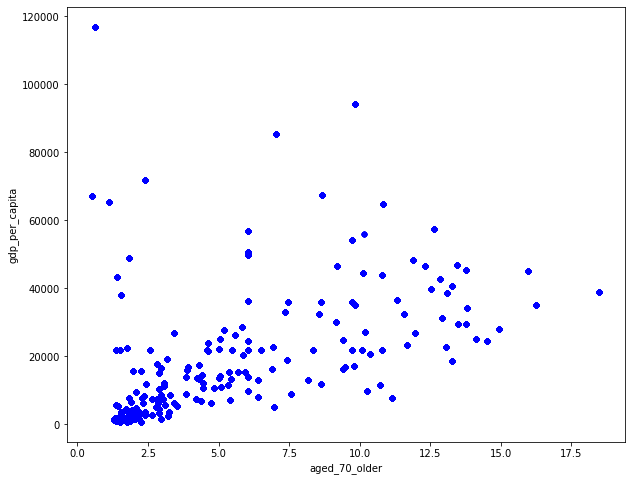

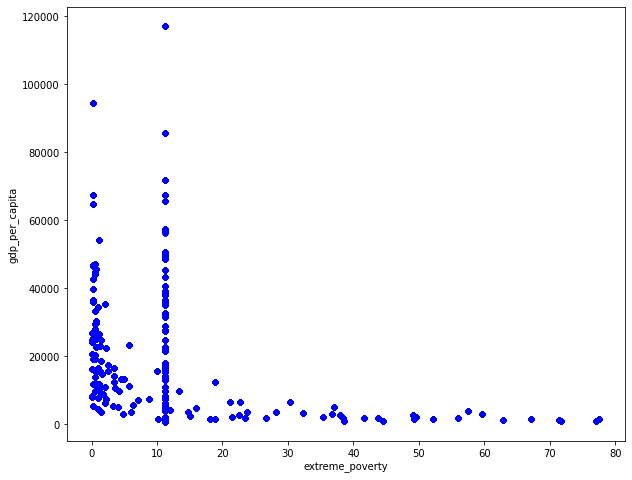

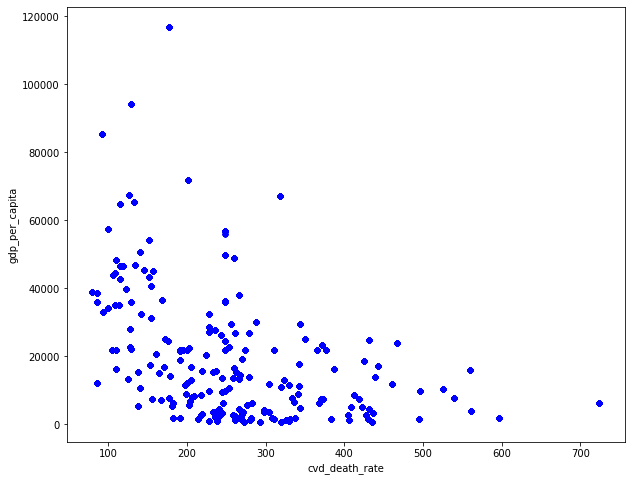

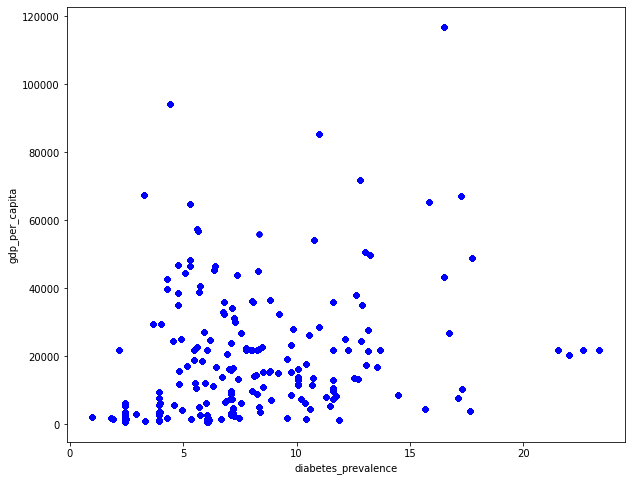

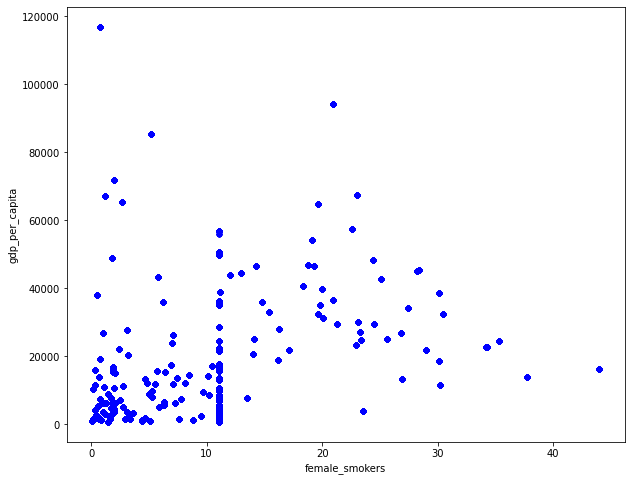

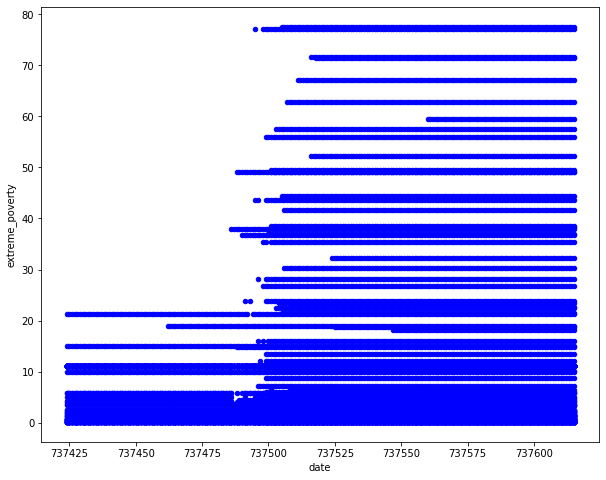

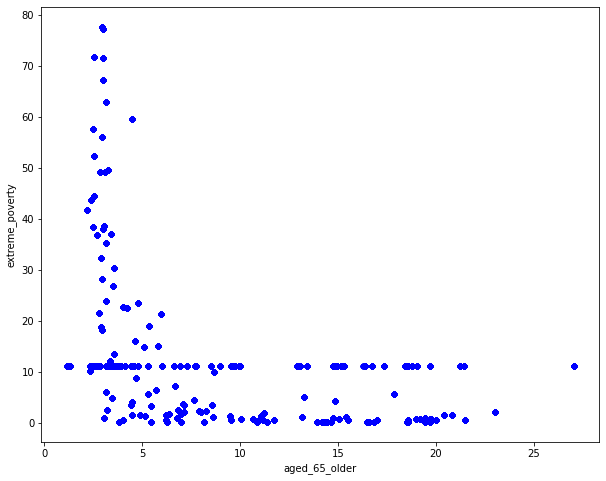

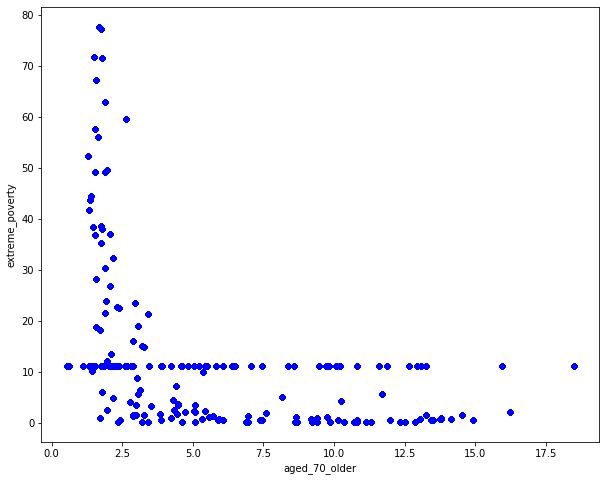

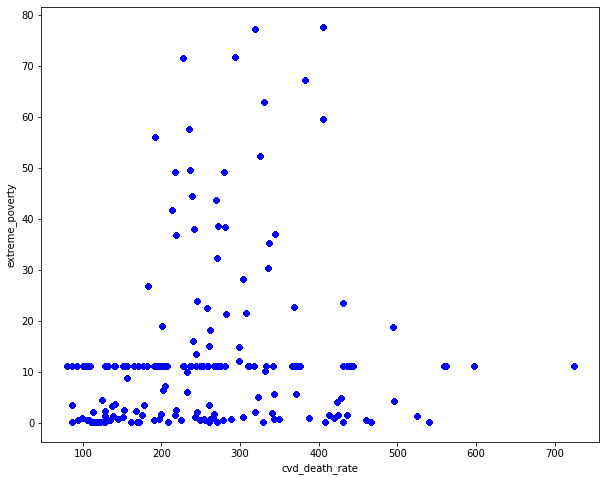

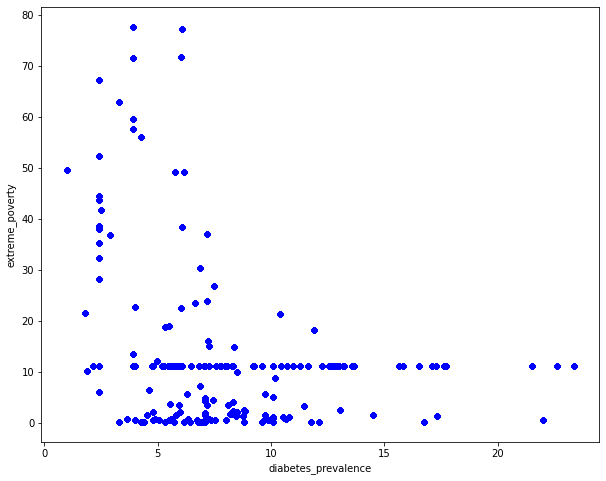

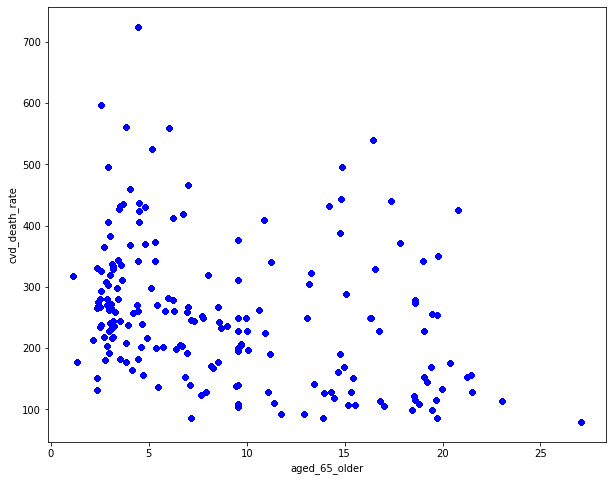

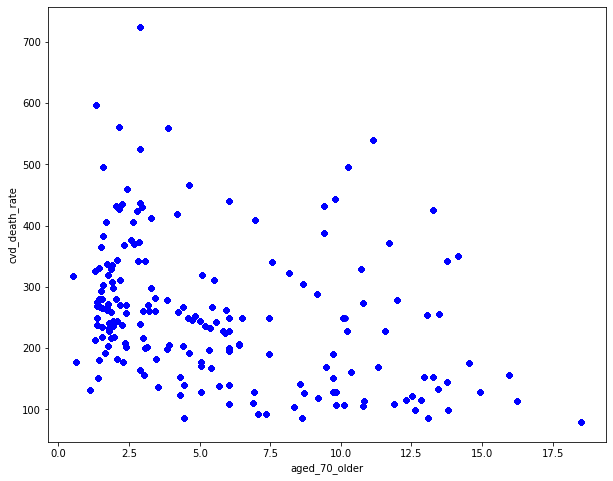

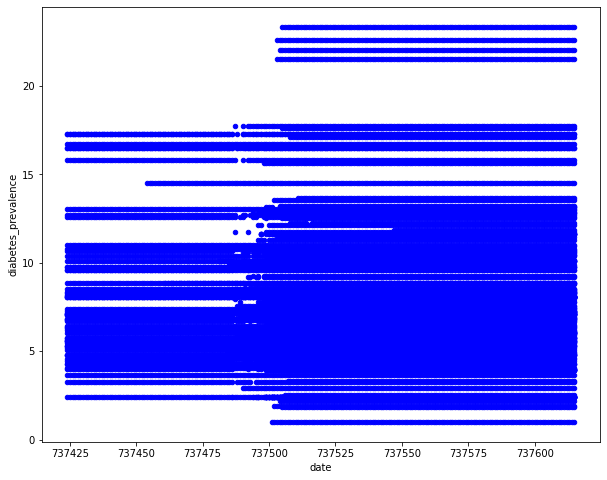

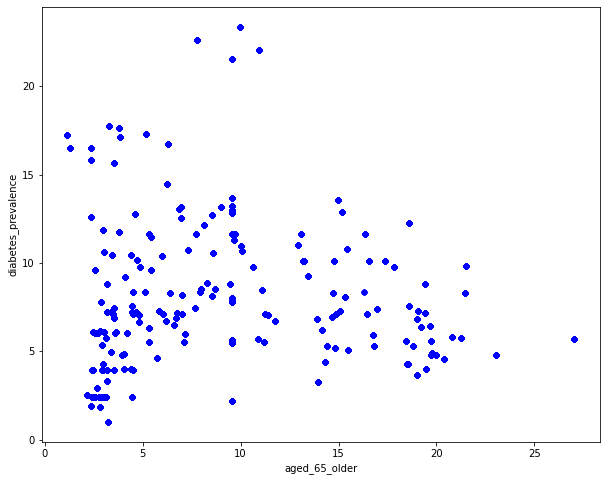

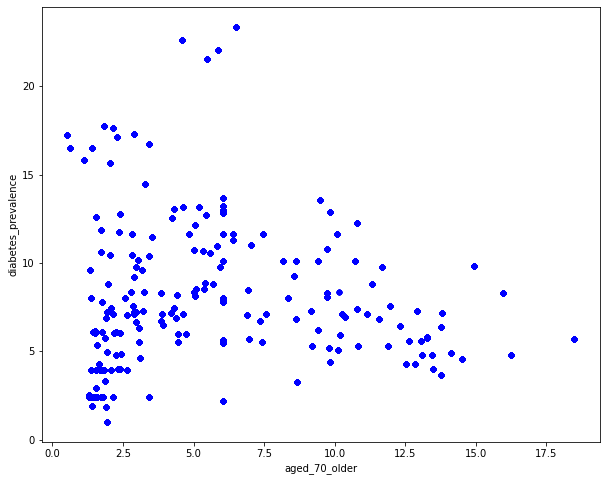

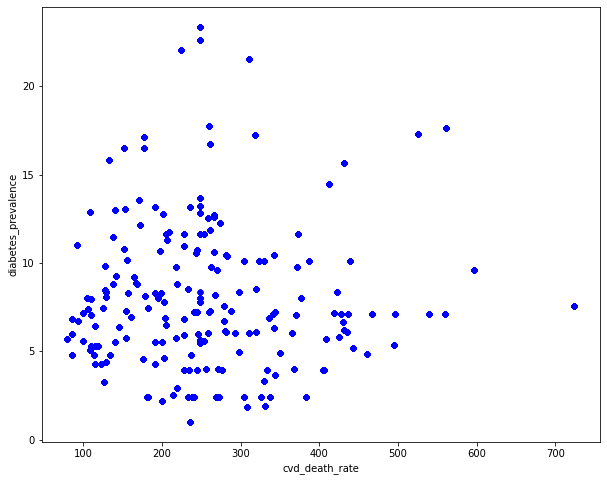

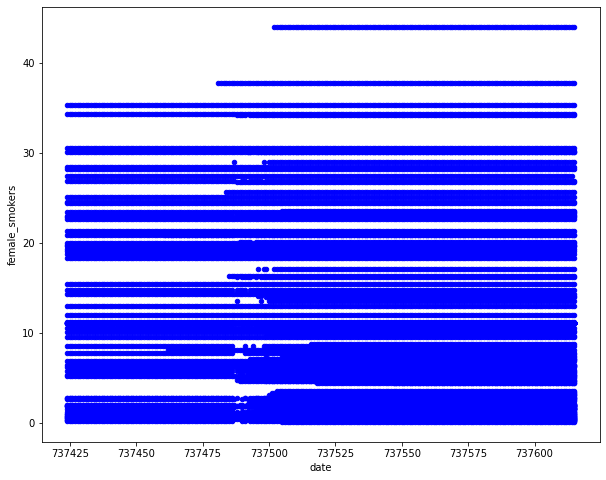

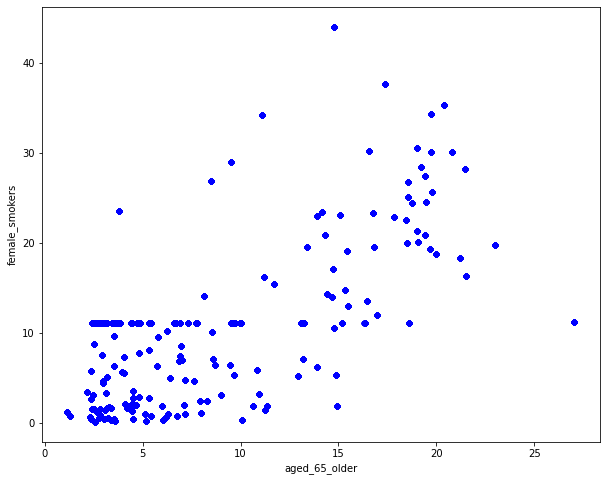

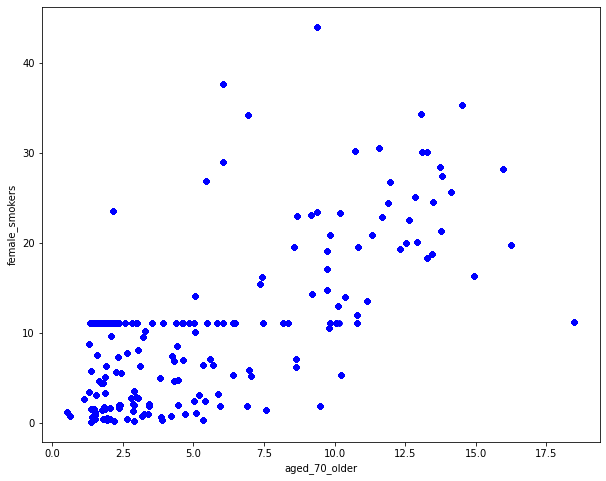

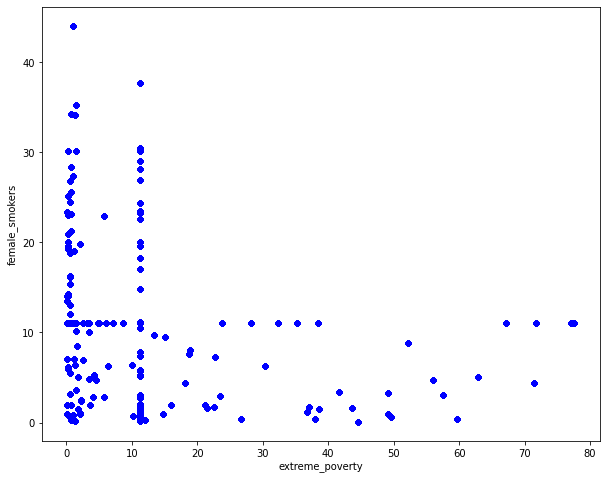

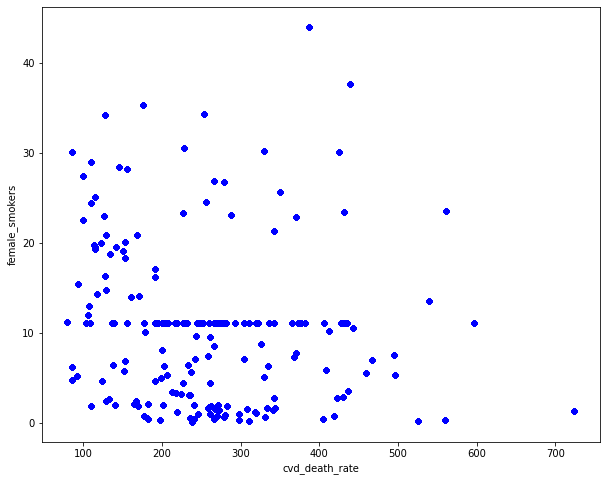

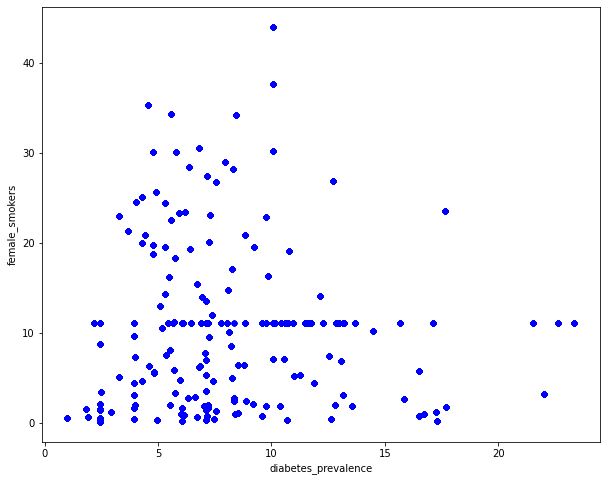

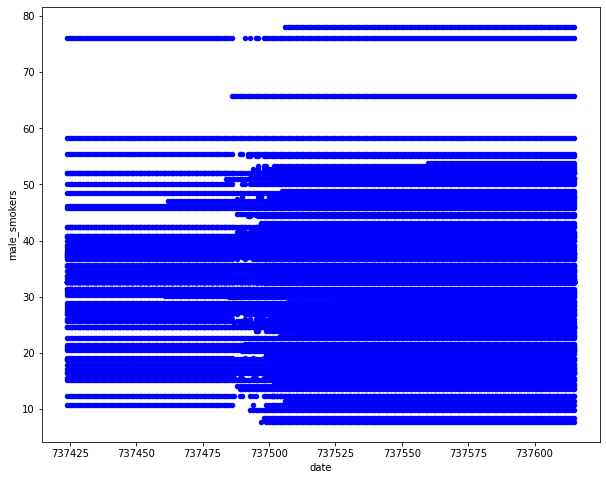

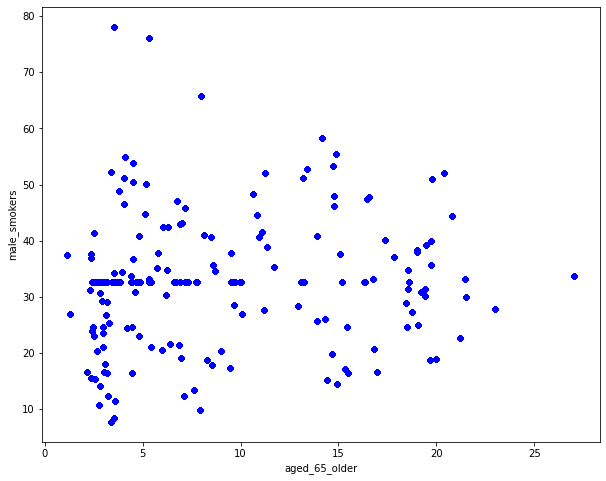

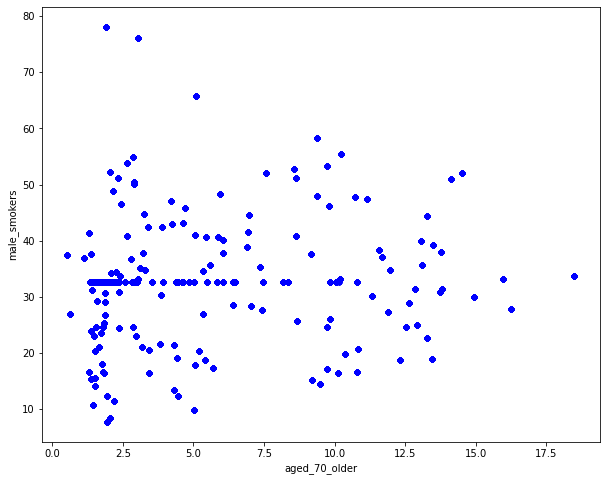

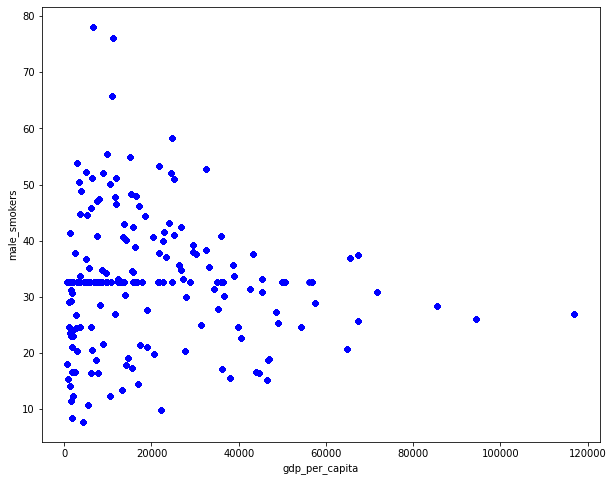

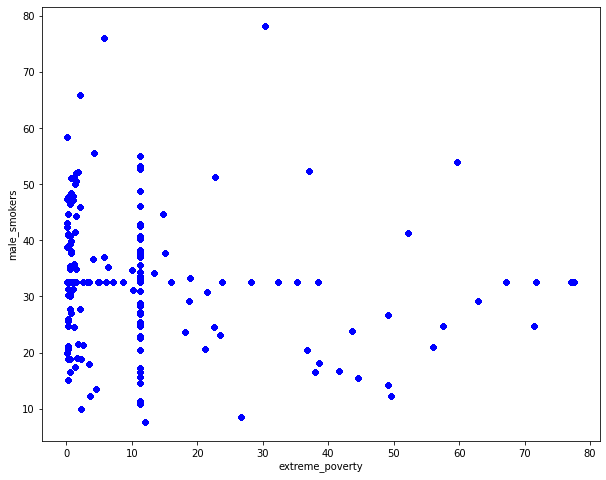

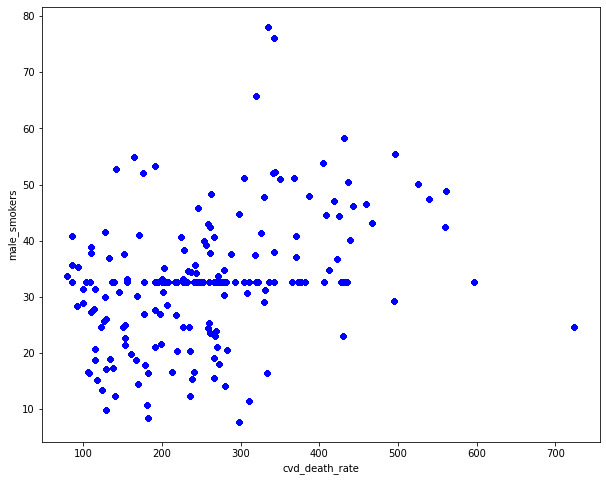

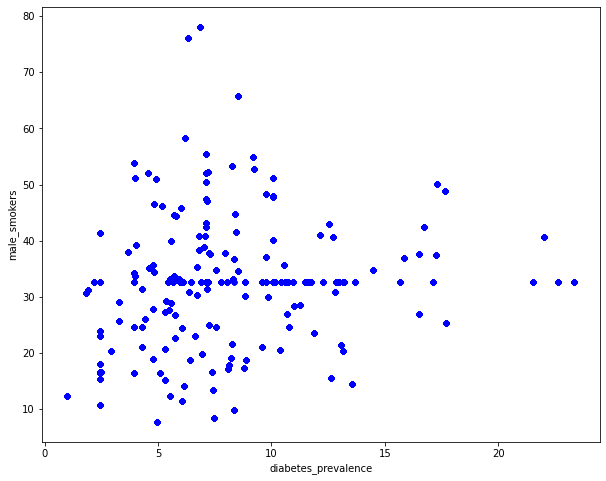

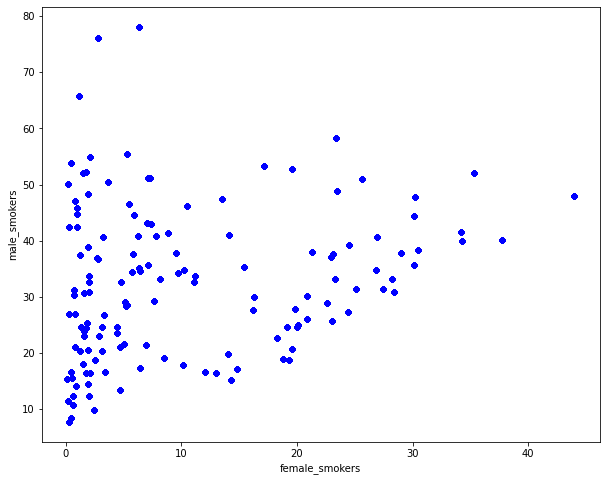

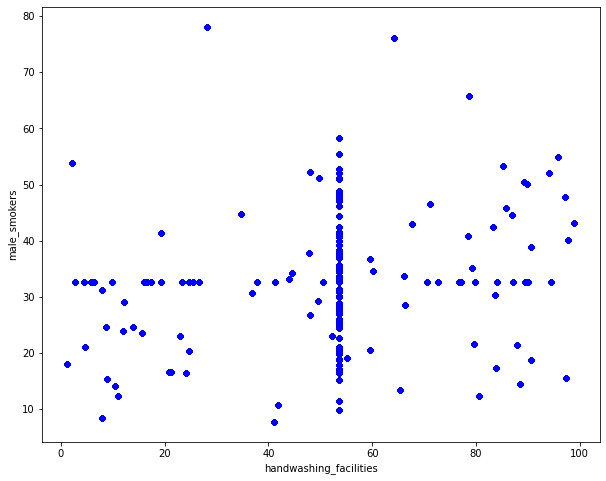

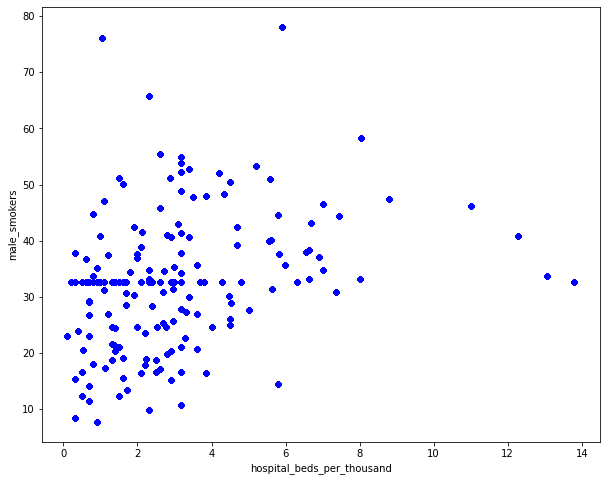

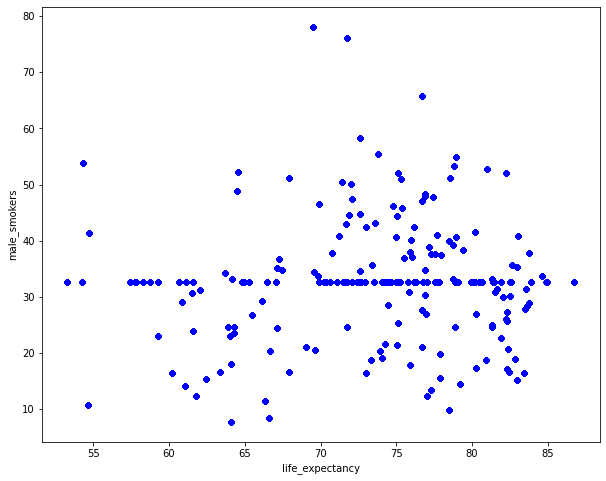

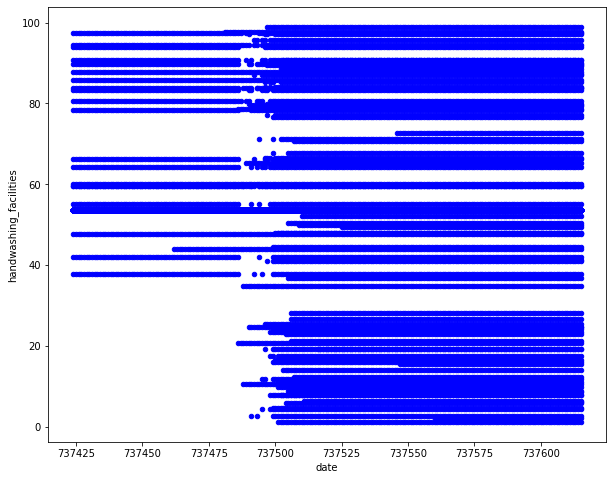

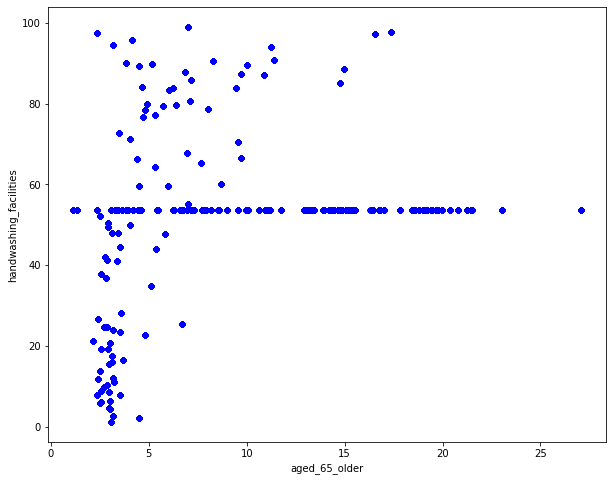

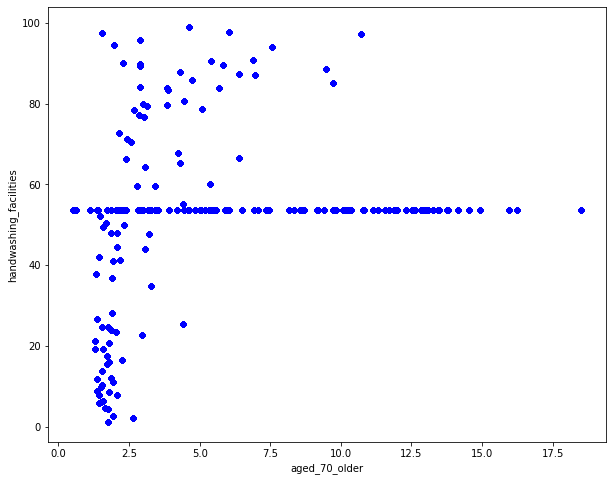

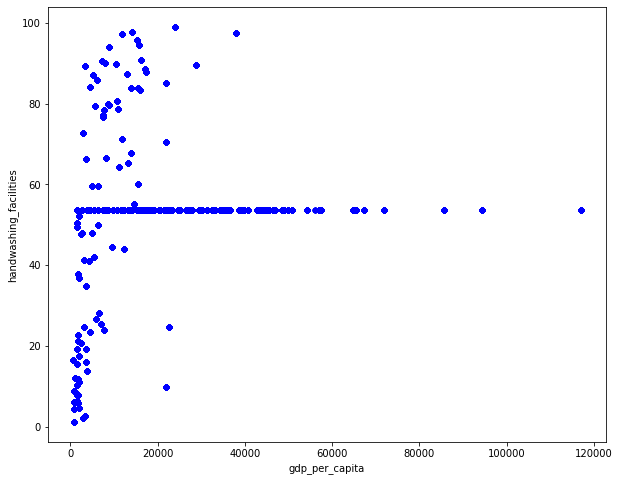

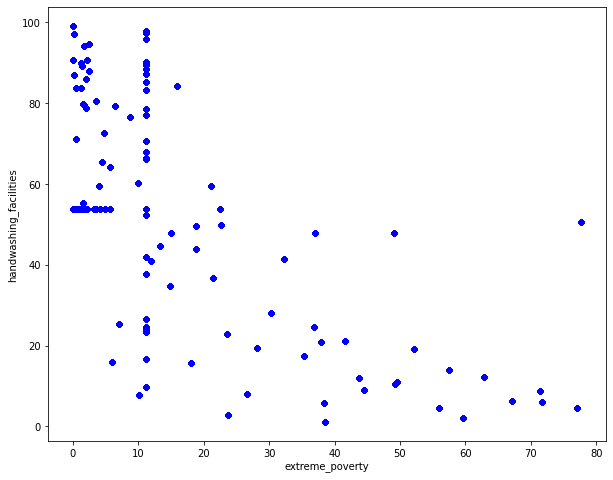

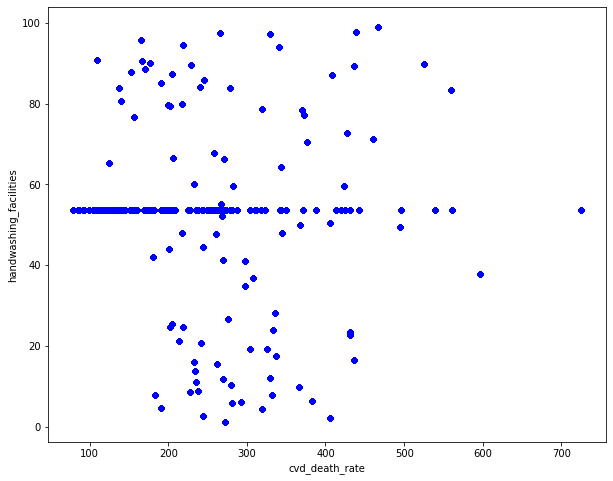

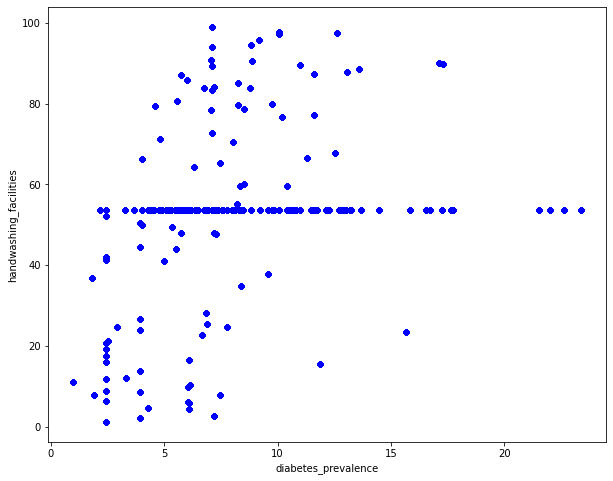

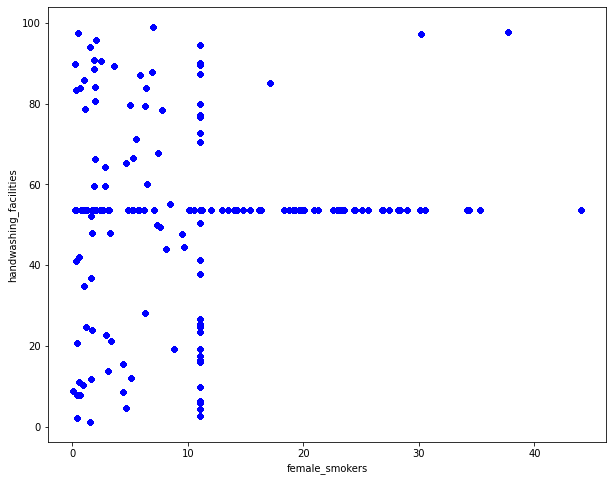

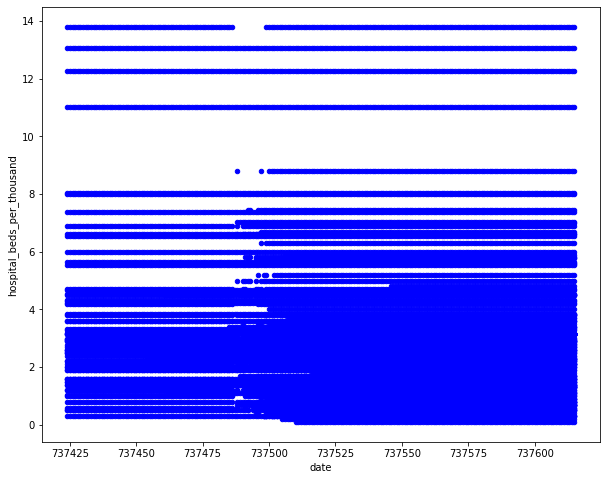

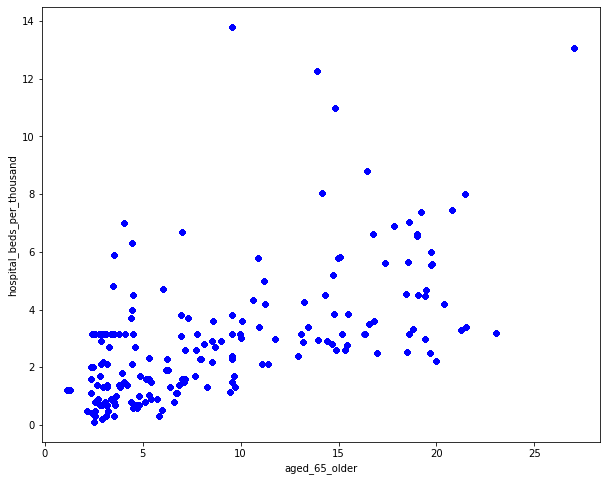

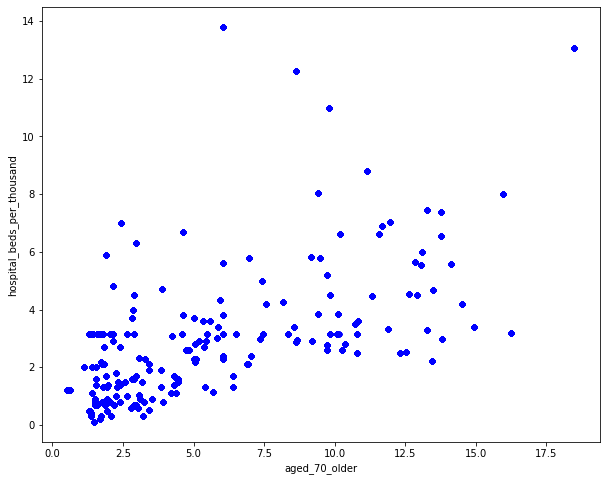

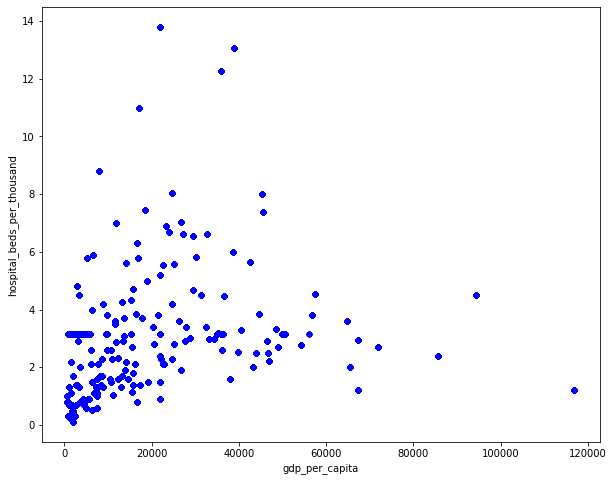

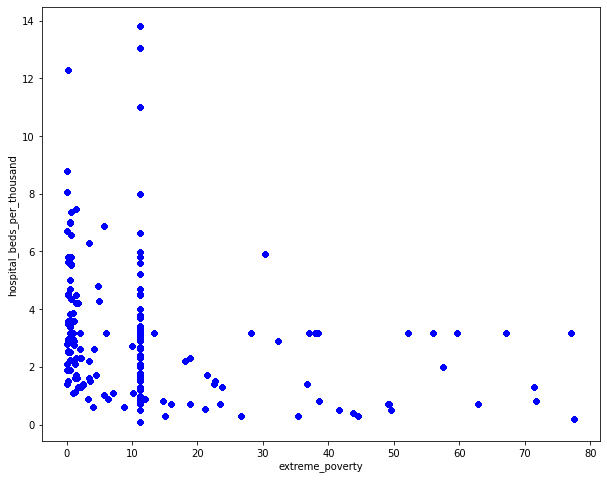

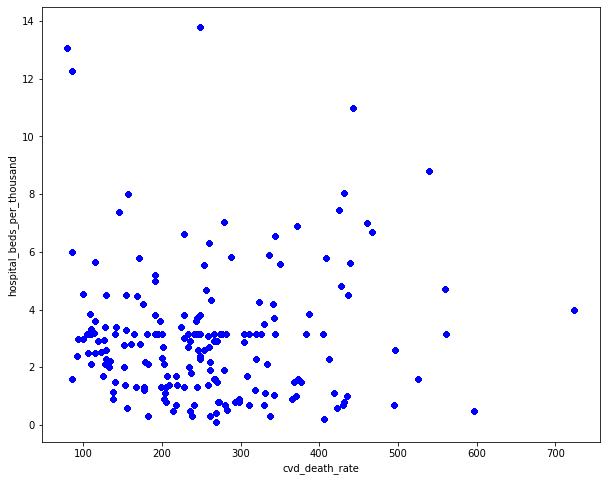

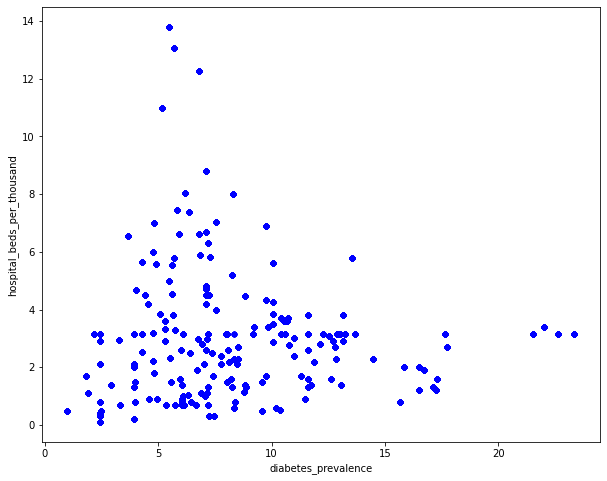

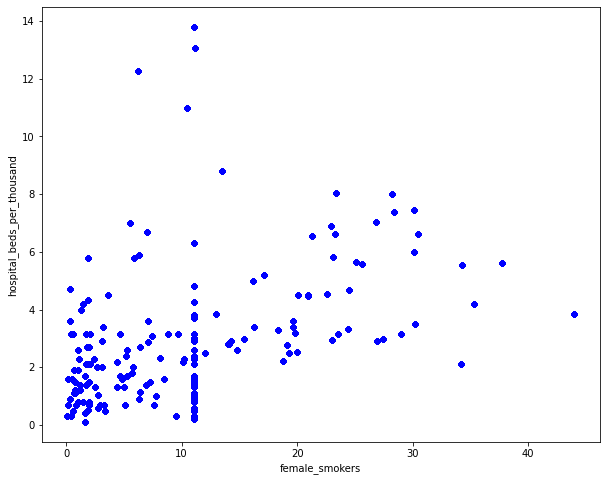

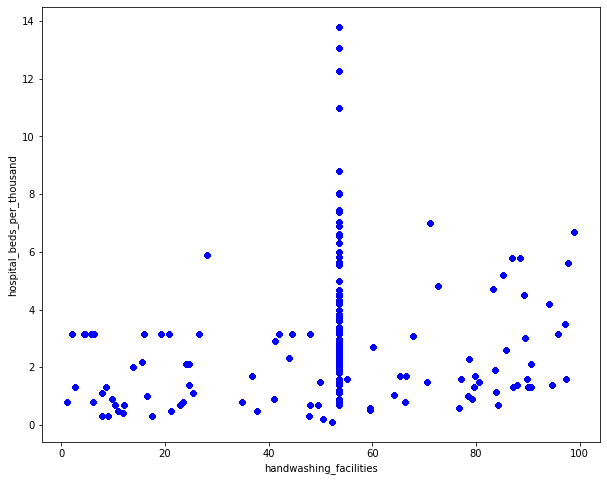

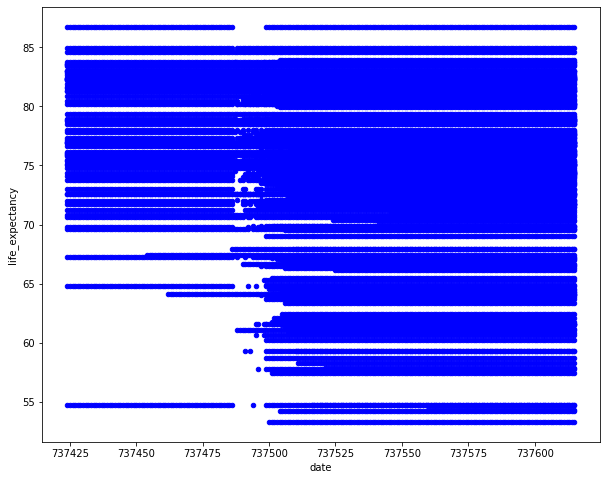

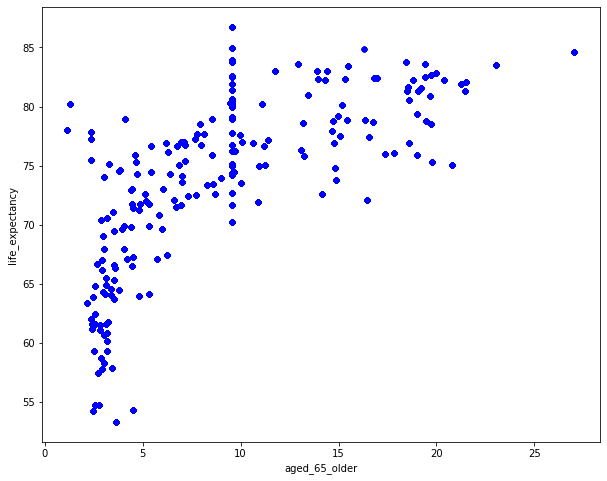

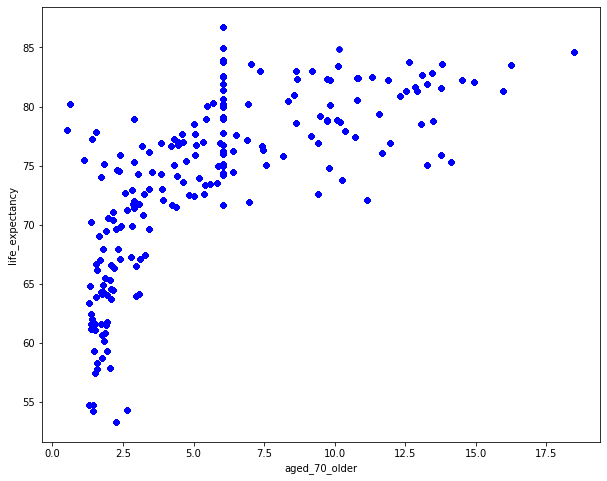

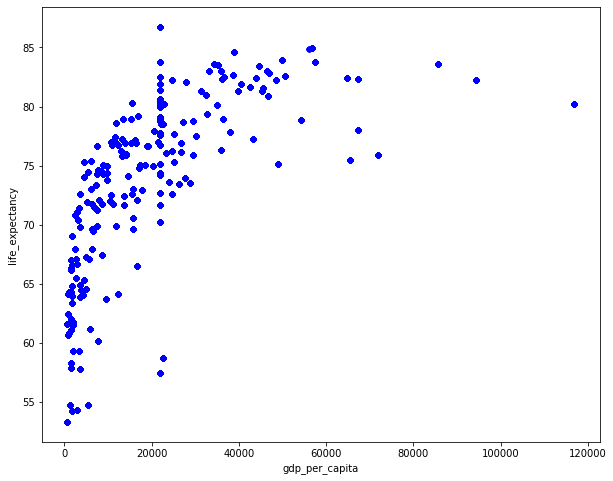

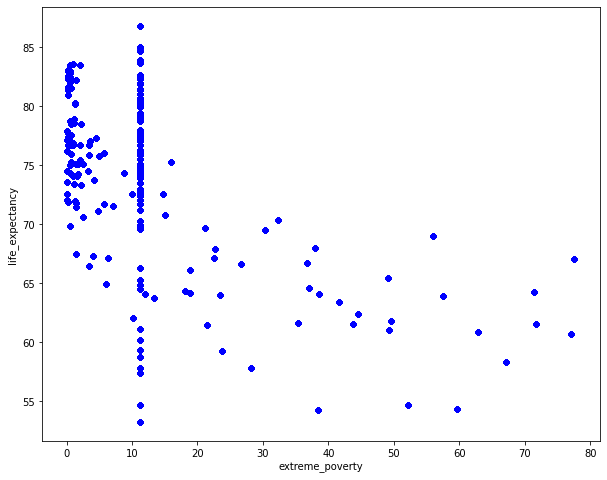

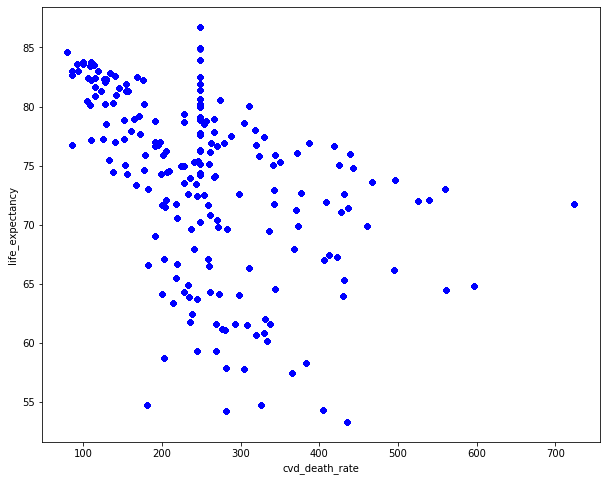

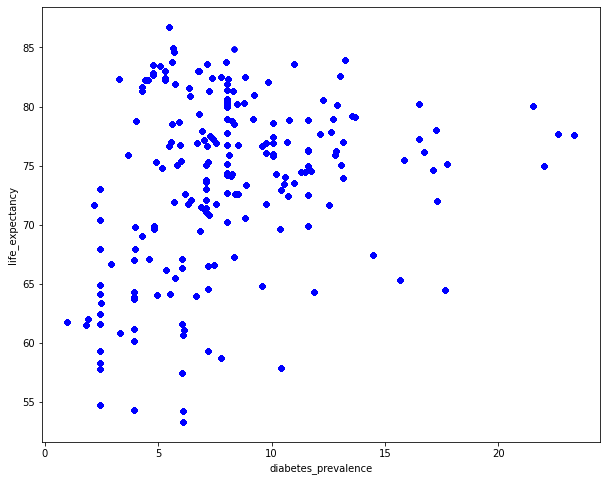

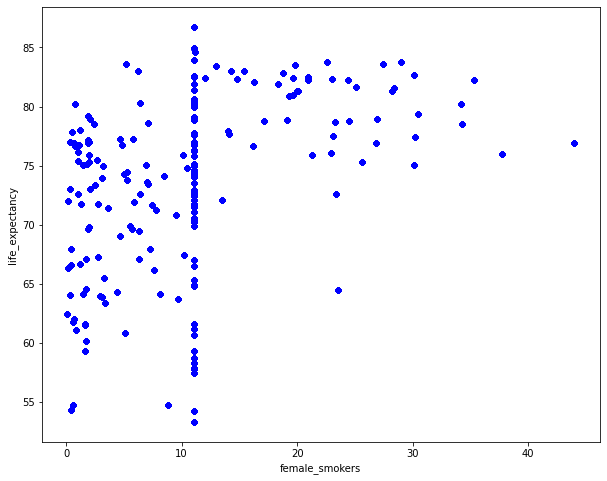

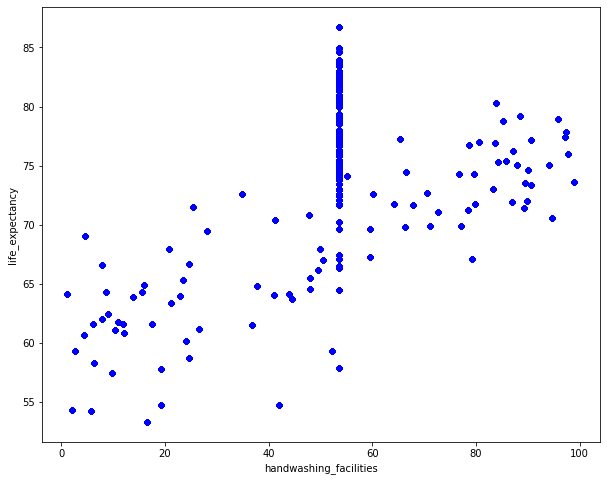

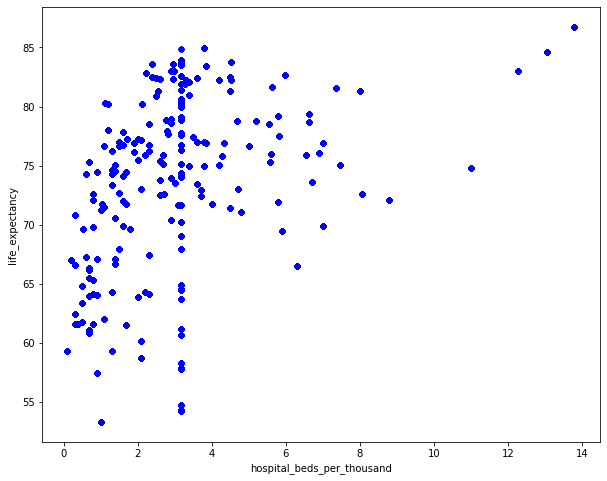

In [7]:
for column in corona_go:
    for i in corona_go:
         if( column>i and i!=column and corona_go[column].dtypes=="float64" and (corona_go[i].dtypes=="float64" or i=="date")):
             corona_go.plot(x=i,y=column,kind='scatter',color="b",figsize=(10,8))
             plt.show()

In [8]:
#from sklearn.model_selection imported train_test_split
from sklearn.model_selection import train_test_split

#values of total_case column is copied into target
target=corona_go["total_cases"].values       

 #features contains all columns of corona_go excluding total_cases which is our target
features=corona_go.drop(['total_cases'],axis=1).values  

#splitted the features and targets into train and test (with test size=0.25and random state=45)
#where X_train and y_train learns our module and X_test and y_test is used for finding accurancy of our module
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=42)    

In [10]:
#imported LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression 

#named the module reg_all
reg_all=LinearRegression()    

#learning the module named reg_all
reg_all.fit(X_train,y_train)        

#gives the accurancy of our reg_all module 
accu=reg_all.score(X_test,y_test)                        
print(accu)

0.9886001099261895
